##### pre preapazione

In [ ]:
# prompt: how to drop rows in "Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi" major that 150

# Assuming 'Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi' is the column name
index_to_drop = data[data['Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi'] > 150].index
data = data.drop(index_to_drop)
data_orgiginale = data_orgiginale.drop(index_to_drop)
data_conv = data_conv.drop(index_to_drop)

NameError: name 'data' is not defined

In [ ]:
data_orgiginale.head()

NameError: name 'data_orgiginale' is not defined

In [ ]:
data.head()

In [ ]:
data_conv.head()

In [ ]:
print("Le variabili nel dataset:",data_orgiginale.columns.values)

In [ ]:
print(data.isnull().sum())

In [ ]:
numcols = data_orgiginale.select_dtypes(['number']).columns
data_orgiginale[numcols].head()

In [ ]:
catcols = data_orgiginale.select_dtypes(['object']).columns
data_orgiginale[catcols].head()

In [ ]:
for col in catcols:
    print (col, data_orgiginale[col].unique())

# 0. Preparazione

In [120]:
# Pandas
import pandas as pd
import numpy as np

# Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy import stats
from sklearn.metrics import *
from sklearn import linear_model

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

from google.colab import files

In [87]:
#data = pd.read_csv("/content/drive/MyDrive/Tesi/Dataset_partenza - Dataset_partenza.csv", sep=",")
data= pd.read_csv("/content/drive/MyDrive/Tesi/dataset_dummy.csv", sep=",")
data2= pd.read_csv("/content/drive/MyDrive/Tesi/dataset_dummy_v2.csv", sep=",")
#data_conv= pd.read_csv("/content/drive/MyDrive/Tesi/dataset_conv.csv", sep=",")
data_originale= pd.read_csv("/content/drive/MyDrive/Tesi/dataset_originale.csv", sep=",")



In [80]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10688 entries, 0 to 10687
Data columns (total 36 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Genere                                                                             10688 non-null  int64  
 1   Classe d'età                                                                       10688 non-null  object 
 2   Classe d'età: <25 vs 35-44                                                         10688 non-null  int64  
 3   Classe d'età: 25-34 vs 35-44                                                       10688 non-null  int64  
 4   Classe d'età: 45-54 vs 35-44                                                       10688 non-null  int64  
 5   Classe d'età: 55-64 vs 35-44                                                       10688 non-null  int

# 1. Intro

**Ipotesi**

H1: Il reddito può influenzare l'acquisto di una vettura elettrica? Appartenere ad una classe sociale superiore può aumentare la probilità di acquistare una vettura BEV?

H2: Come influisce sull'acquisto di veicoli BEV la tipologia di auto posseduta

  + H2.1: Possedere, o aver posseduto in passato, un'veicoli PHEV (Plug-in Hybrid) può incentivare l'acquisto di veicoli BEV (elettrici), poiché sono considerate un primo passo verso l'elettrificazione completa.

  + H2.2: Di conseguenza, come cambia la probabilità di acquisto di una vettura BEV se si è possessori, o si è stati possessori in passato, di una vettura ICE (motore a combustione interna), HEV (ibridi, *considerati solo quelli full hybrid*), e GNC (gas naturale compresso)?

  + H2.3: Chi ha posseduto in passato, o possiede, un veicolo BEV ha una probabilità maggiore di acquistarne un ulteriore veicolo elettrico?

H3: Percorrere molta strada al giorno nel tragitto casa-lavoro o effettuare lunghi viaggi può ridurre la probabilità di acquistare veicoli BEV (elettrici).

H4: Le persone che ritengono importante ridurre le emissioni hanno una probabilità maggionre di acquistare una vettura BEV?


In [ ]:
n_variabili= len(data_originale.columns)
print("Il numero di variabili nel dataset è di:", n_variabili)

n_casi= len(data)
print("Il numero di casi nel dataset è di:", n_casi)

Il numero di variabili nel dataset è di: 18
Il numero di casi nel dataset è di: 10695


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 36 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Genere_                                                       10695 non-null  object 
 1   Genere                                                        10695 non-null  int64  
 2   Età                                                           10695 non-null  int64  
 3   Classe d'età                                                  10695 non-null  object 
 4   Classe d'età: <25 vs 45-54                                    10695 non-null  int64  
 5   Classe d'età: 25-34 vs 45-54                                  10695 non-null  int64  
 6   Classe d'età: 35-44 vs 45-54                                  10695 non-null  int64  
 7   Classe d'età: 55-64 vs 45-54                                  10695

# 2. Analisi VIF e delle correlazioni

## 2.1. Correlation Matrix

In [101]:
all_columns = data.columns.tolist()
exclude_columns = ['Auto attuale', "Classe d'età", "Reddito familiare",
                   "Classe Reddito Familiare", "Livello di istruzione", "Tipologia di auto precedente",
                   "Tipologia di auto attuale",
                   #"Numero persone in famiglia", "Casa Indipendente"
                   ]

Xind_columns = [col for col in all_columns if col not in exclude_columns and col != 'BEV dummy']

Xind = data[Xind_columns]
y = data['BEV dummy']

In [102]:
Xind_columns

['Genere',
 "Classe d'età: <25 vs 45-54",
 "Classe d'età: 25-34 vs 45-54",
 "Classe d'età: 35-44 vs 45-54",
 "Classe d'età: 55-64 vs 45-54",
 "Classe d'età: 65-74 vs 45-54",
 "Classe d'età: 75-79 vs 45-54",
 "Classe d'età: >80 vs 45-54",
 'Classe Reddito Familiare: Bassa vs Media',
 'Classe Reddito Familiare: Alta vs Media',
 'Classe Reddito Familiare: Molto alta vs Media',
 'Classe Reddito Familiare: Estremamente alta vs Media',
 'Livello di istruzione: Licenza media vs Laurea 2L o Dottorato',
 'Livello di istruzione: Diploma o Qualifica professionale vs Laurea 2L o Dottorato',
 'Livello di istruzione: Laurea 1L vs Laurea 2L o Dottorato',
 'Casa di proprietà',
 'Casa Indipendente',
 'Numero persone in famiglia',
 'Numero di auto in famiglia',
 'Importanza di ridurre le emissioni di gas serra',
 'Tipologia di auto precedente: BEV vs PHEV',
 'Tipologia di auto precedente: HEV vs PHEV',
 'Tipologia di auto precedente: GNC vs PHEV',
 'Tipologia di auto precedente: ICE vs PHEV',
 'Viaggio 

In [116]:
print(Xind.var())
#X = Xind.loc[:, Xind.var() > 0]

Genere                                                                               1.873771e-01
Classe d'età: <25 vs 45-54                                                           1.681453e-03
Classe d'età: 25-34 vs 45-54                                                         3.272566e-02
Classe d'età: 35-44 vs 45-54                                                         1.554905e-01
Classe d'età: 55-64 vs 45-54                                                         1.923785e-01
Classe d'età: 65-74 vs 45-54                                                         1.428380e-01
Classe d'età: 75-79 vs 45-54                                                         5.679374e-02
Classe d'età: >80 vs 45-54                                                           6.876359e-03
Classe Reddito Familiare: Bassa vs Media                                             2.604538e-02
Classe Reddito Familiare: Alta vs Media                                              2.271888e-01
Classe Reddito Famil

In [115]:
correlation_matrix = Xind.corr()
original_columns = list(correlation_matrix.columns)

abbreviated_columns = [
    'Genere', '<25 vs 45-54','25-34 vs 45-54', '35-44 vs 45-54', '55-64 vs 45-54', '65-74 vs 45-54', '75-79 vs 45-54', '>80 vs 45-54', 'C.Red. Bassa vs Media', 'C.Red Alta vs Media',
    'C.Red Molto alta vs Media', 'C.Red Estrem.alta vs Media', 'Media vs Laurea 2L', 'Diploma vs Laurea 2L', 'Laurea 1L vs Laurea 2L', 'Casa prop.', 'Casa Indip.',
    'N. persone in fam.', 'N. auto in fam.', 'Sensibilità Ambiente','prec: BEV vs PHEV', 'prec: HEV vs PHEV','prec: GNC vs PHEV', 'prec: ICE vs PHEV',
    'Viaggio più lungo', 'N. viaggi lunghi', 'Distanza Casa-Lav.', 'VMT',
]

fig_cm = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=abbreviated_columns,
    y=abbreviated_columns,
    annotation_text=np.around(correlation_matrix.values, decimals=2),
    showscale=True
)

fig_cm.update_layout(
    title={
        'text': "Correlation Matrix",
        'x': 0.5,
        'xanchor': 'center',  # Ancoraggio al centro
        'font': {'size': 20, 'family': 'Arial', 'weight': 'bold'},
        #'pad': {'t': 20}
    },
    margin=dict(t=210, b=0, l=0, r=0),
    height=700,
    width=1200,
)
fig_cm.show()

## 2.2. Analisi VIF

In [121]:
vif_data = pd.DataFrame()
vif_data["feature"] = Xind.columns
vif_data["VIF"] = [variance_inflation_factor(Xind.values, i) for i in range(len(Xind.columns))]
print(vif_data)

                                              feature        VIF
0                                              Genere   3.925695
1                          Classe d'età: <25 vs 45-54   1.009588
2                        Classe d'età: 25-34 vs 45-54   1.156792
3                        Classe d'età: 35-44 vs 45-54   1.611612
4                        Classe d'età: 55-64 vs 45-54   2.029460
5                        Classe d'età: 65-74 vs 45-54   1.863970
6                        Classe d'età: 75-79 vs 45-54   1.342770
7                          Classe d'età: >80 vs 45-54   1.044981
8            Classe Reddito Familiare: Bassa vs Media   1.090411
9             Classe Reddito Familiare: Alta vs Media   2.023761
10      Classe Reddito Familiare: Molto alta vs Media   1.558618
11  Classe Reddito Familiare: Estremamente alta vs...   1.351787
12  Livello di istruzione: Licenza media vs Laurea...   1.010982
13  Livello di istruzione: Diploma o Qualifica pro...   1.308264
14  Livello di istruzione

In [124]:
logit_model = sm.Logit(Ydip, Xind)
result = logit_model.fit()
ll_null = logit_model.loglikeobs(np.zeros(logit_model.exog.shape[1])).sum()
ll_model = result.llf
mcfadden_rsquared = 1 - (ll_model / ll_null)
print(f"McFadden's R-squared: {mcfadden_rsquared}")

Optimization terminated successfully.
         Current function value: 0.646968
         Iterations 6
McFadden's R-squared: 0.06662273313683875


In [125]:
Xind_ridotto = Xind.drop(["Numero persone in famiglia", "Casa di proprietà"], axis=1)

vif_data_ridotto = pd.DataFrame()
vif_data_ridotto["feature"] = Xind_ridotto.columns
vif_data_ridotto["VIF"] = [variance_inflation_factor(Xind_ridotto.values, i) for i in range(len(Xind_ridotto.columns))]
print(vif_data_ridotto)

                                              feature       VIF
0                                              Genere  3.754084
1                          Classe d'età: <25 vs 45-54  1.009395
2                        Classe d'età: 25-34 vs 45-54  1.147533
3                        Classe d'età: 35-44 vs 45-54  1.610920
4                        Classe d'età: 55-64 vs 45-54  1.951534
5                        Classe d'età: 65-74 vs 45-54  1.639546
6                        Classe d'età: 75-79 vs 45-54  1.235080
7                          Classe d'età: >80 vs 45-54  1.034150
8            Classe Reddito Familiare: Bassa vs Media  1.089340
9             Classe Reddito Familiare: Alta vs Media  1.984846
10      Classe Reddito Familiare: Molto alta vs Media  1.534704
11  Classe Reddito Familiare: Estremamente alta vs...  1.336281
12  Livello di istruzione: Licenza media vs Laurea...  1.010092
13  Livello di istruzione: Diploma o Qualifica pro...  1.308250
14  Livello di istruzione: Laurea 1L vs 

In [144]:
def sono_simili(val1, val2, tolleranza=0.0001):
    return abs(val1 - val2) < tolleranza

# Modello completo
logit_model_vif = sm.Logit(Ydip, Xind)
result_vif = logit_model_vif.fit()
ll_null_vif = logit_model_vif.loglikeobs(np.zeros(logit_model_vif.exog.shape[1])).sum()
ll_model_vif = result_vif.llf
mcfadden_rsquared_vif = 1 - (ll_model_vif / ll_null_vif)
print(f"R2 di McFadden per modello completo: {mcfadden_rsquared_vif:.4f}")

# Modello ridotto
logit_model_vif2 = sm.Logit(Ydip, Xind_ridotto)
result_vif2 = logit_model_vif2.fit()
ll_null_vif2 = logit_model_vif2.loglikeobs(np.zeros(logit_model_vif2.exog.shape[1])).sum()
ll_model_vif2 = result_vif2.llf
mcfadden_rsquared_vif2 = 1 - (ll_model_vif2 / ll_null_vif2)
print(f"\nR2 di McFadden per modello ridotto: {mcfadden_rsquared_vif2:.4f}")
print("\n===============================================================")
# Confronto
if sono_simili(mcfadden_rsquared_vif, mcfadden_rsquared_vif2):
    print("|    Entrambi i modelli hanno un R2 simile (entro 4 decimali).")
    print("|    Si può procedere con il modello ridotto.")
elif mcfadden_rsquared_vif > mcfadden_rsquared_vif2:
    print("Il modello completo ha un R2 maggiore di quello ridotto.")
else:
    print("Il modello ridotto ha un R2 maggiore di quello completo.")
print("===============================================================")

Optimization terminated successfully.
         Current function value: 0.646968
         Iterations 6
R2 di McFadden per modello completo: 0.0666
Optimization terminated successfully.
         Current function value: 0.647005
         Iterations 6

R2 di McFadden per modello ridotto: 0.0666

|    Entrambi i modelli hanno un R2 simile (entro 4 decimali).
|    Si può procedere con il modello ridotto.


# 3. Analisi Logistica

In [95]:
Xind =
Xind = sm.add_constant(Xind)
logit_model = sm.Logit(Ydip, Xind)
result = logit_model.fit()
print(result.summary())

intercept = result.params['const']
coefficients = result.params[Xind_columns]
print("\nIntercept:", intercept)
"""
print("\nCoefficients:")
for variable, coefficient in coefficients.items():
  print(f"{variable}: {coefficient}")
"""

Optimization terminated successfully.
         Current function value: 0.645207
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              BEV dummy   No. Observations:                10688
Model:                          Logit   Df Residuals:                    10661
Method:                           MLE   Df Model:                           26
Date:                Wed, 15 Jan 2025   Pseudo R-squ.:                 0.06433
Time:                        07:07:40   Log-Likelihood:                -6896.0
converged:                       True   LL-Null:                       -7370.1
Covariance Type:            nonrobust   LLR p-value:                3.451e-183
                                                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------

'\nprint("\nCoefficients:")\nfor variable, coefficient in coefficients.items():\n  print(f"{variable}: {coefficient}")\n'

In [ ]:
Ydip = data['BEV dummy']
Xind = data[Xind_columns]
Xind = sm.add_constant(Xind)


logit_model = sm.Logit(Ydip, Xind)
result = logit_model.fit()


print(result.summary())


intercept = result.params['const']
coefficients = result.params[Xind_columns]
#print("\nIntercept:", intercept)
#print("\nCoefficients:")
#for variable, coefficient in coefficients.items():
  #print(f"{variable}: {coefficient}")



Optimization terminated successfully.
         Current function value: 0.645207
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              BEV dummy   No. Observations:                10688
Model:                          Logit   Df Residuals:                    10661
Method:                           MLE   Df Model:                           26
Date:                Mon, 28 Oct 2024   Pseudo R-squ.:                 0.06433
Time:                        14:26:00   Log-Likelihood:                -6896.0
converged:                       True   LL-Null:                       -7370.1
Covariance Type:            nonrobust   LLR p-value:                3.451e-183
                                                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------

In [157]:
coefficienti_b = round(result.params,3)
p_value = round(result.pvalues,3)
standard_errors =round(result.bse,3)

tabella_diz = {
    'Odds Ratio': np.exp(coefficienti_b),
    #'Odds Ratio': np.exp(-0.7443 + coefficienti_b2)/(1+(np.exp(-0.7443 + coefficienti_b2))),
    'Coefficienti': coefficienti_b,
    'P-value': p_value,
    'Standard Error': standard_errors
}
tabella_riass = pd.DataFrame(tabella_diz)
tabella_sign = tabella_riass[tabella_riass['P-value'] < 0.05]  # solo valori con p-value < 0.05
print(tabella_sign)

                                                    Odds Ratio  Coefficienti  \
Genere                                                1.141108         0.132   
Classe d'età: 25-34 vs 45-54                          0.759572        -0.275   
Classe d'età: 55-64 vs 45-54                          0.750512        -0.287   
Classe d'età: 65-74 vs 45-54                          0.660340        -0.415   
Classe d'età: >80 vs 45-54                            0.453845        -0.790   
Classe Reddito Familiare: Bassa vs Media              0.677057        -0.390   
Classe Reddito Familiare: Alta vs Media               1.157196         0.146   
Classe Reddito Familiare: Molto alta vs Media         1.526534         0.423   
Classe Reddito Familiare: Estremamente alta vs ...    2.009729         0.698   
Livello di istruzione: Licenza media vs Laurea ...    0.394159        -0.931   
Livello di istruzione: Diploma o Qualifica prof...    0.662987        -0.411   
Livello di istruzione: Laurea 1L vs Laur


# 4. Analisi Variabili: x Ipotesi

## 4.1. Tipologia di veicoli

In [ ]:
#tipologia
tipologia = data['Tipologia di auto attuale'].value_counts()
print("Numero di veicoli ecologici, Elettrici, Ibridi Plug-in, a Idrogeno e Full Hybrid:", tipologia)
print()

#solo auto green: elettriche
auto_green = data['BEV dummy'].value_counts()
print("Numero di veicoli BEV è di:", round(data["BEV dummy"].mean()*100,2), "%", auto_green)

Numero di veicoli ecologici, Elettrici, Ibridi Plug-in, a Idrogeno e Full Hybrid: Tipologia di auto attuale
BEV     5796
PHEV    4568
FCEV     287
HEV       37
Name: count, dtype: int64

Numero di veicoli BEV è di: 54.23 % BEV dummy
1    5796
0    4892
Name: count, dtype: int64


## 4.2. H1 - Reddito

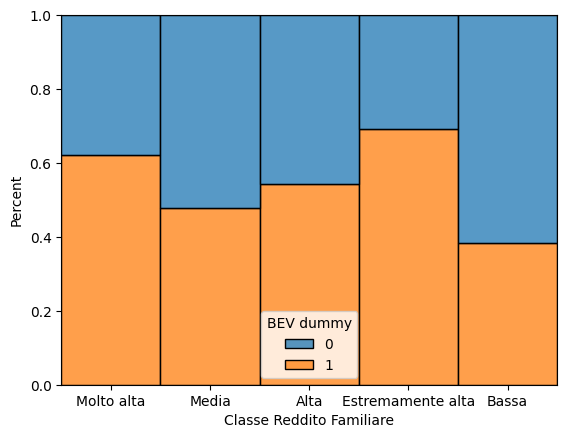


Classe Reddito Familiare
Alta                 54.44
Bassa                38.46
Estremamente alta    69.20
Media                47.71
Molto alta           62.18
Name: BEV dummy, dtype: float64


In [ ]:
sns.histplot(data=data, x="Classe Reddito Familiare", hue= "BEV dummy", stat="percent", multiple="fill")
plt.show()
print()
print(round(data.groupby(data['Classe Reddito Familiare'])["BEV dummy"].mean()*100,2))

In [ ]:
odds_reddito_bm= round(tabella_sign.loc[tabella_sign.index[5], 'Odds Ratio'],5)
odds_reddito_am= round(tabella_sign.loc[tabella_sign.index[6], 'Odds Ratio'],5)
odds_reddito_mam= round(tabella_sign.loc[tabella_sign.index[7], 'Odds Ratio'],5)
odds_reddito_eam= round(tabella_sign.loc[tabella_sign.index[8], 'Odds Ratio'],5)

print("La probabilità di aquistare una vettura BEV per una persona di classe Reddito Familiare Bassa rispetto ad una persona di classe Media ", odds_reddito_bm)
print("Per una persona di classe Reddito Familiare Bassa la probabilità rispetto ad una di classe media di acquistare un veicolo BEV è:",
      round(odds_reddito_bm-1,5), ",ovvero la probabilità diminuisce del",round(1-odds_reddito_bm,4)*100, "%")
print()
print("La probabilità di aquistare una vettura BEV per una persona di classe Reddito Familiare Alta rispetto ad una persona di classe Media ", odds_reddito_am)
print("Per una persona di classe Reddito Familiare Alta la probabilità rispetto ad una di classe media di acquistare un veicolo BEV è:",
      round(odds_reddito_am-1,5), ",ovvero la probabilità diminuisce del",round(1-odds_reddito_am,4)*100, "%")
print()
print("La probabilità di aquistare una vettura BEV per una persona di classe Reddito Familiare Molto Alta rispetto ad una persona di classe Media ", odds_reddito_mam)
print("Per una persona di classe Reddito Familiare Molto Alta la probabilità rispetto ad una di classe Media di acquistare un veicolo BEV è:",
      round(odds_reddito_mam-1,5), ",ovvero la probabilità diminuisce del",round(1-odds_reddito_mam,4)*100, "%")
print()
print("La probabilità di aquistare una vettura BEV per una persona di classe Reddito Familiare Estremamente alta rispetto ad una persona di classe Media ", odds_reddito_eam)
print("Per una persona di classe Reddito Familiare Estremamente alta la probabilità rispetto ad una di classe Media di acquistare un veicolo BEV è:",
      round(odds_reddito_eam-1,5), ",ovvero la probabilità aumenta del",round(odds_reddito_eam-1,4)*100, "%")

La probabilità di aquistare una vettura BEV per una persona di classe Reddito Familiare Bassa rispetto ad una persona di classe Media  0.72036
Per una persona di classe Reddito Familiare Bassa la probabilità rispetto ad una di classe media di acquistare un veicolo BEV è: -0.27964 ,ovvero la probabilità diminuisce del 27.96 %

La probabilità di aquistare una vettura BEV per una persona di classe Reddito Familiare Alta rispetto ad una persona di classe Media  1.21653
Per una persona di classe Reddito Familiare Alta la probabilità rispetto ad una di classe media di acquistare un veicolo BEV è: 0.21653 ,ovvero la probabilità diminuisce del -21.65 %

La probabilità di aquistare una vettura BEV per una persona di classe Reddito Familiare Molto Alta rispetto ad una persona di classe Media  1.60801
Per una persona di classe Reddito Familiare Molto Alta la probabilità rispetto ad una di classe Media di acquistare un veicolo BEV è: 0.60801 ,ovvero la probabilità diminuisce del -60.8 %

La probab

## 4.3. H2 - Auto posseduta precedentemente

In [ ]:
odds_prec_BEV= round(tabella_sign.loc[tabella_sign.index[14], 'Odds Ratio'],3)

odds_prec_ICE= round(tabella_sign.loc[tabella_sign.index[15], 'Odds Ratio'],3)

print("La probabilità di aquistare una vettura BEV, rispetto alle altre vetture green, per una persona che precedentemente ha avuto un vettura BEV", odds_prec_BEV)
print(" ", round(odds_prec_BEV-1,3), ",ovvero la probabilità aumenta del",round(odds_prec_BEV-1,4)*100, "%")

print("La probabilità di aquistare una vettura BEV, rispetto alle altre vetture green, per una persona che precedentemente ha avuto un vettura ICE", odds_prec_ICE)
print(" ", round(odds_prec_ICE-1,3), ",ovvero la probabilità aumenta del",round(odds_prec_ICE-1,4)*100, "%")


La probabilità di aquistare una vettura BEV, rispetto alle altre vetture green, per una persona che precedentemente ha avuto un vettura BEV 3.473
  2.473 ,ovvero la probabilità aumenta del 247.29999999999998 %
La probabilità di aquistare una vettura BEV, rispetto alle altre vetture green, per una persona che precedentemente ha avuto un vettura ICE 1.508
  0.508 ,ovvero la probabilità aumenta del 50.8 %


## 4.4. H3 - Influenza delle lunghe distanze percorse sull’acquisto di veicoli BEV


###4.4.1. Distanza casa lavoro

In [ ]:
odds_prec_casalav= round(tabella_sign.loc[tabella_sign.index[17], 'Odds Ratio'],3)

print("La probabilità di aquistare una vettura BEV, in base alla distanza casa-lavoro", odds_prec_casalav)
print(" ", round(odds_prec_casalav-1,3), ",ovvero la probabilità diminuisce del",round(1-odds_prec_casalav,4)*100, "%, ogni miglio percorso in più")
print()
mean_distance_bev_1 = data[data['BEV dummy'] == 1]['Distanza casa-lavoro'].mean()
mean_distance_bev_0 = data[data['BEV dummy'] == 0]['Distanza casa-lavoro'].mean()

print(f"Media della Distanza casa-lavoro per BEV dummy = Si: {mean_distance_bev_1}","miglia")
print(f"Media della Distanza casa-lavoro per BEV dummy = No: {mean_distance_bev_0}","miglia")

print()
print("ogni 2,5 miglia aggiuntive probabilità scende di:" ,round((1-odds_prec_casalav)*2.5,3), ", ovvero scende del:", round(1-odds_prec_casalav,4)*2.5*100, "%")
print("ogni 5 miglia aggiuntive probabilità scende di:" ,round((1-odds_prec_casalav)*5,3), ", ovvero scende del:", round(1-odds_prec_casalav,4)*5*100, "%")
print("ogni 10 miglia aggiuntive probabilità scende di:" ,round((1-odds_prec_casalav)*10,3), ", ovvero scende del:", round(1-odds_prec_casalav,4)*10*100, "%")



La probabilità di aquistare una vettura BEV, in base alla distanza casa-lavoro 0.998
  -0.002 ,ovvero la probabilità diminuisce del 0.2 %, ogni miglio percorso in più

Media della Distanza casa-lavoro per BEV dummy = Si: 17.90839199447895 miglia
Media della Distanza casa-lavoro per BEV dummy = No: 19.804969337694196 miglia

ogni 2,5 miglia aggiuntive probabilità scende di: 0.005 , ovvero scende del: 0.5 %
ogni 5 miglia aggiuntive probabilità scende di: 0.01 , ovvero scende del: 1.0 %
ogni 10 miglia aggiuntive probabilità scende di: 0.02 , ovvero scende del: 2.0 %


###4.4.2. N. Viaggi >200 miglia all'anno

In [ ]:
odds_prec_nviaggi= round(tabella_sign.loc[tabella_sign.index[16], 'Odds Ratio'],3)
print("La probabilità di aquistare una vettura BEV in base al numero di viaggi superiore a 200 miglia", odds_prec_nviaggi)
print(" ", round(odds_prec_nviaggi-1,3), ",ovvero la probabilità diminuisce del",round(1-odds_prec_nviaggi,4)*100, "%")
print()
print()
print("Come diminuisce la probabilità in base al n. dei viaggi rispetto a che non li effettua:")
print()
print("per chi effettua 1 viaggio di 200 miglia all'anno la probabilità scende di:" ,round((1-odds_prec_nviaggi)*1,3), ", ovvero scende del:", round((1-odds_prec_nviaggi)*1*100,4), "%")
print("per chi effettua 2 viaggio di 200 miglia all'anno la probabilità scende di:" ,round((1-odds_prec_nviaggi)*2,3), ", ovvero scende del:", round((1-odds_prec_nviaggi)*2*100,4), "%")
print("per chi effettua 3 viaggio di 200 miglia all'anno la probabilità scende di:" ,round((1-odds_prec_nviaggi)*3,3), ", ovvero scende del:", round((1-odds_prec_nviaggi)*3*100,4), "%")
print("per chi effettua 4 viaggio di 200 miglia all'anno la probabilità scende di:" ,round((1-odds_prec_nviaggi)*4,3), ", ovvero scende del:", round((1-odds_prec_nviaggi)*4*100,4), "%")
print("per chi effettua 5 viaggio di 200 miglia all'anno la probabilità scende di:" ,round((1-odds_prec_nviaggi)*5,3), ", ovvero scende del:", round((1-odds_prec_nviaggi)*5*100,4), "%")
print("per chi effettua 6 viaggio di 200 miglia all'anno la probabilità scende di:" ,round((1-odds_prec_nviaggi)*6,3), ", ovvero scende del:", round((1-odds_prec_nviaggi)*6*100,4), "%")

La probabilità di aquistare una vettura BEV in base al numero di viaggi superiore a 200 miglia 0.966
  -0.034 ,ovvero la probabilità diminuisce del 3.4000000000000004 %


Come diminuisce la probabilità in base al n. dei viaggi rispetto a che non li effettua:

per chi effettua 1 viaggio di 200 miglia all'anno la probabilità scende di: 0.034 , ovvero scende del: 3.4 %
per chi effettua 2 viaggio di 200 miglia all'anno la probabilità scende di: 0.068 , ovvero scende del: 6.8 %
per chi effettua 3 viaggio di 200 miglia all'anno la probabilità scende di: 0.102 , ovvero scende del: 10.2 %
per chi effettua 4 viaggio di 200 miglia all'anno la probabilità scende di: 0.136 , ovvero scende del: 13.6 %
per chi effettua 5 viaggio di 200 miglia all'anno la probabilità scende di: 0.17 , ovvero scende del: 17.0 %
per chi effettua 6 viaggio di 200 miglia all'anno la probabilità scende di: 0.204 , ovvero scende del: 20.4 %


###4.4.3. VMT

In [ ]:
odds_VMT = vmtor
print(odds_VMT)
print()
VMT_calcolato = (-(1 - odds_VMT)*100) * data['VMT annuo']


0.9999849101138535



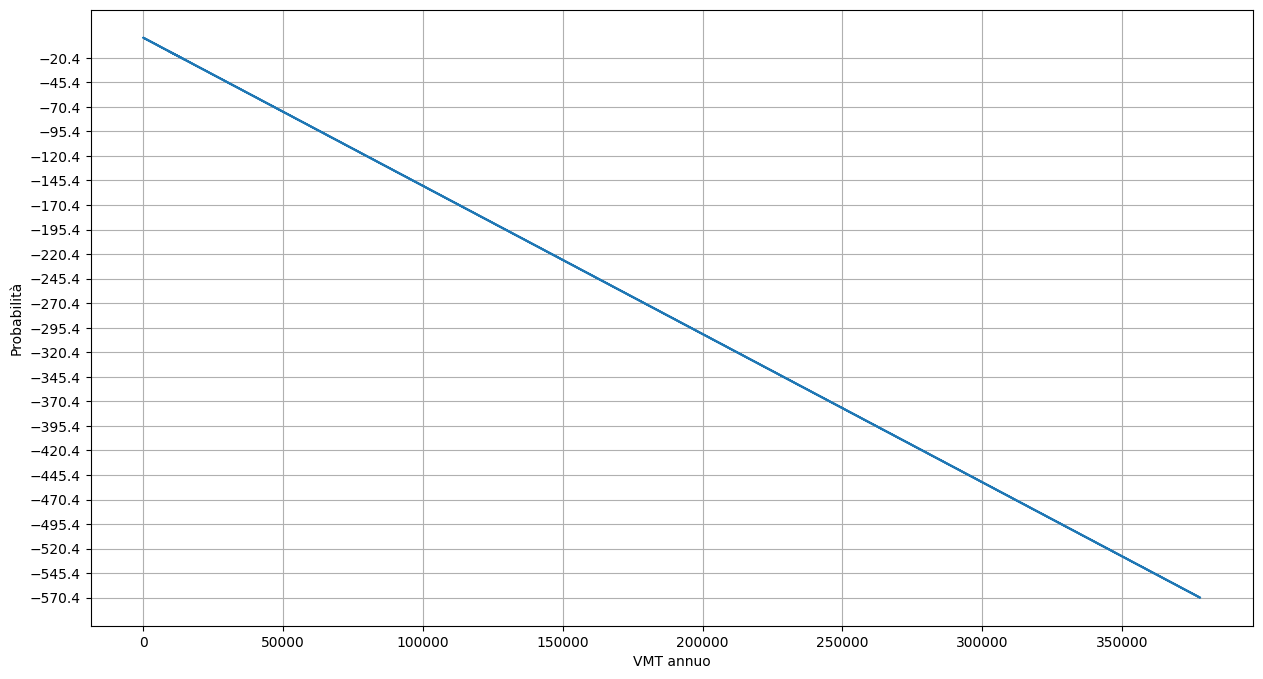

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(data['VMT annuo'], VMT_calcolato, linestyle='-')
plt.xlabel('VMT annuo')
plt.ylabel('Probabilità')
plt.title('')
plt.grid(True)
plt.yticks(np.arange(min(VMT_calcolato), max(VMT_calcolato) + 1, 25))
plt.show()

In [ ]:
print("ogni 5000 miglia percorse in più annualmente la probabilità scende di:" ,round((1-odds_VMT)*5000,3), ", ovvero scende del:", round((1-odds_VMT)*5000*100,2), "%")
print("ogni 10000 miglia percorse in più annualmente la probabilità scende di:" ,round((1-odds_VMT)*10000,3), ", ovvero scende del:", round((1-odds_VMT)*10000*100,2), "%")
print("ogni 15000 miglia percorse in più annualmente la probabilità scende di:" ,round((1-odds_VMT)*15000,3), ", ovvero scende del:", round((1-odds_VMT)*15000*100,2), "%")

ogni 5000 miglia percorse in più annualmente la probabilità scende di: 0.075 , ovvero scende del: 7.54 %
ogni 10000 miglia percorse in più annualmente la probabilità scende di: 0.151 , ovvero scende del: 15.09 %
ogni 15000 miglia percorse in più annualmente la probabilità scende di: 0.226 , ovvero scende del: 22.63 %


In [ ]:
print("ogni 14000 miglia percorsi annualmente la probabilità scende di:" ,round((1-odds_VMT)*14000,3), ", ovvero scende del:", round((1-odds_VMT)*14000*100,2), "%")
print("ogni 15000 miglia percorsi annualmente la probabilità scende di:" ,round((1-odds_VMT)*15000,3), ", ovvero scende del:", round((1-odds_VMT)*15000*100,2), "%")

print("ogni 17000 miglia percorsi annualmente la probabilità scende di:" ,round((1-odds_VMT)*17000,3), ", ovvero scende del:", round((1-odds_VMT)*17000*100,2), "%")

ogni 14000 miglia percorsi annualmente la probabilità scende di: 0.211 , ovvero scende del: 21.13 %
ogni 15000 miglia percorsi annualmente la probabilità scende di: 0.226 , ovvero scende del: 22.63 %
ogni 17000 miglia percorsi annualmente la probabilità scende di: 0.257 , ovvero scende del: 25.65 %


In [ ]:
vmt_annuo_mean_by_bev = data.groupby('BEV dummy')['VMT annuo'].mean()
print(vmt_annuo_mean_by_bev)
vmt_annuo_mean_bev = vmt_annuo_mean_by_bev.get(1, None)
if vmt_annuo_mean_bev is not None:
  print("Mean VMT annuo for BEV owners:", vmt_annuo_mean_bev)
else:
  print("No BEV owners found in the data.")

BEV dummy
0    16050.914146
1    12784.542961
Name: VMT annuo, dtype: float64
Mean VMT annuo for BEV owners: 12784.542960662526


## 4.5. H4 - Importanza della Riduzione delle Emissioni

In [ ]:
print("punteggi medii dei possessori di auto green:",round(data.groupby('BEV dummy')["Importanza di ridurre le emissioni di gas serra"].mean(),2))
print()

punteggi medii dei possessori di auto green: BEV dummy
0    1.50
1    1.72
Name: Importanza di ridurre le emissioni di gas serra, dtype: float64



La sostenibile media di gas serra è di: 1.62 , il sostenibile mediano è di: 3.0



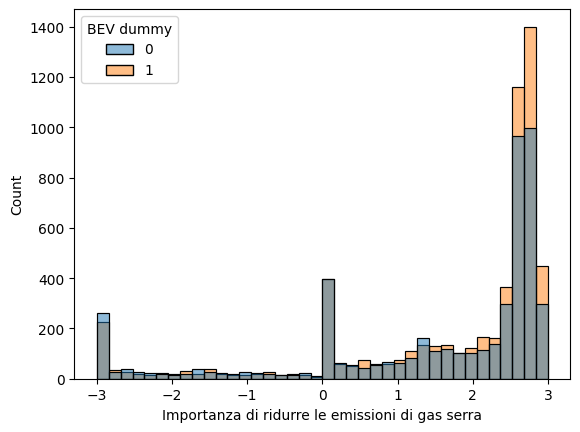

In [ ]:
sostenibile_mediano =round(data['Importanza di ridurre le emissioni di gas serra'].median(),0)
sostenibile_medio = round(data['Importanza di ridurre le emissioni di gas serra'].mean(),2)

print("La sostenibile media di gas serra è di:", sostenibile_medio, ", il sostenibile mediano è di:", sostenibile_mediano)
print()
sns.histplot(data=data, x="Importanza di ridurre le emissioni di gas serra", hue= "BEV dummy")
plt.show()

In [ ]:
preocc_elev = round(data[(data["Importanza di ridurre le emissioni di gas serra"]>2)]["BEV dummy"].mean()*100,2)
preocc_medio_alta = round(data[(data["Importanza di ridurre le emissioni di gas serra"]>0.5) & (data["Importanza di ridurre le emissioni di gas serra"]<=2)]["BEV dummy"].mean()*100,2)
preocc_media = round(data[(data["Importanza di ridurre le emissioni di gas serra"]>-0.5) & (data["Importanza di ridurre le emissioni di gas serra"]<=0.5)]["BEV dummy"].mean()*100,2)
preocc_medio_bassa = round(data[(data["Importanza di ridurre le emissioni di gas serra"]>-2) & (data["Importanza di ridurre le emissioni di gas serra"]<=-0.5)]["BEV dummy"].mean()*100,2)
preocc_bassa = round(data[(data["Importanza di ridurre le emissioni di gas serra"]<=-2)]["BEV dummy"].mean()*100,2)

print("Percentuale di chi possiede una vettura BEV e ha una preoccupazione elevata verso l'ambiente", preocc_elev)
print("Percentuale di chi possiede una vettura BEV e ha una preoccupazione medio alta verso l'ambiente",preocc_medio_alta)
print("Percentuale di chi possiede una vettura BEV e ha una preoccupazione medio bassa verso l'ambiente", preocc_media)
print("Percentuale di chi possiede una vettura BEV e ha una preoccupazione medio bassa verso l'ambiente",preocc_medio_bassa)
print("Percentuale di chi possiede una vettura BEV e non nessuna ha una preoccupazione verso l'ambiente", preocc_bassa)


Percentuale di chi possiede una vettura BEV e ha una preoccupazione elevata verso l'ambiente 56.72
Percentuale di chi possiede una vettura BEV e ha una preoccupazione medio alta verso l'ambiente 52.54
Percentuale di chi possiede una vettura BEV e ha una preoccupazione medio bassa verso l'ambiente 48.98
Percentuale di chi possiede una vettura BEV e ha una preoccupazione medio bassa verso l'ambiente 49.88
Percentuale di chi possiede una vettura BEV e non nessuna ha una preoccupazione verso l'ambiente 46.8


In [ ]:
odds_amb = odds_prec_nviaggi= round(tabella_sign.loc[tabella_sign.index[13], 'Odds Ratio'],4)
print(odds_amb)
print()
print("La probabilità per chi ha una preoccupazione elevata verso l'ambiente, la probabilità varia da:" ,round((odds_amb-1)*2*100,2), "%, a", round((odds_amb-1)*3*100,2), "%")
print("La probabilità per chi ha una preoccupazione medio alta verso l'ambiente, la probabilità varia da:" ,round((odds_amb-1)*0.5*100,2), "%, a", round((odds_amb-1)*2*100,2), "%")
print("La probabilità per chi ha una preoccupazione media verso l'ambiente, la probabilità varia da:" ,round((odds_amb-1)*-0.5*100,2), "%, a", round((odds_amb-1)*0.5*100,2), "%")
print("La probabilità per chi ha una preoccupazione medio bassa verso l'ambiente, la probabilità varia da:" ,round((odds_amb-1)*-2*100,2), "%, a", round((odds_amb-1)*-0.5*100,2), "%")
print("La probabilità per chi non ha alcuna una preoccupazione verso l'ambiente, la probabilità varia da:" ,round((odds_amb-1)*-3*100,2), "%, a", round((odds_amb-1)*-2*100,2), "%")



1.1052

La probabilità per chi ha una preoccupazione elevata verso l'ambiente, la probabilità varia da: 21.04 %, a 31.56 %
La probabilità per chi ha una preoccupazione medio alta verso l'ambiente, la probabilità varia da: 5.26 %, a 21.04 %
La probabilità per chi ha una preoccupazione media verso l'ambiente, la probabilità varia da: -5.26 %, a 5.26 %
La probabilità per chi ha una preoccupazione medio bassa verso l'ambiente, la probabilità varia da: -21.04 %, a -5.26 %
La probabilità per chi non ha alcuna una preoccupazione verso l'ambiente, la probabilità varia da: -31.56 %, a -21.04 %




---



In [ ]:
print(round((odds_amb-1)*2*100,2))
print()
print(round((odds_amb-1)*1*100,2))


21.04

10.52


# 5. Altre Variabili

## 5.2. Età

In [163]:
odds_eta1 = round(tabella_sign.loc[tabella_sign.index[1], 'Odds Ratio'],5)
odds_eta2 = round(tabella_sign.loc[tabella_sign.index[2], 'Odds Ratio'],5)
odds_eta3 = round(tabella_sign.loc[tabella_sign.index[3], 'Odds Ratio'],5)
odds_eta4 = round(tabella_sign.loc[tabella_sign.index[4], 'Odds Ratio'],5)
print(odds_eta1, odds_eta2, odds_eta3, odds_eta4)
print()
print("La probabilità per chi è classe d'età: 25-34 vs 45-54 di possedere un'auto elettrica, scende di:" ,round((1-odds_eta1),3), ", quindi diminusice del", round((1-odds_eta1)*100,2), "%")
print("La probabilità per chi è classe d'età: 55-64 vs 45-54 di possedere un'auto elettrica, scende di:" ,round((1-odds_eta2),3), ", quindi diminusice del", round((1-odds_eta2)*100,2), "%")
print("La probabilità per chi è classe d'età: 65-74 vs 45-54 di possedere un'auto elettrica, scende di:" ,round((1-odds_eta3),3), ", quindi diminusice del", round((1-odds_eta3)*100,2), "%")
print("La probabilità per chi è classe d'età: >80 vs 45-54 di possedere un'auto elettrica, scende di:" ,round((1-odds_eta4),3), ", quindi diminusice del", round((1-odds_eta4)*100,2), "%")

0.75957 0.75051 0.66034 0.45384

La probabilità per chi è classe d'età: 25-34 vs 45-54 di possedere un'auto elettrica, scende di: 0.24 , quindi diminusice del 24.04 %
La probabilità per chi è classe d'età: 55-64 vs 45-54 di possedere un'auto elettrica, scende di: 0.249 , quindi diminusice del 24.95 %
La probabilità per chi è classe d'età: 65-74 vs 45-54 di possedere un'auto elettrica, scende di: 0.34 , quindi diminusice del 33.97 %
La probabilità per chi è classe d'età: >80 vs 45-54 di possedere un'auto elettrica, scende di: 0.546 , quindi diminusice del 54.62 %


## 5.1. Genere

In [159]:
print("La percetuale in base al Genere di chi ha un'auto green: ") #il 55,46 delle persone di sesso femminile possiede un'auto elettrica contro il 50,6 di quello maschile
print()
print(round(data.groupby("Genere")['BEV dummy'].mean()*100,2))
print()
print()
odds_gen= round(tabella_sign.loc[tabella_sign.index[0], 'Odds Ratio'],5)
print("Odds Ratio di Genere: Maschio vs Femmina",odds_gen)
print()
print("La probabilità per una persona di sesso maschile rispetto ad una di sesso femminile di avere un'auto elettrica, aumenta di:" ,
      round((odds_gen-1),3), ", quindi aumenta del", round((odds_gen-1)*100,2), "%")

La percetuale in base al Genere di chi ha un'auto green: 

Genere
0    50.62
1    55.43
Name: BEV dummy, dtype: float64


Odds Ratio di Genere: Maschio vs Femmina 1.14111

La probabilità per una persona di sesso maschile rispetto ad una di sesso femminile di avere un'auto elettrica, aumenta di: 0.141 , quindi aumenta del 14.11 %


## 5.3. Reddito

In [164]:
odds_red1 = round(tabella_sign.loc[tabella_sign.index[5], 'Odds Ratio'],5)
odds_red2 = round(tabella_sign.loc[tabella_sign.index[6], 'Odds Ratio'],5)
odds_red3 = round(tabella_sign.loc[tabella_sign.index[7], 'Odds Ratio'],5)
odds_red4 = round(tabella_sign.loc[tabella_sign.index[8], 'Odds Ratio'],5)
print(odds_red1, odds_red2, odds_red3, odds_red4)
print()
print("La probabilità per chi è classe di reddito bassa rispetto ad una media di possedere un'auto elettrica, scende di:" ,round((1-odds_red1),3),
      ", quindi diminusice del", round((1-odds_red1)*100,2), "%")
print("La probabilità per chi è classe di reddito alta rispetto ad una media di possedere un'auto elettrica, sale di:" ,round((odds_red2-1),3),
      ", quindi aumenta del", round((odds_red2-1)*100,2), "%")
print("La probabilità per chi è classe di reddito molto alta rispetto ad una media di possedere un'auto elettrica, sale di:" ,round((odds_red3-1),3),
      ", quindi aumenta del", round((odds_red3-1)*100,2), "%")
print("La probabilità per chi è classe di reddito estremamente alta rispetto ad una media di possedere un'auto elettrica, sale di:" ,round((odds_red4-1),3),
      ", quindi aumenta del", round((odds_red4-1)*100,2), "%")

0.67706 1.1572 1.52653 2.00973

La probabilità per chi è classe di reddito bassa rispetto ad una media di possedere un'auto elettrica, scende di: 0.323 , quindi diminusice del 32.29 %
La probabilità per chi è classe di reddito alta rispetto ad una media di possedere un'auto elettrica, sale di: 0.157 , quindi aumenta del 15.72 %
La probabilità per chi è classe di reddito molto alta rispetto ad una media di possedere un'auto elettrica, sale di: 0.527 , quindi aumenta del 52.65 %
La probabilità per chi è classe di reddito estremamente alta rispetto ad una media di possedere un'auto elettrica, sale di: 1.01 , quindi aumenta del 100.97 %


## 5.4. Livello d'istruzione

In [168]:
odds_ist1 = round(tabella_sign.loc[tabella_sign.index[9], 'Odds Ratio'],5)
odds_ist2 = round(tabella_sign.loc[tabella_sign.index[10], 'Odds Ratio'],5)
odds_ist3 = round(tabella_sign.loc[tabella_sign.index[11], 'Odds Ratio'],5)
print(odds_ist1, odds_ist2,odds_ist3 )
print()
print("La probabilità per chi ha una lecenza media rispetto ha chi è laurato magistrale o ha un dottorato di possedere un'auto elettrica, scende di:" ,round((1-odds_ist1),3),
      ", quindi diminusice del", round((1-odds_ist1)*100,2), "%")
print("\nLa probabilità per chi ha un diploma rispetto ha chi è laurato magistrale o ha un dottorato di possedere un'auto elettrica, scende di:" ,round((1-odds_ist2),3),
      ", quindi diminusice del", round((1-odds_ist2)*100,2), "%")
print("\nLa probabilità per chi ha una laurea triennale rispetto ha chi è laurato magistrale o ha un dottorato di possedere un'auto elettrica, scende di:" ,round((1-odds_ist3),3),
      ", quindi diminusice del", round((1-odds_ist3)*100,2), "%")

0.39416 0.66299 0.84366

La probabilità per chi ha una lecenza media rispetto ha chi è laurato magistrale o ha un dottorato di possedere un'auto elettrica, scende di: 0.606 , quindi diminusice del 60.58 %

La probabilità per chi ha un diploma rispetto ha chi è laurato magistrale o ha un dottorato di possedere un'auto elettrica, scende di: 0.337 , quindi diminusice del 33.7 %

La probabilità per chi ha una laurea triennale rispetto ha chi è laurato magistrale o ha un dottorato di possedere un'auto elettrica, scende di: 0.156 , quindi diminusice del 15.63 %


In [171]:
print("La percetuale di chi ha un'auto green in base al: ")
print()
print(round(data.groupby("Livello di istruzione: Licenza media vs Laurea 2L o Dottorato")['BEV dummy'].mean()*100,2))
print()
print(round(data.groupby("Livello di istruzione: Diploma o Qualifica professionale vs Laurea 2L o Dottorato")['BEV dummy'].mean()*100,2))
print()
print(round(data.groupby("Livello di istruzione: Laurea 1L vs Laurea 2L o Dottorato")['BEV dummy'].mean()*100,2))

La percetuale di chi ha un'auto green in base al: 

Livello di istruzione: Licenza media vs Laurea 2L o Dottorato
0    54.27
1    36.36
Name: BEV dummy, dtype: float64

Livello di istruzione: Diploma o Qualifica professionale vs Laurea 2L o Dottorato
0    55.61
1    44.39
Name: BEV dummy, dtype: float64

Livello di istruzione: Laurea 1L vs Laurea 2L o Dottorato
0    55.09
1    52.89
Name: BEV dummy, dtype: float64


## 5.7. Numero di auto in famiglia

In [174]:
odds_fam = round(tabella_sign.loc[tabella_sign.index[12], 'Odds Ratio'],5)
print(odds_fam)
print()
print("La probabilità per ogni indiviudo in più in famiglia di possedere un'auto elettrica, sale di:" ,round((odds_fam-1),3), ", quindi aumenta del", round((odds_fam-1)*100,2), "%")
print("La probabilità per 2 indiviudi in più in famiglia di possedere un'auto elettrica, sale di:" ,round((odds_fam-1)*2,3), ", quindi aumenta del", round((odds_fam-1)*100*2,2), "%")

1.08654

La probabilità per ogni indiviudo in più in famiglia di possedere un'auto elettrica, sale di: 0.087 , quindi aumenta del 8.65 %
La probabilità per 2 indiviudi in più in famiglia di possedere un'auto elettrica, sale di: 0.173 , quindi aumenta del 17.31 %


In [175]:
print("Media numero di persone per famiglia:", round(data["Numero persone in famiglia"].mean(),2)) #in linea con il n medio di auto per famiglia in Cal: 2,5
print()
print("Percentuale di auto elettriche in base al:",round(data.groupby(data["Numero persone in famiglia"])['BEV dummy'].mean(),2))

Media numero di persone per famiglia: 2.94

Percentuale di auto elettriche in base al: Numero persone in famiglia
1.0     0.43
2.0     0.52
3.0     0.55
4.0     0.59
5.0     0.60
6.0     0.53
7.0     0.62
8.0     0.50
9.0     0.50
10.0    0.00
11.0    1.00
12.0    1.00
13.0    0.00
Name: BEV dummy, dtype: float64


In [176]:
print("Media numero di auto per famiglia:", round(data["Numero di auto in famiglia"].mean(),2)) #in linea con il n medio di auto per famiglia in Cal: 2,5
print()
print("Percentuale di auto elettriche in base al:",round(data.groupby(data["Numero di auto in famiglia"])['BEV dummy'].mean(),2))

Media numero di auto per famiglia: 2.52

Percentuale di auto elettriche in base al: Numero di auto in famiglia
1.0    0.33
2.0    0.56
3.0    0.57
4.0    0.55
5.0    0.57
Name: BEV dummy, dtype: float64


# 6. Var quant to ordinali

## 6.1. Data_eda_1 x vif

In [ ]:
data_originale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10688 entries, 0 to 10687
Data columns (total 18 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Genere                                                        10688 non-null  object 
 1   Classe d'età                                                  10688 non-null  object 
 2   Reddito familiare                                             10688 non-null  int64  
 3   Classe Reddito Familiare                                      10688 non-null  object 
 4   Livello di istruzione                                         10688 non-null  object 
 5   Casa di proprietà                                             10688 non-null  object 
 6   Casa Indipendente                                             10688 non-null  object 
 7   Numero persone in famiglia                                    10688

In [ ]:
data_eda_1 = data_originale.copy()
#data_eda_1.drop(columns=['Reddito familiare'])
data_eda_1['Casa Indipendente'] = data_originale['Casa Indipendente'].replace({0: 'No', 1: 'Si'})
data_eda_1['Casa di proprietà'] = data_originale['Casa di proprietà'].replace({0: 'No', 1: 'Si'})

In [ ]:
data_eda_1.head()

Genere Classe d'età  Reddito familiare Classe Reddito Familiare  \
0  Maschio        65-74             275000               Molto alta   
1  Maschio        65-74             275000               Molto alta   
2  Maschio        55-64             125000                    Media   
3  Maschio        75-79             175000                     Alta   
4  Maschio        45-54             500000        Estremamente alta   

               Livello di istruzione Casa di proprietà Casa Indipendente  \
0                          Laurea 1L                Si                Si   
1              Laurea 2L o Dottorato                Si                Si   
2  Diploma o Qualifica professionale                Si                Si   
3              Laurea 2L o Dottorato                Si                Si   
4  Diploma o Qualifica professionale                Si                Si   

   Numero persone in famiglia  Numero di auto in famiglia  \
0                         2.0                         2.0   
1                         3.0                         3.0   
2                         2.0                         3.0   
3                         2.0                         2.0   
4                         3.0                         3.0   

   Importanza di ridurre le emissioni di gas serra  \
0                                             2.52   
1                                             2.76   
2                                             2.60   
3                                             1.23   
4                                             1.08   

  Tipologia di auto precedente       Auto attuale Tipologia di auto attuale  \
0                         PHEV  Toyota Mirai FCEV                      FCEV   
1                          HEV  Toyota Mirai FCEV                      FCEV   
2                         PHEV  Toyota Mirai FCEV                      FCEV   
3                          HEV  Toyota Mirai FCEV                      FCEV   
4                          HEV  Toyota Mirai FCEV                      FCEV   

   BEV dummy  Viaggio più lungo negli ultimi 12 mesi  \
0        0.0                                  483.14   
1        0.0                                  568.09   
2        0.0                                  255.16   
3        0.0                                  312.78   
4        0.0                                  125.79   

   Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi  \
0                                                  1              
1                                                  1              
2                                                  1              
3                                                  1              
4                                                  0              

   Distanza casa-lavoro  VMT annuo  
0                  0.01      14622  
1                 10.69       9197  
2                 17.63       5082  
3                  3.53      13025  
4                 28.05      18000

### Numero famiglia

La media è di: 2.94 , la mediana è di: 3.0 e la devianza standard è di: 1.24

0.00     1.0
0.25     2.0
0.50     3.0
0.75     4.0
1.00    13.0
Name: Numero persone in famiglia, dtype: float64



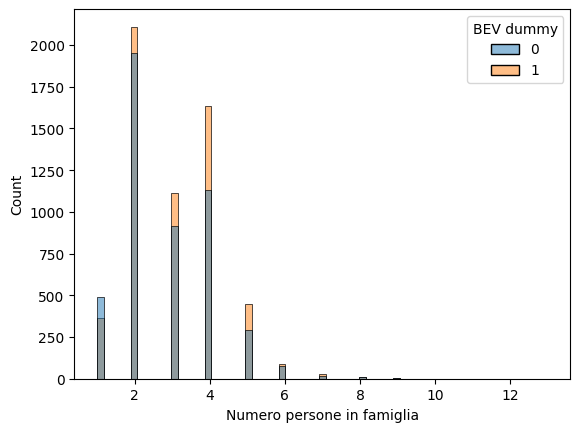

In [ ]:
famiglia_mediano =round(data_originale['Numero persone in famiglia'].median(),0)
famiglia_medio = round(data_originale['Numero persone in famiglia'].mean(),2)
famiglia_std = round(data_originale['Numero persone in famiglia'].std(),2)

print("La media è di:", famiglia_medio, ", la mediana è di:", famiglia_mediano, "e la devianza standard è di:", famiglia_std)
print()
percentili = data_originale['Numero persone in famiglia'].quantile([0, 0.25, 0.5, 0.75, 1])
print(percentili)
print()
sns.histplot(data=data, x="Numero persone in famiglia", hue= "BEV dummy")
plt.show()

In [ ]:
bins = [0, 1.1, 2.1, 3.1, 4.1, float('inf')]
labels = ['Sigle', 'Coppie', 'Famiglie con 1 figlio', 'Famiglie con 2 figli', 'Famiglie con 3 o più di 3 figli']

data_eda_1['Numero persone in famiglia categoriale'] = pd.cut(data_originale['Numero persone in famiglia'], bins=bins, labels=labels, right=False)

print(data_eda_1[['Numero persone in famiglia', 'Numero persone in famiglia categoriale']].head())
#data_eda_1.drop(columns=['Numero persone in famiglia'], inplace=True)

   Numero persone in famiglia Numero persone in famiglia categoriale
0                         2.0                                 Coppie
1                         3.0                  Famiglie con 1 figlio
2                         2.0                                 Coppie
3                         2.0                                 Coppie
4                         3.0                  Famiglie con 1 figlio


In [ ]:
famiglia_counts = data_eda_1['Numero persone in famiglia categoriale'].value_counts()

print(famiglia_counts)

Numero persone in famiglia categoriale
Coppie                             4059
Famiglie con 2 figli               2767
Famiglie con 1 figlio              2025
Famiglie con 3 o più di 3 figli     983
Sigle                               854
Name: count, dtype: int64


### Numero auto in famiglia

La media è di: 2.52 , la mediana è di: 2.0 e la devianza standard è di: 0.92

0.00    1.0
0.25    2.0
0.50    2.0
0.75    3.0
1.00    5.0
Name: Numero di auto in famiglia, dtype: float64



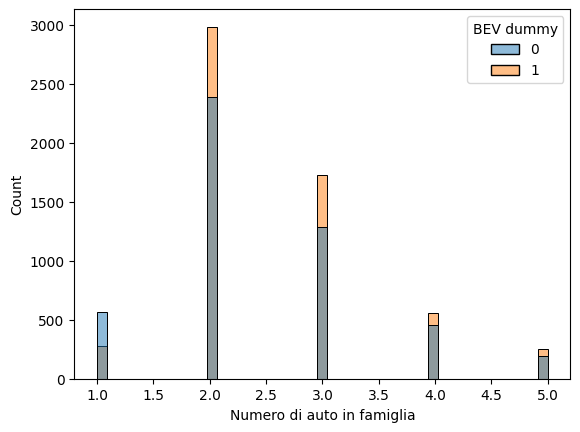

In [ ]:
autfam_mediano =round(data_originale['Numero di auto in famiglia'].median(),0)
autfam_medio = round(data_originale['Numero di auto in famiglia'].mean(),2)
autfam_std = round(data_originale['Numero di auto in famiglia'].std(),2)

print("La media è di:", autfam_medio, ", la mediana è di:", autfam_mediano, "e la devianza standard è di:", autfam_std)
print()
percentili = data_originale['Numero di auto in famiglia'].quantile([0, 0.25, 0.5, 0.75, 1])
print(percentili)
print()
sns.histplot(data=data, x="Numero di auto in famiglia", hue= "BEV dummy")
plt.show()

In [ ]:
bins = [0, 1.1, 2.1, 3.1, float('inf')]
labels = ['Un Auto', 'Due Auto', 'Tre Auto', 'Più di quattro Auto']

data_eda_1['Numero di auto in famiglia categoriale'] = pd.cut(data_originale['Numero di auto in famiglia'], bins=bins, labels=labels, right=False)

print(data_eda_1[['Numero di auto in famiglia', 'Numero di auto in famiglia categoriale']].head())
#data_eda_1.drop(columns=['Numero di auto in famiglia'], inplace=True)

   Numero di auto in famiglia Numero di auto in famiglia categoriale
0                         2.0                               Due Auto
1                         3.0                               Tre Auto
2                         3.0                               Tre Auto
3                         2.0                               Due Auto
4                         3.0                               Tre Auto


In [ ]:
famiglia_counts = data_eda_1['Numero di auto in famiglia categoriale'].value_counts()

print(famiglia_counts)

Numero di auto in famiglia categoriale
Due Auto               5377
Tre Auto               3006
Più di quattro Auto    1464
Un Auto                 841
Name: count, dtype: int64


### download

In [ ]:
data_eda_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10688 entries, 0 to 10687
Data columns (total 20 columns):
 #   Column                                                        Non-Null Count  Dtype   
---  ------                                                        --------------  -----   
 0   Genere                                                        10688 non-null  object  
 1   Classe d'età                                                  10688 non-null  object  
 2   Reddito familiare                                             10688 non-null  int64   
 3   Classe Reddito Familiare                                      10688 non-null  object  
 4   Livello di istruzione                                         10688 non-null  object  
 5   Casa di proprietà                                             10688 non-null  object  
 6   Casa Indipendente                                             10688 non-null  object  
 7   Numero persone in famiglia                                

In [ ]:
#data_eda_1 = data_eda_1[['Numero persone in famiglia, categoriale','Numero di auto in famiglia, categoriale','Casa di proprietà','Casa Indipendente']]

In [ ]:
#data_eda_vif.info()

In [ ]:
#data_eda_vif.to_csv('data_eda_vif.csv', encoding = 'utf-8-sig')
#files.download('data_eda_vif.csv')

In [ ]:
#print(pd.crosstab(data_eda_1['Casa Indipendente'], data_eda_1['BEV dummy']))


## 6.2. data_eda_2 x MCA

In [ ]:
data_eda_2 = data_eda_1.copy()

In [ ]:
print(pd.crosstab(data_eda_1['Casa Indipendente'], data_eda_1['BEV dummy']))
print(pd.crosstab(data_eda_2['Casa Indipendente'], data_eda_2['BEV dummy']))


BEV dummy           0.0   1.0
Casa Indipendente            
No                  873   813
Si                 4019  4983
BEV dummy           0.0   1.0
Casa Indipendente            
No                  873   813
Si                 4019  4983


### VMT

Il VMT medio è di: 14282.45 , il VMT mediano è di: 11558.0 e la devianza standard è di: 15964.56

0.00         6.72000
0.25      8391.00000
0.50     11557.89474
0.75     15960.00000
1.00    378000.00000
Name: VMT annuo, dtype: float64



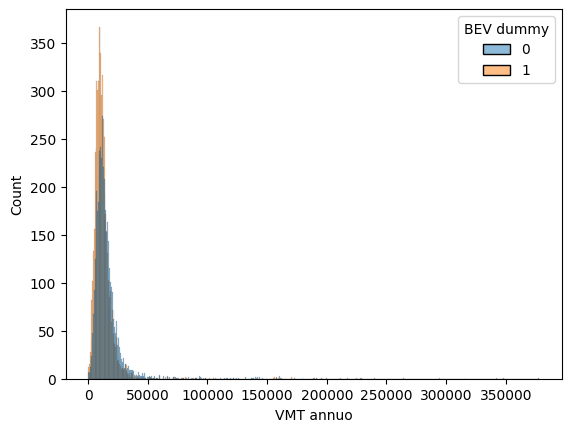

In [ ]:
data['VMT annuo'] = pd.to_numeric(data['VMT annuo'].str.replace(',', '.'), errors='coerce')

VMT_mediano =round(data['VMT annuo'].median(),0)
VMT_medio = round(data['VMT annuo'].mean(),2)
VMT_std = round(data['VMT annuo'].std(),2)

print("Il VMT medio è di:", VMT_medio, ", il VMT mediano è di:", VMT_mediano, "e la devianza standard è di:", VMT_std)
print()
percentili = data['VMT annuo'].quantile([0, 0.25, 0.5, 0.75, 1])
print(percentili)
print()
sns.histplot(data=data, x="VMT annuo", hue= "BEV dummy")
plt.show()

In [ ]:
vmt_1 = 6.720000
vmt_2 = 8391.000000
vmt_3 = 11557
vmt_4 = 15960
vmt_5 = 378000

punto1_vmt = vmt_1
punto2_vmt = (vmt_2 - vmt_1)/2+vmt_1
punto3_vmt = (vmt_3 - vmt_2)/2+vmt_2
punto4_vmt = (vmt_4 - vmt_3)/2+vmt_3
punto5_vmt = (vmt_5 - vmt_4)/2+vmt_4
punto6_vmt = vmt_5

Classe_vmt_1 = [punto1_vmt, punto2_vmt]
Classe_vmt_2 = [punto2_vmt, punto3_vmt]
Classe_vmt_3 = [punto3_vmt, punto4_vmt]
Classe_vmt_4 = [punto4_vmt, punto5_vmt]
Classe_vmt_5 = [punto5_vmt, punto6_vmt]

print("VMT molto basso:", [round(x,0) for x in Classe_vmt_1])
print("VMT basso:", [round(x,0) for x in Classe_vmt_2])
print("VMT medio:", [round(x,0) for x in Classe_vmt_3])
print("VMT alto:", [round(x,0) for x in Classe_vmt_4])
print("VMT molto alto:", [round(x,0) for x in Classe_vmt_5])

VMT molto basso: [7.0, 4199.0]
VMT basso: [4199.0, 9974.0]
VMT medio: [9974.0, 13758.0]
VMT alto: [13758.0, 196980.0]
VMT molto alto: [196980.0, 378000]


In [ ]:
bins = [0, punto2_vmt, punto3_vmt, punto4_vmt, punto5_vmt, float('inf')]
labels = ['VMT Molto basso', 'VMT Basso', 'VMT Medio', 'VMT Alto', 'VMT Molto alto']

data_eda_2['VMT categoriale'] = pd.cut(data_originale['VMT annuo'], bins=bins, labels=labels, right=False)

print(data_eda_2[['VMT annuo', 'VMT categoriale']].head())
#data_eda_2.drop(columns=['VMT annuo'], inplace=True)


   VMT annuo VMT categoriale
0      14622        VMT Alto
1       9197       VMT Basso
2       5082       VMT Basso
3      13025       VMT Medio
4      18000        VMT Alto


In [ ]:
vmt_counts = data_eda_2['VMT categoriale'].value_counts()

print(vmt_counts)

VMT categoriale
VMT Alto           3726
VMT Basso          3532
VMT Medio          3007
VMT Molto basso     407
VMT Molto alto       16
Name: count, dtype: int64


### Viaggio più lungo

Il viaggio più lungo medio è di: 376.78 , il viaggio più lungo mediano è di: 318.0 e la devianza standard è di: 356.6

0.00       0.210
0.25     175.495
0.50     317.870
0.75     434.305
1.00    4865.700
Name: Viaggio più lungo negli ultimi 12 mesi, dtype: float64



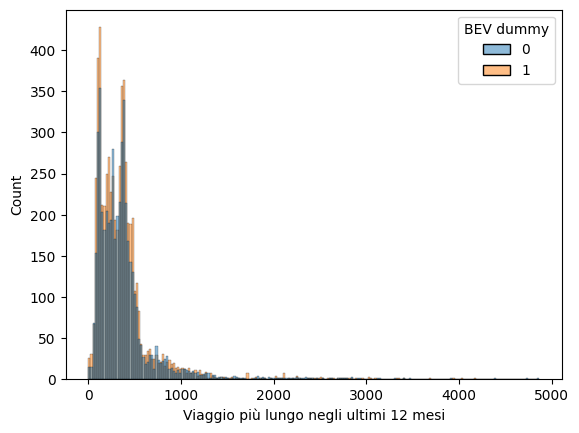

In [ ]:
viaggio_mediano =round(data['Viaggio più lungo negli ultimi 12 mesi'].median(),0)
viaggio_medio = round(data['Viaggio più lungo negli ultimi 12 mesi'].mean(),2)
viaggio_std = round(data['Viaggio più lungo negli ultimi 12 mesi'].std(),2)

print("Il viaggio più lungo medio è di:", viaggio_medio, ", il viaggio più lungo mediano è di:", viaggio_mediano, "e la devianza standard è di:", viaggio_std)
print()
percentili = data['Viaggio più lungo negli ultimi 12 mesi'].quantile([0, 0.25, 0.5, 0.75, 1])
print(percentili)
print()
sns.histplot(data=data, x="Viaggio più lungo negli ultimi 12 mesi", hue= "BEV dummy")
plt.show()

In [ ]:
bins = [0, 175, 350, 550, float('inf')]
labels = ['Viaggio: meno di 175', 'Viaggio: tra 175 e 350', 'Viaggio: tra 350 e 550', 'Viaggio: più di 550']

data_eda_2['Viaggio lungo categoriale'] = pd.cut(data_originale['Viaggio più lungo negli ultimi 12 mesi'], bins=bins, labels=labels, right=False)

print(data_eda_2[['Viaggio lungo categoriale', 'Viaggio più lungo negli ultimi 12 mesi']].head())
#data_eda_2.drop(columns=['Viaggio più lungo negli ultimi 12 mesi'], inplace=True)

  Viaggio lungo categoriale  Viaggio più lungo negli ultimi 12 mesi
0    Viaggio: tra 350 e 550                                  483.14
1       Viaggio: più di 550                                  568.09
2    Viaggio: tra 175 e 350                                  255.16
3    Viaggio: tra 175 e 350                                  312.78
4      Viaggio: meno di 175                                  125.79


In [ ]:
viaggilunghi_counts = data_eda_2['Viaggio lungo categoriale'].value_counts()

print(viaggilunghi_counts)

Viaggio lungo categoriale
Viaggio: tra 350 e 550    3345
Viaggio: tra 175 e 350    3292
Viaggio: meno di 175      2669
Viaggio: più di 550       1382
Name: count, dtype: int64


### Numero viaggi lunghi

0.00    0.000000e+00
0.25    0.000000e+00
0.50    1.000000e+00
0.75    3.000000e+00
1.00    2.222222e+10
Name: Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi, dtype: float64


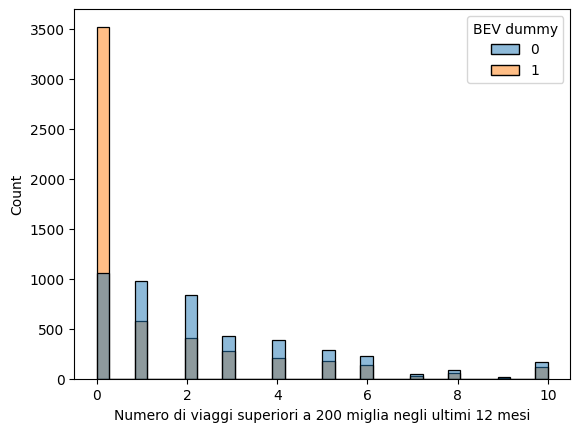

In [ ]:
percentili = data['Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi'].quantile([0, 0.25, 0.5, 0.75, 1])
print(percentili)

sns.histplot(data=data[data["Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi"] <= 10],
             x="Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi",
             hue="BEV dummy")
plt.show()

In [ ]:
bins = [0.0, 0.1, 1.1, 2.1, float('inf')]
labels = ['Chi non ne fa viaggi lunghi', 'Un viaggio lungo all anno', '2 viaggi lunghi all anno', '3 o più viaggi lunghi']

data_eda_2["Numero viaggi lunghi all'anno categoriale"] = pd.cut(data_originale['Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi'], bins=bins, labels=labels, right=False)

print(data_eda_2[["Numero viaggi lunghi all'anno categoriale", 'Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi']].head())
#data_eda_2.drop(columns=['Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi'], inplace=True)

  Numero viaggi lunghi all'anno categoriale  \
0                 Un viaggio lungo all anno   
1                 Un viaggio lungo all anno   
2                 Un viaggio lungo all anno   
3                 Un viaggio lungo all anno   
4               Chi non ne fa viaggi lunghi   

   Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi  
0                                                  1             
1                                                  1             
2                                                  1             
3                                                  1             
4                                                  0             


In [ ]:
nviaggi_counts = data_eda_2["Numero viaggi lunghi all'anno categoriale"].value_counts()

print(nviaggi_counts)

Numero viaggi lunghi all'anno categoriale
Un viaggio lungo all anno      4299
Chi non ne fa viaggi lunghi    3132
3 o più viaggi lunghi          2413
2 viaggi lunghi all anno        844
Name: count, dtype: int64


### Distanza casa lavoro

0.00       0.00
0.25       6.43
0.50      14.13
0.75      24.55
1.00    2381.91
Name: Distanza casa-lavoro, dtype: float64


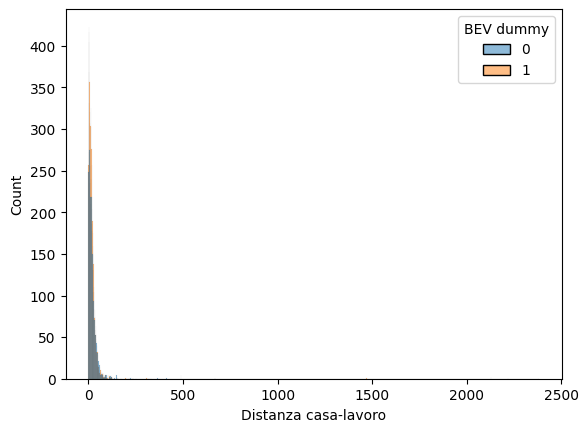

In [ ]:
percentili = data['Distanza casa-lavoro'].quantile([0, 0.25, 0.5, 0.75, 1])
print(percentili)
sns.histplot(data=data, x="Distanza casa-lavoro", hue= "BEV dummy")
plt.show()

In [ ]:
bins = [0.0, 6.5, 15, 25, 45, float('inf')]
labels = ['Casa-Lavoro: meno di 6,5 miglia', 'Casa-Lavoro: tra 6,5 e 15 miglia', 'Casa-Lavoro: tra 15 e 25 miglia', 'Casa-Lavoro: tra 25 e 45 miglia', 'Casa-Lavoro: più di 45 miglia']

data_eda_2['Distanza casa-lavoro categoriale'] = pd.cut(data_originale['Distanza casa-lavoro'], bins=bins, labels=labels, right=False)

print(data_eda_2[['Distanza casa-lavoro categoriale', 'Distanza casa-lavoro']].head())
#data_eda_2.drop(columns=['Distanza casa-lavoro'], inplace=True)

   Distanza casa-lavoro categoriale  Distanza casa-lavoro
0   Casa-Lavoro: meno di 6,5 miglia                  0.01
1  Casa-Lavoro: tra 6,5 e 15 miglia                 10.69
2   Casa-Lavoro: tra 15 e 25 miglia                 17.63
3   Casa-Lavoro: meno di 6,5 miglia                  3.53
4   Casa-Lavoro: tra 25 e 45 miglia                 28.05


In [ ]:
dist_counts = data_eda_2['Distanza casa-lavoro categoriale'].value_counts()

print(dist_counts)

Distanza casa-lavoro categoriale
Casa-Lavoro: tra 6,5 e 15 miglia    2938
Casa-Lavoro: meno di 6,5 miglia     2697
Casa-Lavoro: tra 15 e 25 miglia     2454
Casa-Lavoro: tra 25 e 45 miglia     1933
Casa-Lavoro: più di 45 miglia        666
Name: count, dtype: int64


### Emissioni

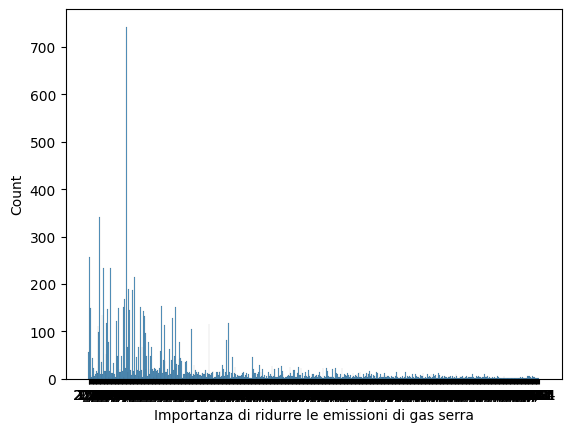

In [ ]:
sns.histplot(data=data, x="Importanza di ridurre le emissioni di gas serra")
plt.show()

In [ ]:
emiss_1 = -3
emiss_2 = -1.5
emiss_3 = 0
emiss_4= 1.5
emiss_5 = 3

punto1_emi = emiss_1
punto2_emi = (emiss_2 - emiss_1)/2+emiss_1
punto3_emi = (emiss_3 - emiss_2)/2+emiss_2
punto4_emi = (emiss_4 - emiss_3)/2+emiss_3
punto5_emi = (emiss_5 - emiss_4)/2+emiss_4
punto6_emi = emiss_5

Classe_emi_1 = [punto1_emi, punto2_emi]
Classe_emi_2 = [punto2_emi, punto3_emi]
Classe_emi_3 = [punto3_emi, punto4_emi]
Classe_emi_4 = [punto4_emi, punto5_emi]
Classe_emi_5 = [punto5_emi, punto6_emi]

print("importanza per le emissioni: molto basso:", [round(x,2) for x in Classe_emi_1])
print("importanza per le emissioni: basso:", [round(x,2) for x in Classe_emi_2])
print("importanza per le emissioni: medio:", [round(x,2) for x in Classe_emi_3])
print("importanza per le emissioni: alto:", [round(x,2) for x in Classe_emi_4])
print("importanza per le emissioni: molto alto:", [round(x,2) for x in Classe_emi_5])

importanza per le emissioni: molto basso: [-3, -2.25]
importanza per le emissioni: basso: [-2.25, -0.75]
importanza per le emissioni: medio: [-0.75, 0.75]
importanza per le emissioni: alto: [0.75, 2.25]
importanza per le emissioni: molto alto: [2.25, 3]


In [ ]:
bins = [punto1_emi, punto2_emi, punto3_emi, punto4_emi, punto5_emi, float('inf')]
labels = ['Molto basso', 'Basso', 'Medio', 'Alto', 'Molto alto']

data_eda_2['Sensibilità ambientale categoriale'] = pd.cut(data_originale['Importanza di ridurre le emissioni di gas serra'], bins=bins, labels=labels, right=False)

print(data_eda_2[['Importanza di ridurre le emissioni di gas serra', 'Sensibilità ambientale categoriale']].head())
#data_eda_2.drop(columns=['Importanza di ridurre le emissioni di gas serra'], inplace=True)

   Importanza di ridurre le emissioni di gas serra  \
0                                             2.52   
1                                             2.76   
2                                             2.60   
3                                             1.23   
4                                             1.08   

  Sensibilità ambientale categoriale  
0                         Molto alto  
1                         Molto alto  
2                         Molto alto  
3                               Alto  
4                               Alto  


In [ ]:
emi_counts = data_eda_2['Sensibilità ambientale categoriale'].value_counts()

print(emi_counts)

Sensibilità ambientale categoriale
Molto alto     6187
Alto           2019
Medio          1380
Molto basso     689
Basso           413
Name: count, dtype: int64


### BEV Dummy

In [ ]:
data_eda_2['BEV dummy'] = data_originale['BEV dummy'].replace({0: 'No', 1: 'Si'})


### Età - standby

In [ ]:
#data_eda_2["Classe d'età"] = data_originale["Classe d'età"].replace({0: 'Giovani', 1: 'Giovani adulti'})
#bins = [0, 25, 45, 65, float('inf')]
#labels = ['Giovani', 'Giovani Adulti', 'Adulti', 'Adulti avanzati']

#data_new['Età categoriale'] = pd.cut(data_orgiginale['Età'], bins=bins, labels=labels, right=False)

#print(data_new[['Età', 'Età categoriale']].head())
#data_new.drop(columns=['Età'], inplace=True)

## Resoconto

In [ ]:
data_eda_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10688 entries, 0 to 10687
Data columns (total 25 columns):
 #   Column                                                        Non-Null Count  Dtype   
---  ------                                                        --------------  -----   
 0   Genere                                                        10688 non-null  object  
 1   Classe d'età                                                  10688 non-null  object  
 2   Reddito familiare                                             10688 non-null  int64   
 3   Classe Reddito Familiare                                      10688 non-null  object  
 4   Livello di istruzione                                         10688 non-null  object  
 5   Casa di proprietà                                             10688 non-null  object  
 6   Casa Indipendente                                             10688 non-null  object  
 7   Numero persone in famiglia                                

In [ ]:
data_eda_2 = data_eda_2.drop(columns=['Reddito familiare'], errors='ignore')
data_eda_2.head()

Genere Classe d'età Classe Reddito Familiare  \
0  Maschio        65-74               Molto alta   
1  Maschio        65-74               Molto alta   
2  Maschio        55-64                    Media   
3  Maschio        75-79                     Alta   
4  Maschio        45-54        Estremamente alta   

               Livello di istruzione Casa di proprietà Casa Indipendente  \
0                          Laurea 1L                Si                Si   
1              Laurea 2L o Dottorato                Si                Si   
2  Diploma o Qualifica professionale                Si                Si   
3              Laurea 2L o Dottorato                Si                Si   
4  Diploma o Qualifica professionale                Si                Si   

   Numero persone in famiglia  Numero di auto in famiglia  \
0                         2.0                         2.0   
1                         3.0                         3.0   
2                         2.0                         3.0   
3                         2.0                         2.0   
4                         3.0                         3.0   

   Importanza di ridurre le emissioni di gas serra  \
0                                             2.52   
1                                             2.76   
2                                             2.60   
3                                             1.23   
4                                             1.08   

  Tipologia di auto precedente  ...  \
0                         PHEV  ...   
1                          HEV  ...   
2                         PHEV  ...   
3                          HEV  ...   
4                          HEV  ...   

  Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi  \
0                                                  1             
1                                                  1             
2                                                  1             
3                                                  1             
4                                                  0             

  Distanza casa-lavoro VMT annuo  Numero persone in famiglia categoriale  \
0                 0.01     14622                                  Coppie   
1                10.69      9197                   Famiglie con 1 figlio   
2                17.63      5082                                  Coppie   
3                 3.53     13025                                  Coppie   
4                28.05     18000                   Famiglie con 1 figlio   

   Numero di auto in famiglia categoriale  VMT categoriale  \
0                                Due Auto         VMT Alto   
1                                Tre Auto        VMT Basso   
2                                Tre Auto        VMT Basso   
3                                Due Auto        VMT Medio   
4                                Tre Auto         VMT Alto   

   Viaggio lungo categoriale Numero viaggi lunghi all'anno categoriale  \
0     Viaggio: tra 350 e 550                 Un viaggio lungo all anno   
1        Viaggio: più di 550                 Un viaggio lungo all anno   
2     Viaggio: tra 175 e 350                 Un viaggio lungo all anno   
3     Viaggio: tra 175 e 350                 Un viaggio lungo all anno   
4       Viaggio: meno di 175               Chi non ne fa viaggi lunghi   

   Distanza casa-lavoro categoriale Sensibilità ambientale categoriale  
0   Casa-Lavoro: meno di 6,5 miglia                         Molto alto  
1  Casa-Lavoro: tra 6,5 e 15 miglia                         Molto alto  
2   Casa-Lavoro: tra 15 e 25 miglia                         Molto alto  
3   Casa-Lavoro: meno di 6,5 miglia                               Alto  
4   Casa-Lavoro: tra 25 e 45 miglia                               Alto  

[5 rows x 24 columns]

In [ ]:
print(pd.crosstab(data_eda_1['Casa Indipendente'], data_eda_1['BEV dummy']))
print(pd.crosstab(data_eda_2['Casa Indipendente'], data_eda_2['BEV dummy']))
print(pd.crosstab(data_eda_1['Casa di proprietà'], data_eda_1['BEV dummy']))
print(pd.crosstab(data_eda_2['Casa di proprietà'], data_eda_2['BEV dummy']))


BEV dummy           0.0   1.0
Casa Indipendente            
No                  873   813
Si                 4019  4983
BEV dummy            No    Si
Casa Indipendente            
No                  873   813
Si                 4019  4983
BEV dummy           0.0   1.0
Casa di proprietà            
No                  761   676
Si                 4131  5120
BEV dummy            No    Si
Casa di proprietà            
No                  761   676
Si                 4131  5120


In [ ]:
#data_eda_2.to_csv('data_eda_2.csv', encoding = 'utf-8-sig')
#files.download('data_eda_2.csv')

In [ ]:
print(", ".join([f'"{col}"' for col in data_eda_2.columns]))

"Genere", "Classe d'età", "Classe Reddito Familiare", "Livello di istruzione", "Casa di proprietà", "Casa Indipendente", "Numero persone in famiglia", "Numero di auto in famiglia", "Importanza di ridurre le emissioni di gas serra", "Tipologia di auto precedente", "Auto attuale", "Tipologia di auto attuale", "BEV dummy", "Viaggio più lungo negli ultimi 12 mesi", "Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi", "Distanza casa-lavoro", "VMT annuo", "Numero persone in famiglia categoriale", "Numero di auto in famiglia categoriale", "VMT categoriale", "Viaggio lungo categoriale", "Numero viaggi lunghi all'anno categoriale", "Distanza casa-lavoro categoriale", "Sensibilità ambientale categoriale"


## Quant. Matrice di Corr

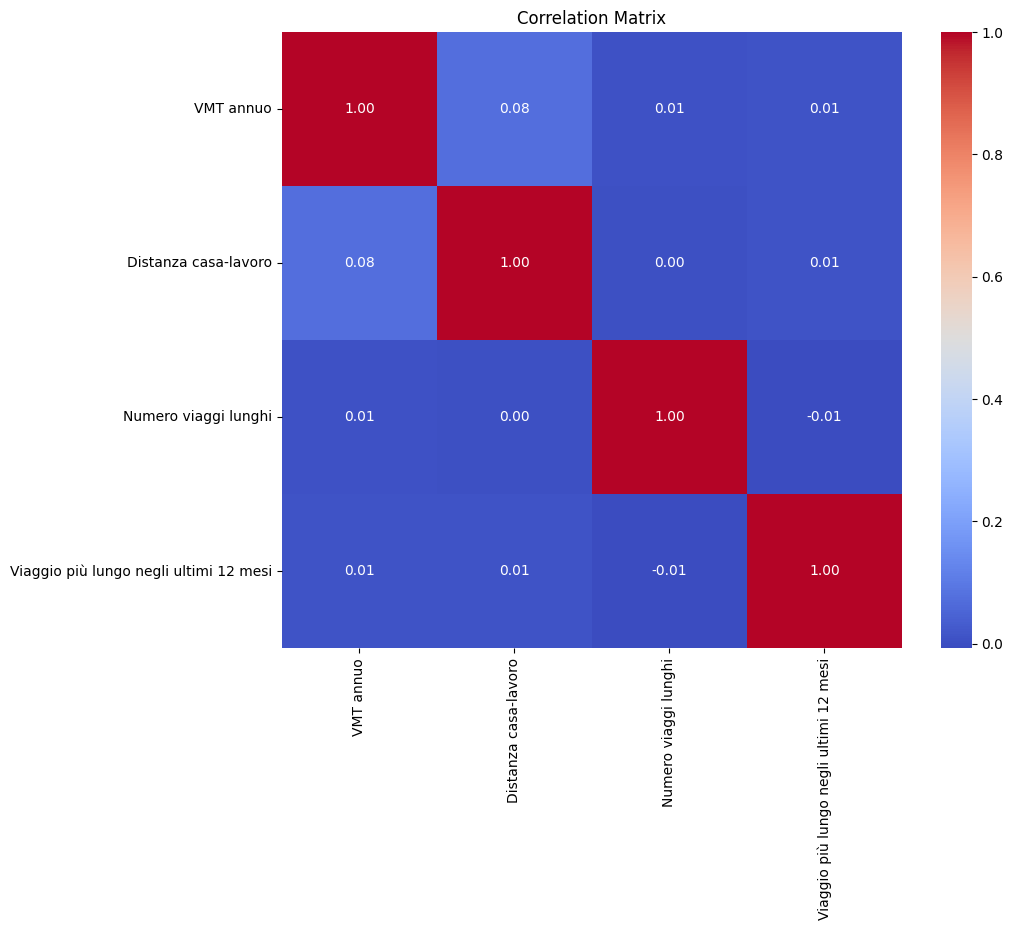

In [ ]:
import matplotlib.backends.backend_pdf

data_ren = data.rename(columns={'Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi': 'Numero viaggi lunghi'})

variables = ['VMT annuo', 'Distanza casa-lavoro', 'Numero viaggi lunghi', 'Viaggio più lungo negli ultimi 12 mesi']
correlation_matrix = data_ren[variables].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
pdf = matplotlib.backends.backend_pdf.PdfPages("correlation_matrix.pdf")
pdf.savefig()  # Saves the current figure
pdf.close()

# 8. Cluster

In [ ]:
!pip install kmodes

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage

%matplotlib inline

## 8.1. K-MODE

### 8.1.1. Preparazione cluster



```
data_BEV_2 = data_eda_2[data_eda_2['BEV dummy'] == 'Si']
data_BEV_2.drop(columns=['Auto attuale','BEV dummy', 'Tipologia di auto attuale'], inplace=True)
data_BEV_2.head()

data_BEV = data_eda_2[data_eda_2['BEV dummy'] == 'Si']
data_BEV.drop(columns=['Auto attuale','BEV dummy', 'Tipologia di auto attuale'], inplace=True)
data_BEV.head()
```



In [ ]:
data_kmode_orig = data_eda_2[data_eda_2['BEV dummy'] == 'Si']
age_mapping = {
    "<25": " <35",
    "25-34": " <35",
    "35-44": "35-44",
    "45-54": "45-64",
    "55-64": "45-64",
    "65-74": ">65",
    "75-79": ">65",
    ">80": ">65"
}

data_kmode_orig["Classe d'età_"] = data_kmode_orig["Classe d'età"].map(age_mapping)

data_kmode = data_kmode_orig.drop(columns=["Viaggio più lungo negli ultimi 12 mesi", "Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi", "Distanza casa-lavoro",
                                      "VMT annuo", "Auto attuale", "Tipologia di auto attuale", "BEV dummy", "Importanza di ridurre le emissioni di gas serra",
                                      "Numero persone in famiglia", "Numero di auto in famiglia","Classe d'età"])

#"Genere", "Classe d'età", "Classe Reddito Familiare", "Livello di istruzione", "Casa di proprietà", "Casa Indipendente", "Numero persone in famiglia", "Numero di auto in famiglia",
#"Importanza di ridurre le emissioni di gas serra", "Tipologia di auto precedente", "Auto attuale", "Tipologia di auto attuale", "BEV dummy",
#"Viaggio più lungo negli ultimi 12 mesi", "Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi", "Distanza casa-lavoro", "VMT annuo",
#"Numero persone in famiglia categoriale", "Numero di auto in famiglia categoriale", "VMT categoriale", "Viaggio lungo categoriale", "Numero viaggi lunghi all'anno categoriale",
#"Distanza casa-lavoro categoriale", "Sensibilità ambientale categoriale"

<ipython-input-46-8b740b528c79>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kmode_orig["Classe d'età_"] = data_kmode_orig["Classe d'età"].map(age_mapping)


In [ ]:
print(", ".join([f'"{col}"' for col in data_kmode.columns]))

"Genere", "Classe Reddito Familiare", "Livello di istruzione", "Casa di proprietà", "Casa Indipendente", "Tipologia di auto precedente", "Numero persone in famiglia categoriale", "Numero di auto in famiglia categoriale", "VMT categoriale", "Viaggio lungo categoriale", "Numero viaggi lunghi all'anno categoriale", "Distanza casa-lavoro categoriale", "Sensibilità ambientale categoriale", "Classe d'età_"


In [ ]:
data_kmode_reduced = data_kmode.drop(columns = ["Casa di proprietà", "Casa Indipendente", "Tipologia di auto precedente", "Sensibilità ambientale categoriale"])

In [ ]:
data_kmode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5796 entries, 284 to 10687
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   Genere                                     5796 non-null   object  
 1   Classe Reddito Familiare                   5796 non-null   object  
 2   Livello di istruzione                      5796 non-null   object  
 3   Casa di proprietà                          5796 non-null   object  
 4   Casa Indipendente                          5796 non-null   object  
 5   Tipologia di auto precedente               5796 non-null   object  
 6   Numero persone in famiglia categoriale     5796 non-null   category
 7   Numero di auto in famiglia categoriale     5796 non-null   category
 8   VMT categoriale                            5796 non-null   category
 9   Viaggio lungo categoriale                  5796 non-null   category
 10  Numero viaggi 

In [ ]:
#data_kmode1 = data_kmode.copy()

cost = []
import numpy as np
K = range(1,11)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1, random_state=42)
    kmode.fit_predict(data_kmode)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 37916.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 37916.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 37916.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 37916.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 37916.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1195, cost: 34161.0
Run 1, iteration: 2/100, moves: 676, cost: 34161.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1516, cost: 34521.0
Init: initializing

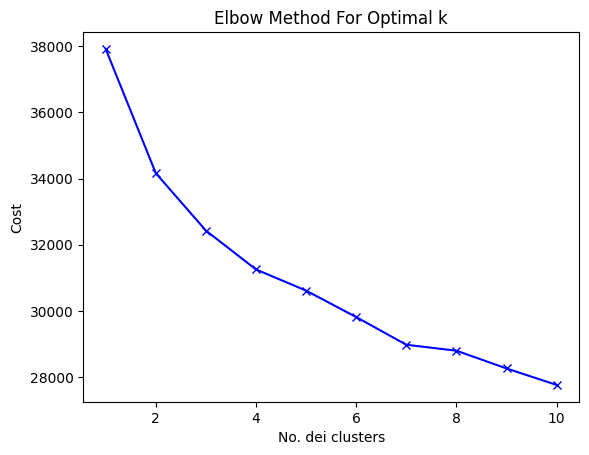

In [ ]:
plt.plot(K, cost, 'bx-')
plt.xlabel('No. dei clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
nclus1 = list(range(1, 11))
cost = cost # Assuming 'cost' is defined in your existing code

df_cost1 = pd.DataFrame({'N Cluster': nclus1, 'Cost Value': cost})
df_cost1

N Cluster  Cost Value
0          1     37916.0
1          2     34161.0
2          3     32427.0
3          4     31253.0
4          5     30613.0
5          6     29814.0
6          7     28978.0
7          8     28798.0
8          9     28262.0
9         10     27764.0



```
categorical_features = data_kmode.select_dtypes(include=['object', 'category']).columns
le = LabelEncoder()
for feature in categorical_features:
    if pd.api.types.is_numeric_dtype(data_kmode[feature]):
        continue

    data_kmode[feature] = le.fit_transform(data_kmode[feature].astype(str)) # Convert to string to handle mixed types


n_clusters_range = range(2, 11)
silhouette_scores = []
inertia_values = []

for n_clusters in n_clusters_range:
    kmode = KModes(n_clusters=n_clusters)
    kmode.fit(data_kmode) # data_BEV should now contain only numerical data
    labels = kmode.labels_
    silhouette_avg = silhouette_score(data_kmode, labels)
    inertia = kmode.inertia_
    silhouette_scores.append(silhouette_avg)
    inertia_values.append(inertia)



plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(n_clusters_range, inertia_values, marker='o')
plt.xlabel('Numeri di Cluster')
plt.ylabel('Inerzia')
plt.title('Inerzia')

plt.subplot(1, 2, 2)
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Numeri di Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette)')

plt.tight_layout()
plt.show()



```



### 8.1.2. 4 Cluster R

In [ ]:
data_kmode_r = pd.read_csv("/content/drive/MyDrive/Tesi/data_kmode_R.csv", sep=",")
data_kmode_r.drop(columns=['BEV.dummy', 'Tipologia.di.auto.attuale', 'Classe.d.età'], inplace=True)

print("\nDistribuzione dei cluster:\n")
print(data_kmode_r['cluster'].value_counts())


Distribuzione dei cluster:

cluster
4    1615
3    1473
1    1438
2    1270
Name: count, dtype: int64


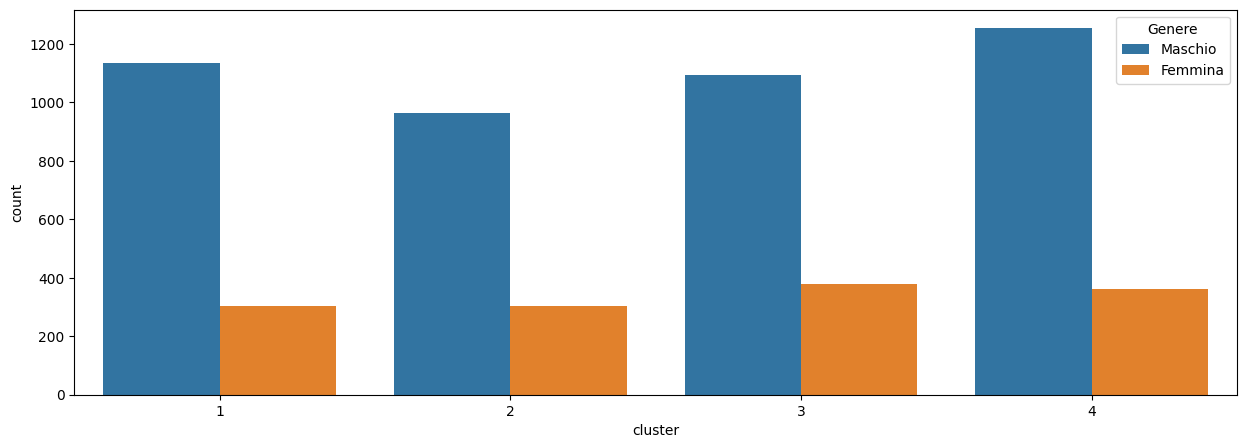

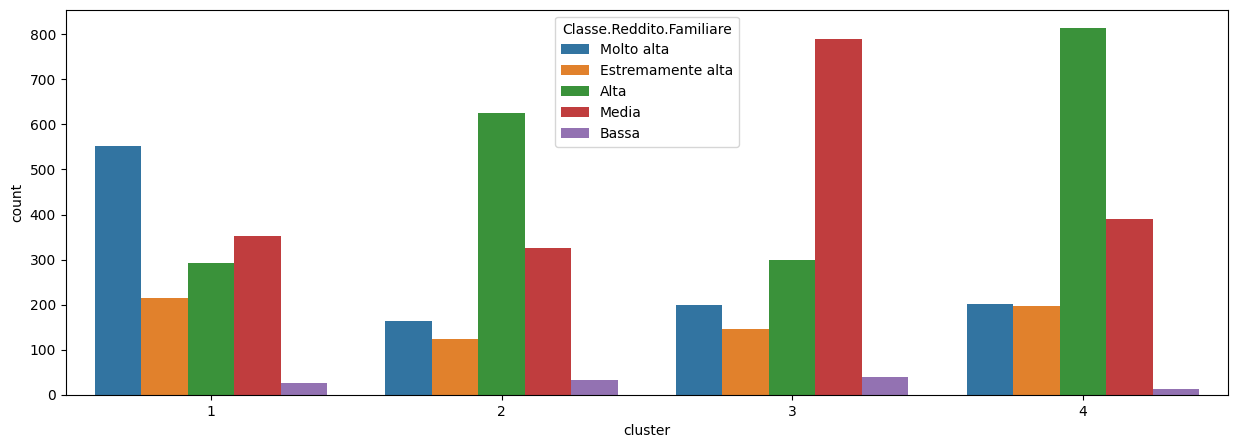

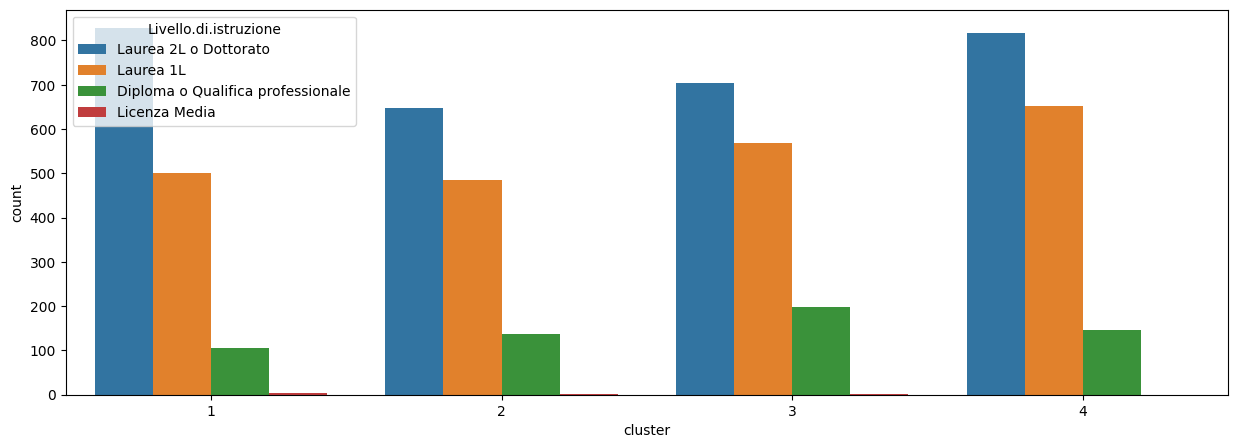

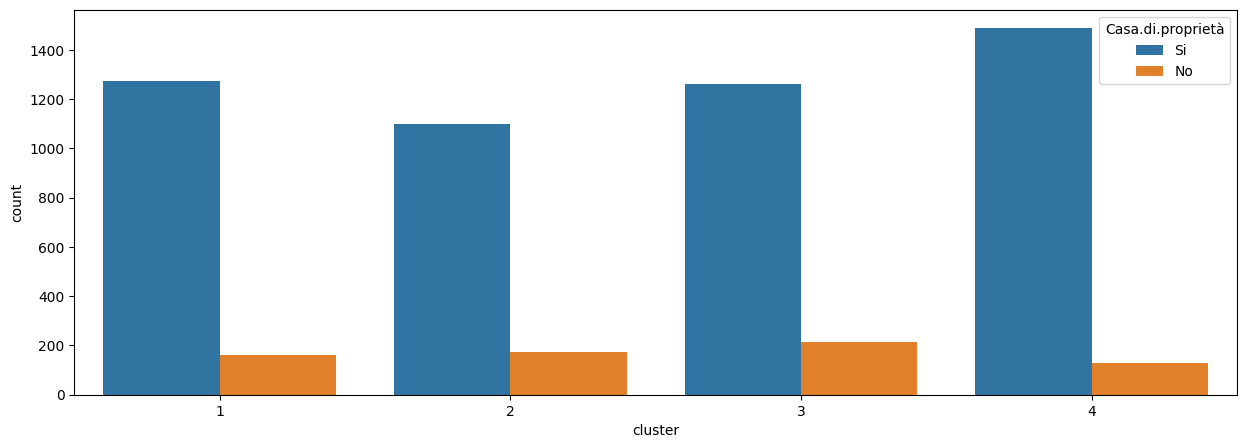

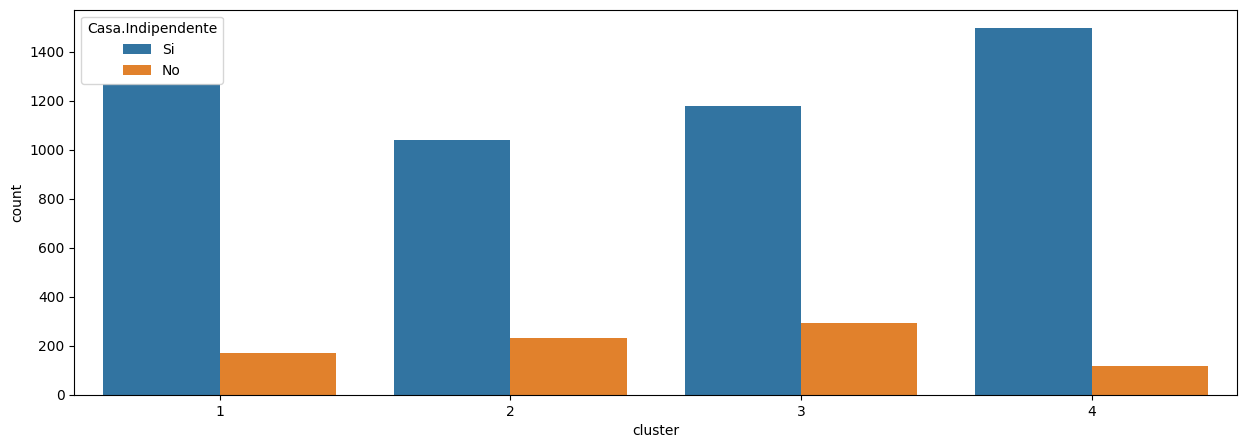

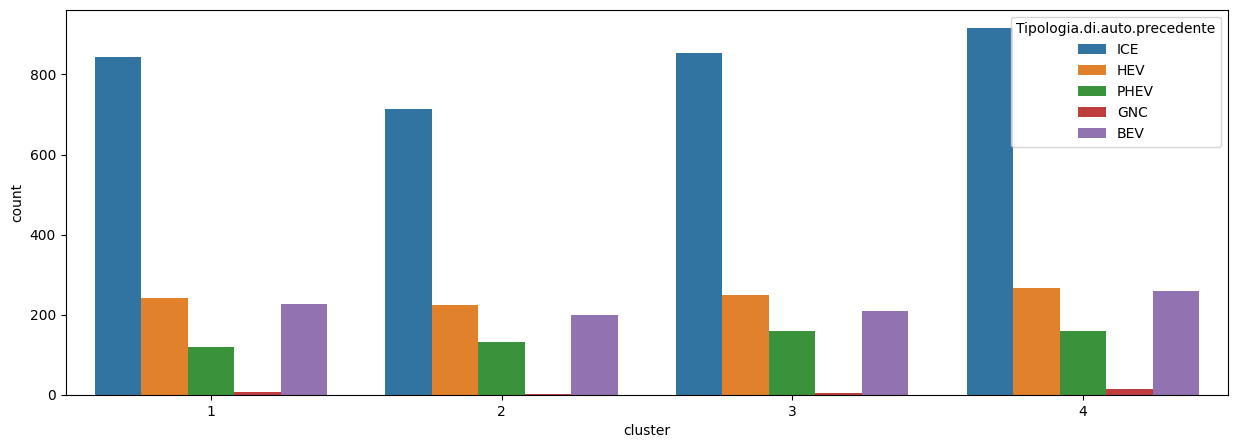

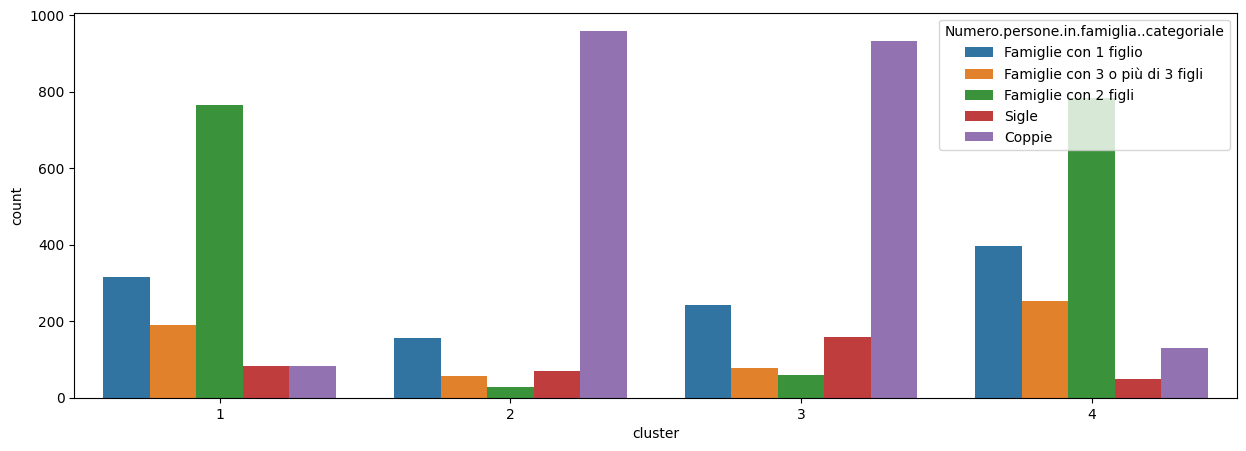

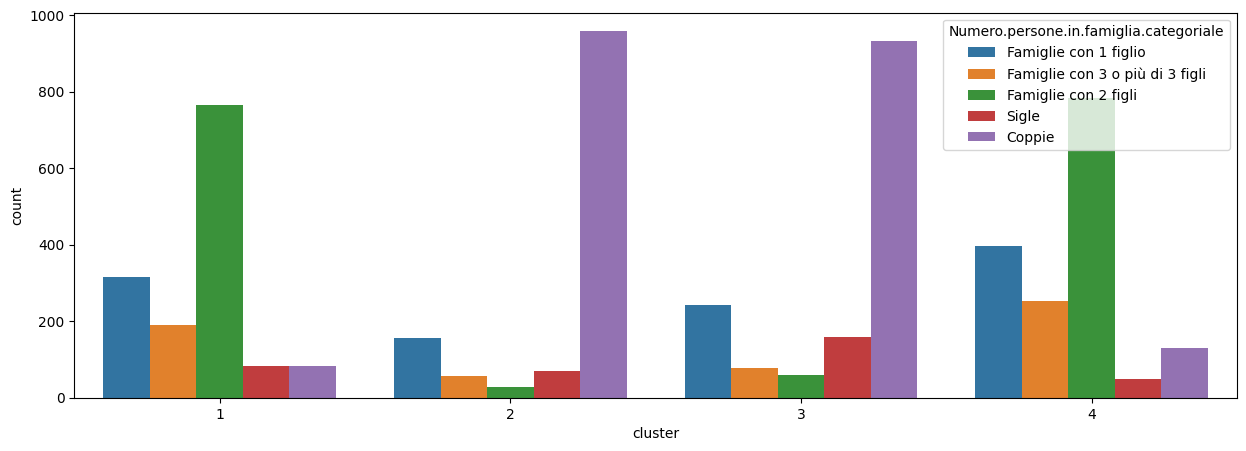

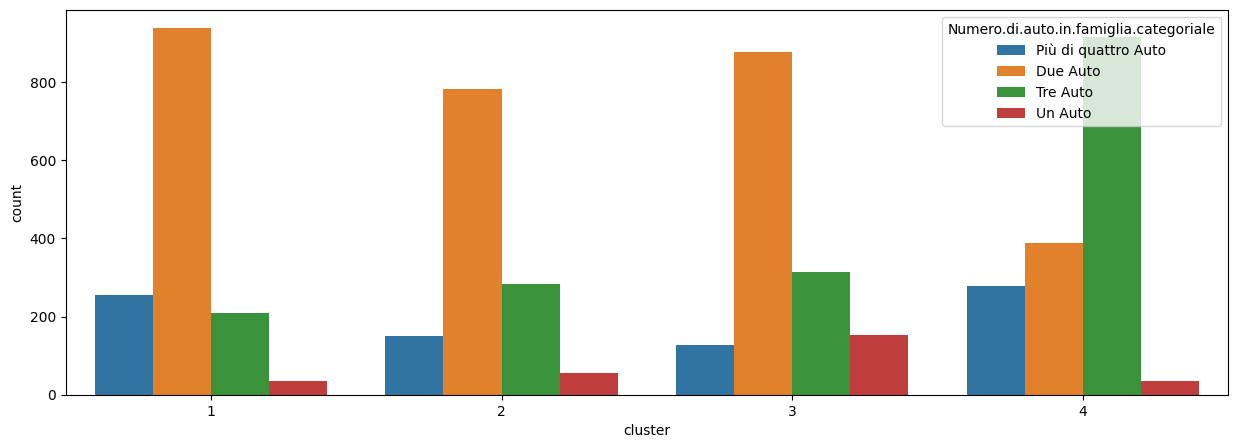

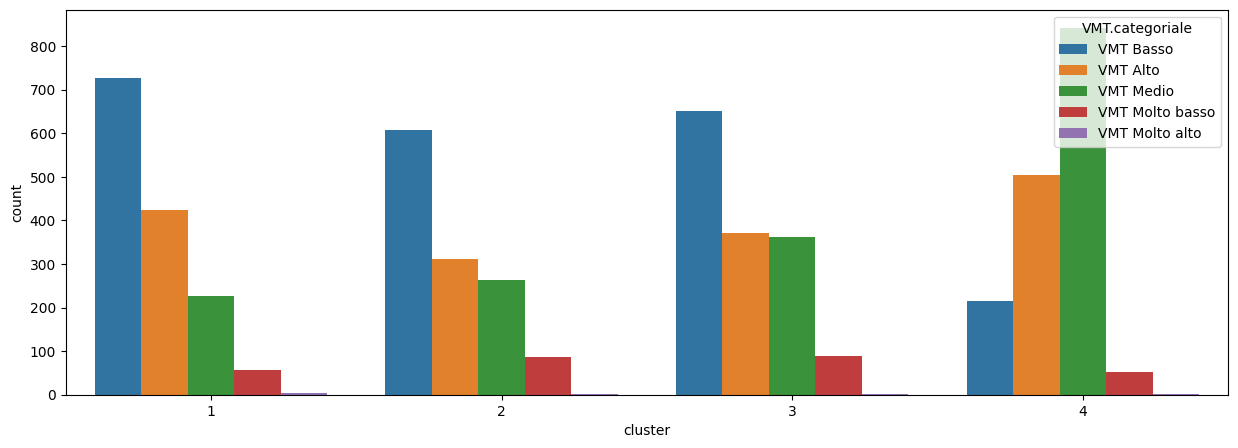

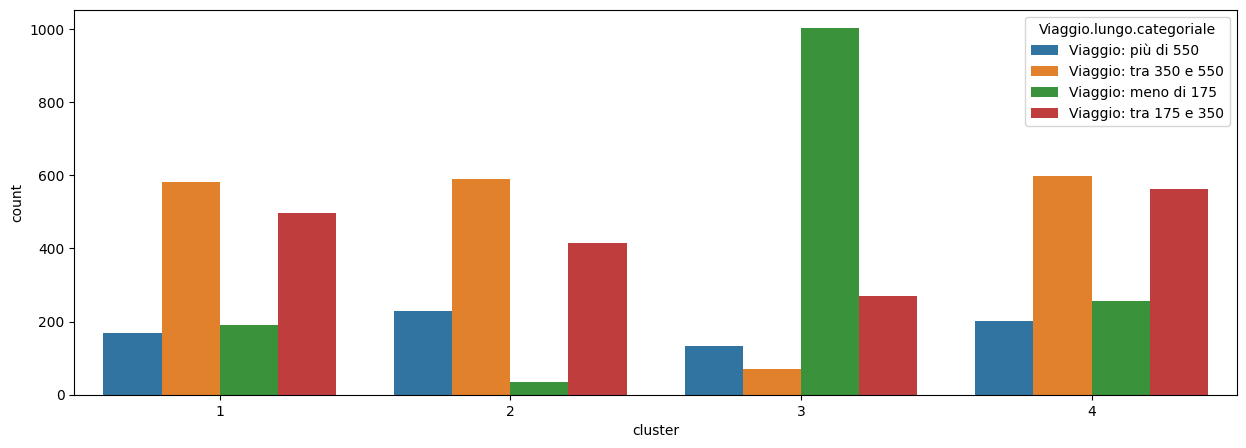

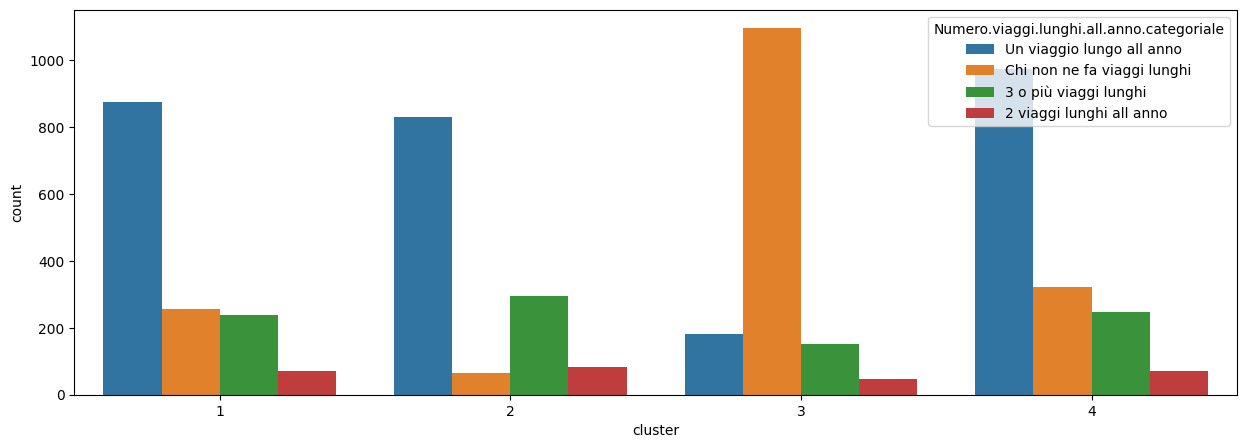

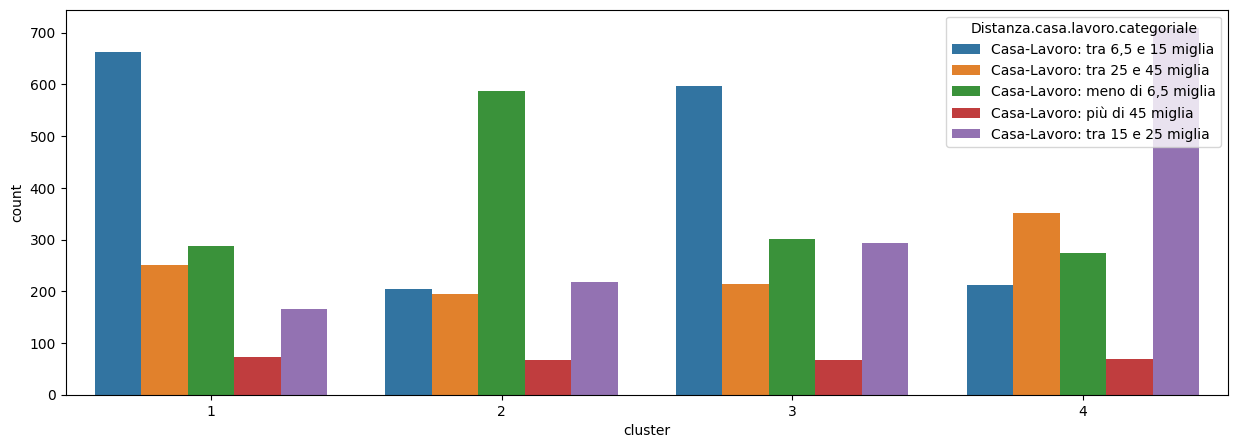

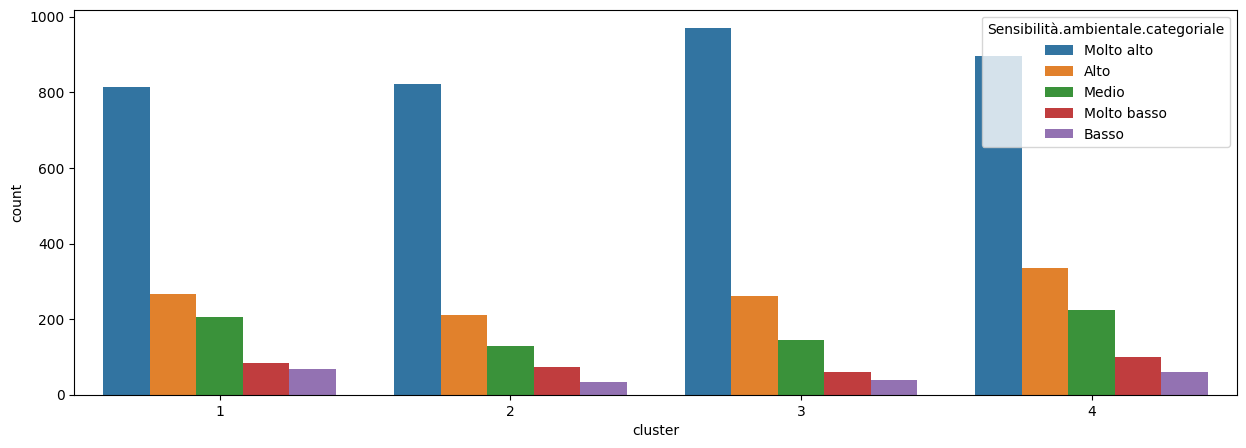

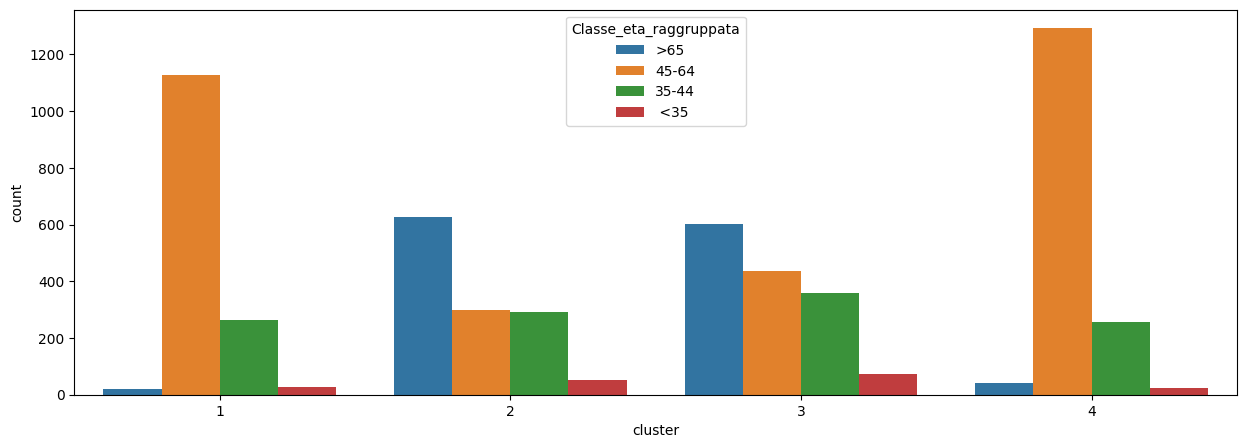

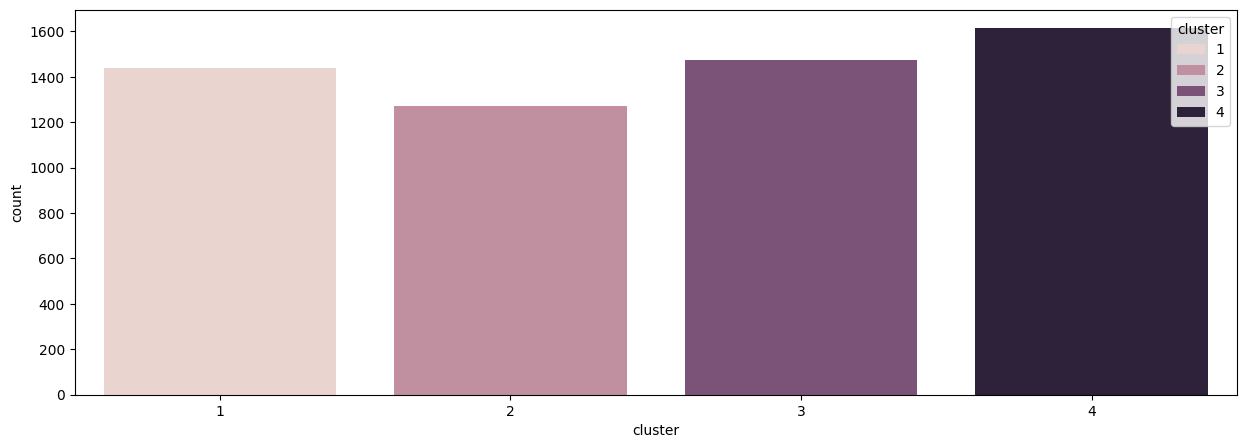

In [ ]:
all_features = data_kmode_r.columns.tolist()

#cluster_0_data = data_BEV[data_BEV['Cluster'] == 2]

for col in all_features:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='cluster',hue=col, data = data_kmode_r)
    plt.show()

In [ ]:
data_kmode_r1= data_kmode_r[data_kmode_r['cluster'] == 1]
data_kmode_r1.drop(columns=['cluster'], inplace=True)

data_kmode_r2= data_kmode_r[data_kmode_r['cluster'] == 2]
data_kmode_r2.drop(columns=['cluster'], inplace=True)

data_kmode_r3= data_kmode_r[data_kmode_r['cluster'] == 3]
data_kmode_r3.drop(columns=['cluster'], inplace=True)

data_kmode_r4= data_kmode_r[data_kmode_r['cluster'] == 4]
data_kmode_r4.drop(columns=['cluster'], inplace=True)

<ipython-input-65-0efdf1c19fa2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kmode_r1.drop(columns=['cluster'], inplace=True)
<ipython-input-65-0efdf1c19fa2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kmode_r2.drop(columns=['cluster'], inplace=True)
<ipython-input-65-0efdf1c19fa2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kmode_r3.drop(columns=['cluster'], inplace=True)
<ipython-input-65-0efdf1c19fa2>:11

In [ ]:
print(", ".join([f'"{col}"' for col in data_kmode_r1.columns]))

"Genere", "Classe.Reddito.Familiare", "Livello.di.istruzione", "Casa.di.proprietà", "Casa.Indipendente", "Tipologia.di.auto.precedente", "Numero.persone.in.famiglia..categoriale", "Numero.persone.in.famiglia.categoriale", "Numero.di.auto.in.famiglia.categoriale", "VMT.categoriale", "Viaggio.lungo.categoriale", "Numero.viaggi.lunghi.all.anno.categoriale", "Distanza.casa.lavoro.categoriale", "Sensibilità.ambientale.categoriale", "Classe_eta_raggruppata"


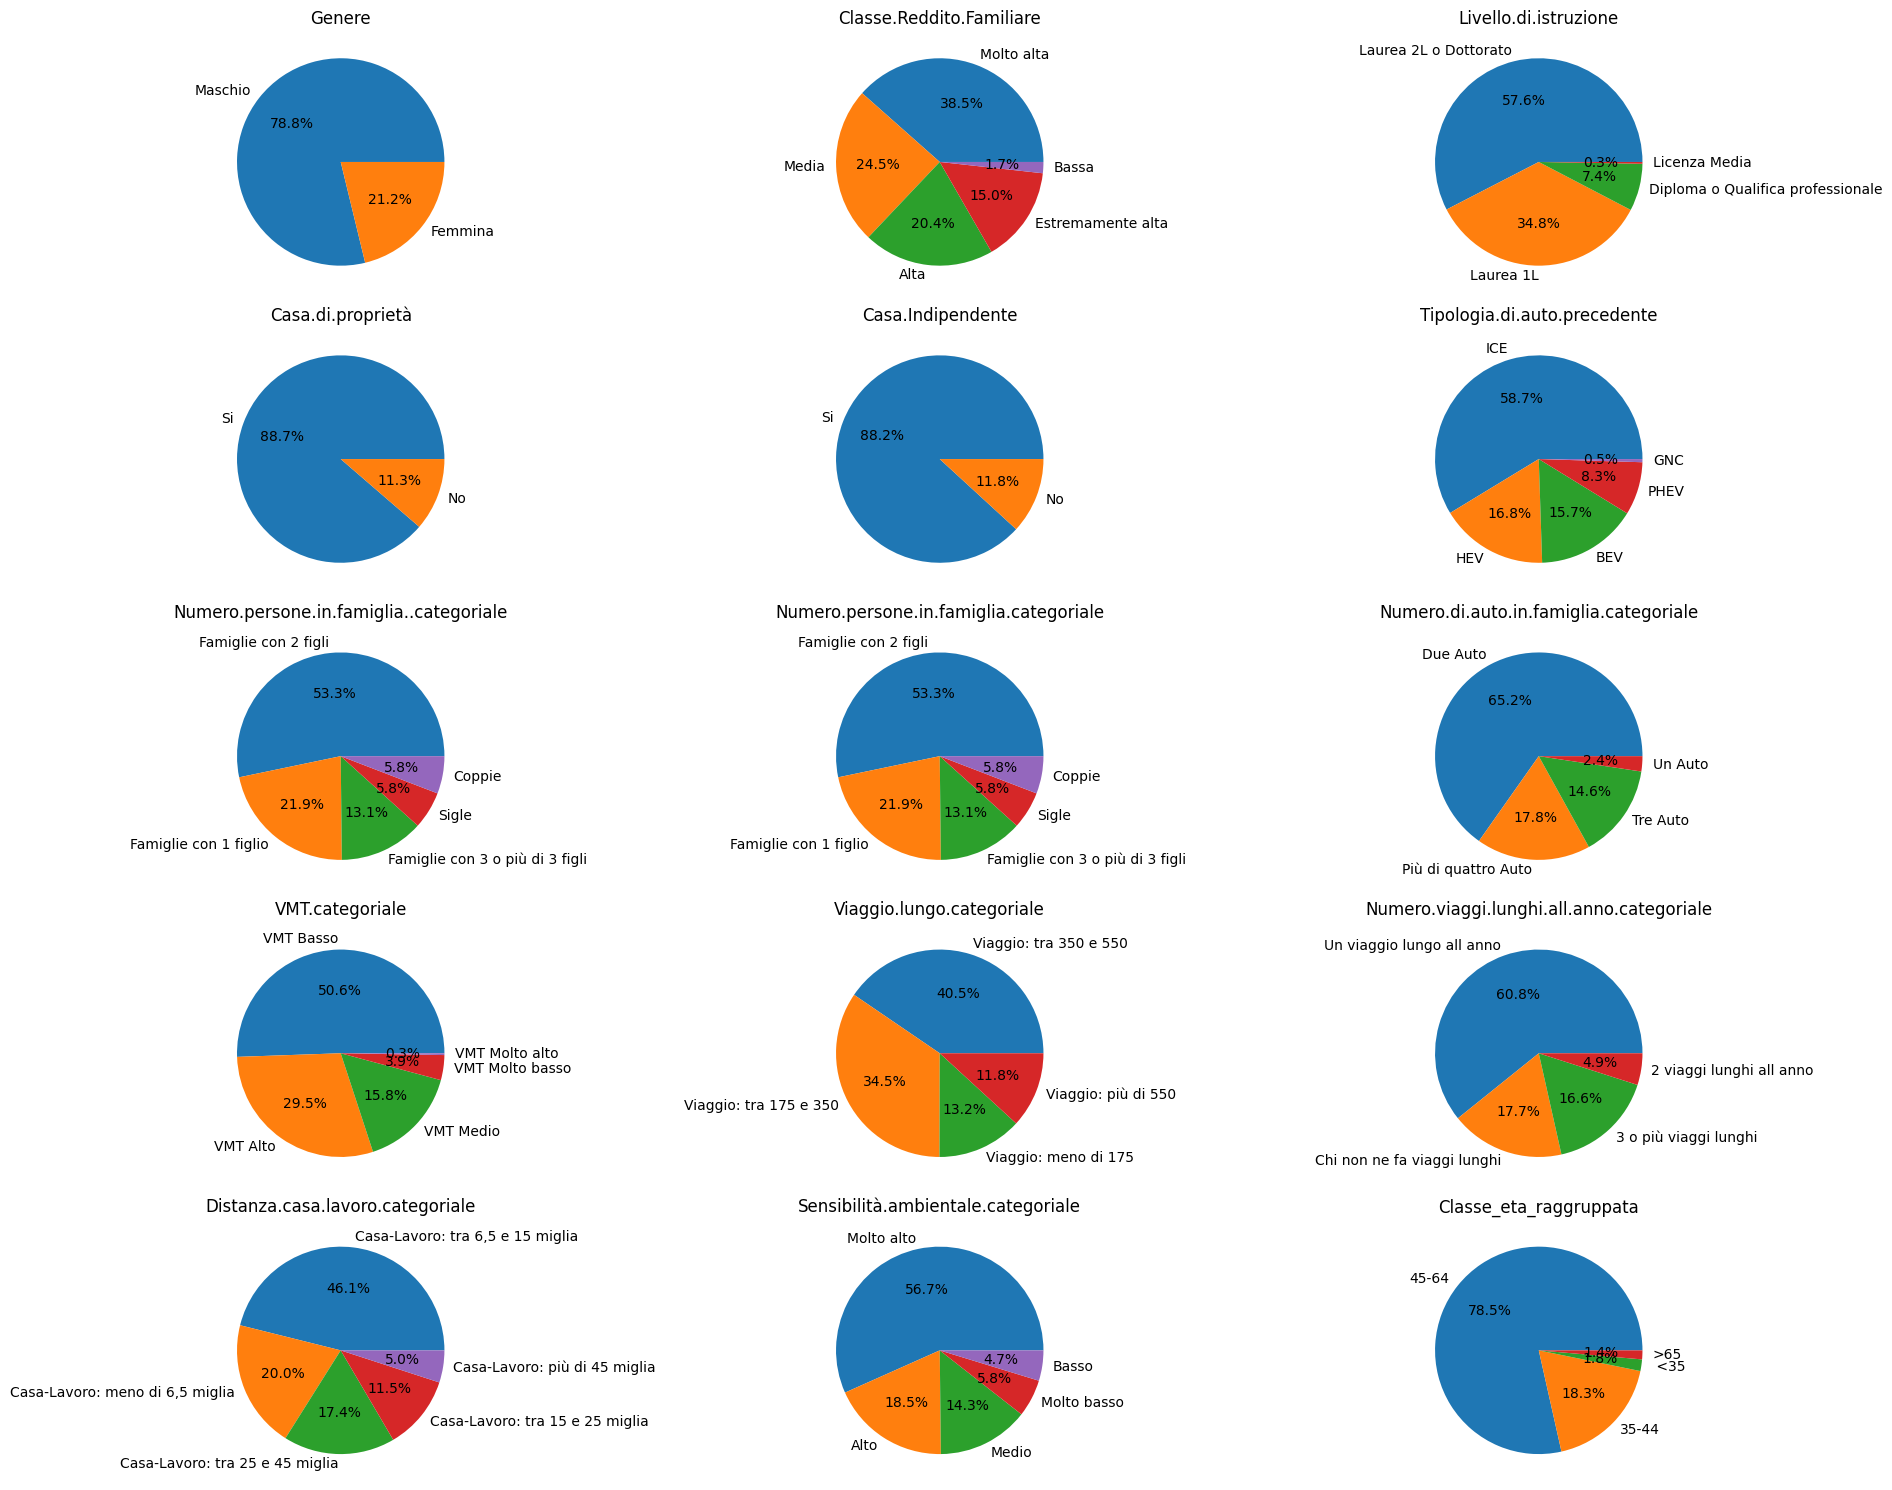

In [ ]:
num_plots = len(data_kmode_r1.columns)
rows = (num_plots + 2) // 3  # Added +2 to ensure enough subplots and rounded up
cols = 3  # Adjust if needed

fig, axes = plt.subplots(rows, cols, figsize=(20, 15))  # Adjust figsize as needed

for i, feature in enumerate(data_kmode_r1.columns):
    row = i // cols
    col = i % cols
    ax = axes[row, col]

    # Count the occurrences of each value in the feature
    value_counts = data_kmode_r1[feature].value_counts()
    ax.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
    ax.set_title(feature)

# Hide any unused subplots
for j in range(i + 1, rows * cols):
    row = j // cols
    col = j % cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

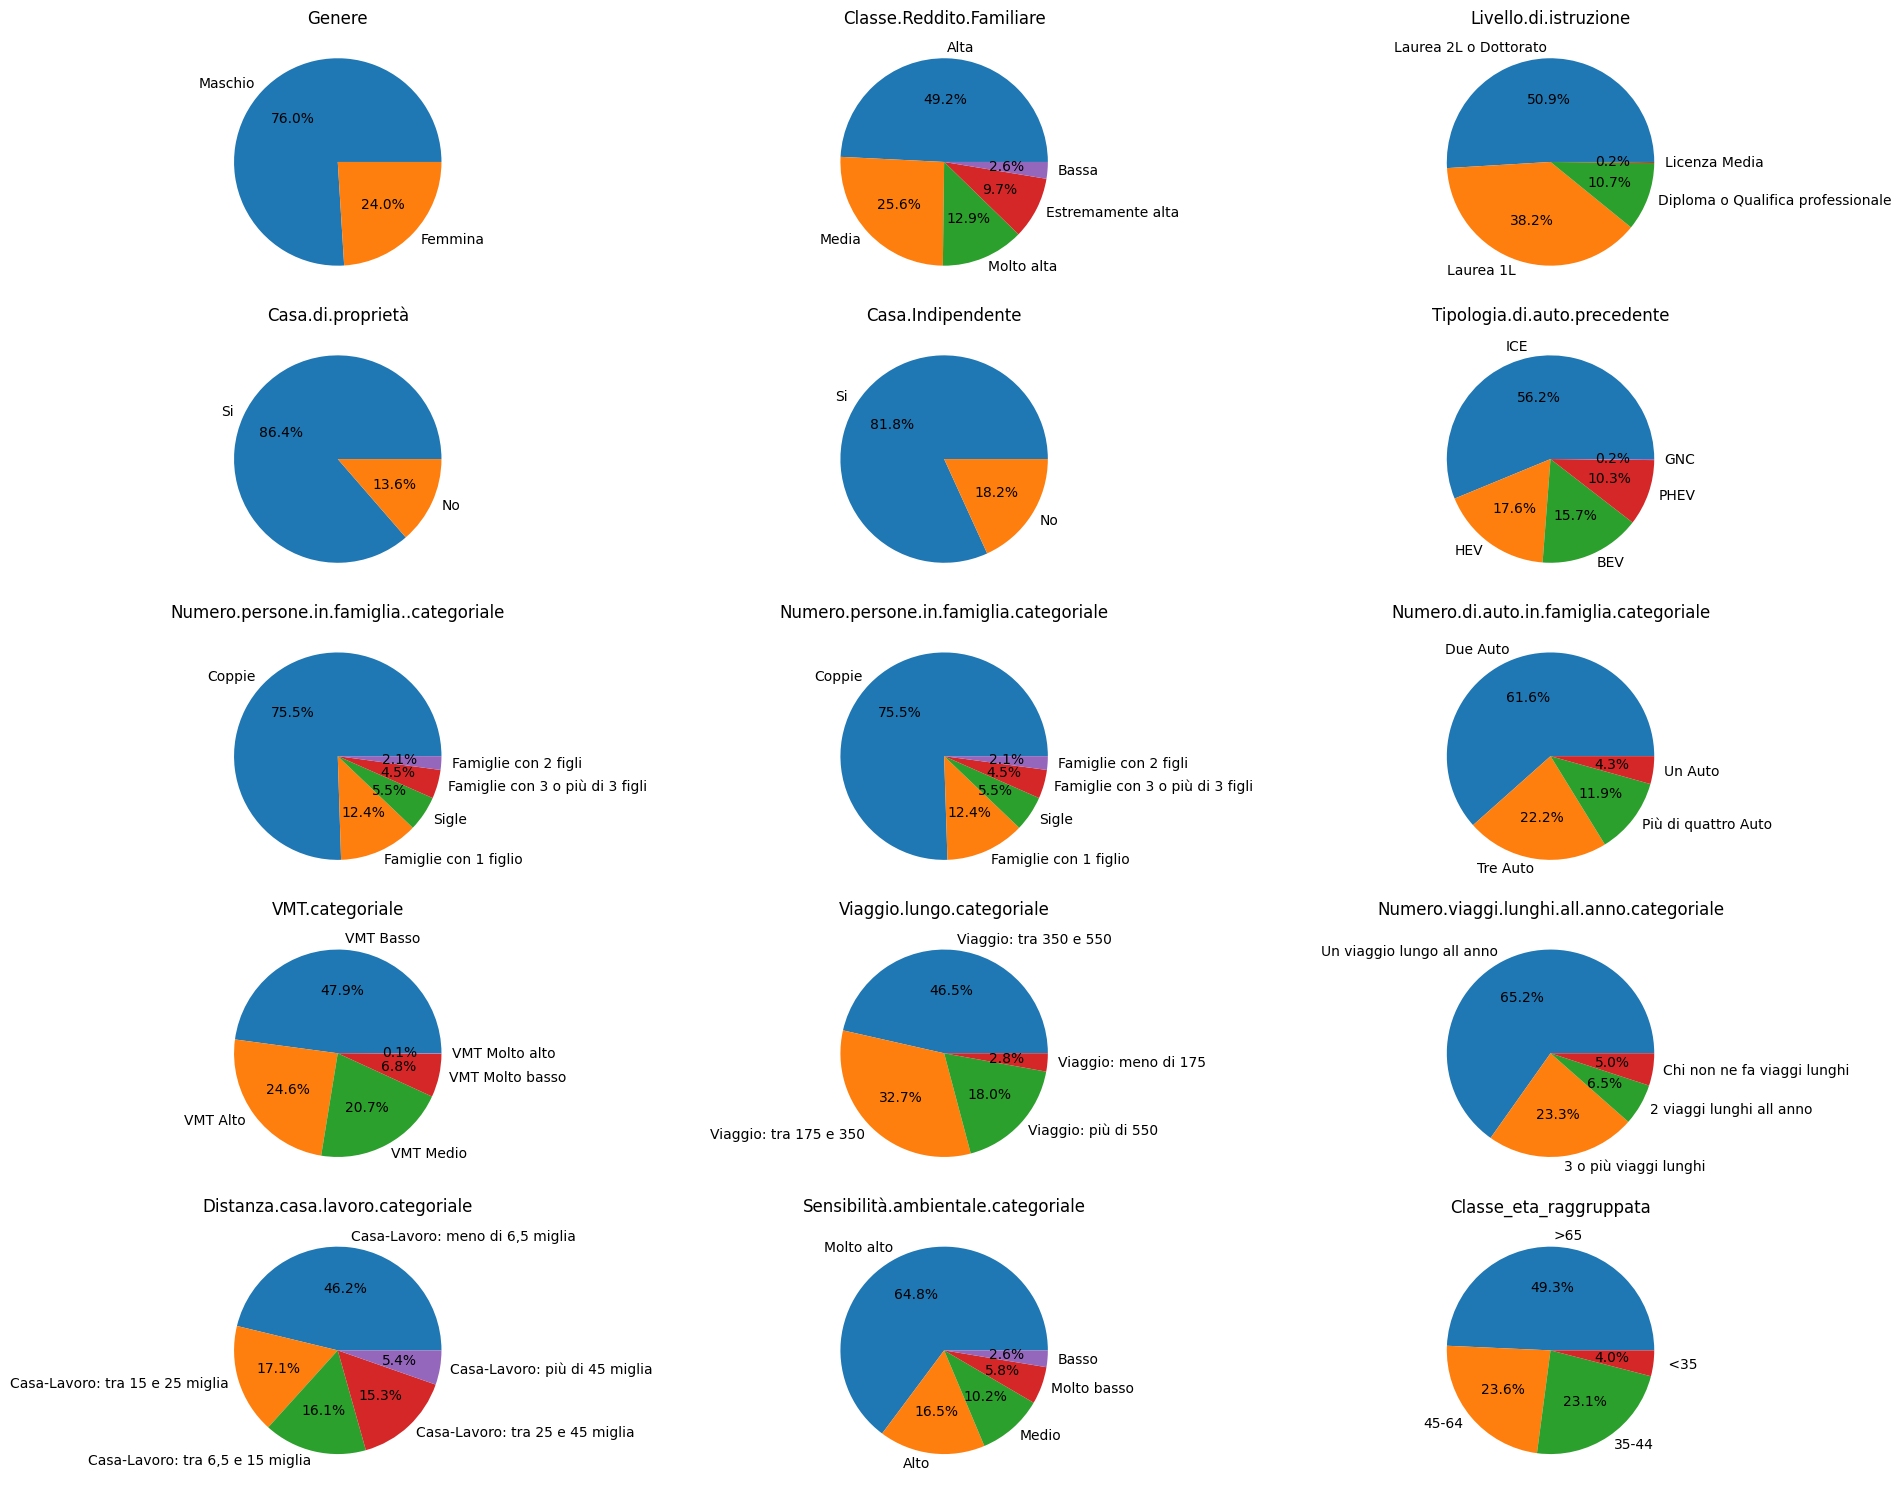

In [ ]:
num_plots = len(data_kmode_r2.columns)
rows = (num_plots + 2) // 3  # Added +2 to ensure enough subplots and rounded up
cols = 3  # Adjust if needed

fig, axes = plt.subplots(rows, cols, figsize=(20, 15))  # Adjust figsize as needed

for i, feature in enumerate(data_kmode_r2.columns):
    row = i // cols
    col = i % cols
    ax = axes[row, col]

    # Count the occurrences of each value in the feature
    value_counts = data_kmode_r2[feature].value_counts()
    ax.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
    ax.set_title(feature)

# Hide any unused subplots
for j in range(i + 1, rows * cols):
    row = j // cols
    col = j % cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

### 8.1.3. 4 Cluster

In [ ]:
data_kmode.drop(columns=['Cluster'], inplace=True)

In [ ]:
kmode = KModes(n_clusters=4, init = "random", n_init = 5, verbose=1, random_state=367889)
clusters = kmode.fit_predict(data_kmode)
data_kmode.insert(0, "Cluster", clusters, True)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2131, cost: 31327.0
Run 1, iteration: 2/100, moves: 889, cost: 31027.0
Run 1, iteration: 3/100, moves: 289, cost: 31027.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2176, cost: 30884.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2087, cost: 31521.0
Run 3, iteration: 2/100, moves: 190, cost: 31521.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1659, cost: 31504.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1858, cost: 32701.0
Run 5, iteration: 2/100, moves: 62, cost: 32701.0
Best run was number 2


In [ ]:
data_kmode

Genere Classe Reddito Familiare              Livello di istruzione  \
284    Maschio        Estremamente alta              Laurea 2L o Dottorato   
286    Maschio                    Media                          Laurea 1L   
287    Maschio               Molto alta              Laurea 2L o Dottorato   
289    Maschio                     Alta              Laurea 2L o Dottorato   
290    Maschio               Molto alta                          Laurea 1L   
...        ...                      ...                                ...   
10679  Maschio               Molto alta              Laurea 2L o Dottorato   
10680  Maschio                    Media                          Laurea 1L   
10682  Maschio                     Alta  Diploma o Qualifica professionale   
10686  Femmina               Molto alta                          Laurea 1L   
10687  Maschio                    Media              Laurea 2L o Dottorato   

      Casa di proprietà Casa Indipendente Tipologia di auto precedente  \
284                  Si                Si                          HEV   
286                  Si                Si                          ICE   
287                  Si                Si                          ICE   
289                  Si                Si                          HEV   
290                  Si                Si                          ICE   
...                 ...               ...                          ...   
10679                Si                Si                          HEV   
10680                Si                Si                          ICE   
10682                No                No                         PHEV   
10686                Si                Si                          BEV   
10687                Si                Si                          BEV   

      Numero persone in famiglia categoriale  \
284                                   Coppie   
286                                   Coppie   
287                    Famiglie con 1 figlio   
289                                   Coppie   
290          Famiglie con 3 o più di 3 figli   
...                                      ...   
10679                  Famiglie con 1 figlio   
10680                   Famiglie con 2 figli   
10682                                 Coppie   
10686                   Famiglie con 2 figli   
10687                   Famiglie con 2 figli   

      Numero di auto in famiglia categoriale VMT categoriale  \
284                                 Tre Auto       VMT Basso   
286                                 Tre Auto       VMT Medio   
287                      Più di quattro Auto       VMT Basso   
289                                 Due Auto       VMT Basso   
290                                 Due Auto        VMT Alto   
...                                      ...             ...   
10679                               Due Auto       VMT Basso   
10680                               Due Auto        VMT Alto   
10682                               Due Auto       VMT Basso   
10686                               Due Auto       VMT Medio   
10687                    Più di quattro Auto       VMT Basso   

      Viaggio lungo categoriale Numero viaggi lunghi all'anno categoriale  \
284      Viaggio: tra 175 e 350                 Un viaggio lungo all anno   
286         Viaggio: più di 550                 Un viaggio lungo all anno   
287         Viaggio: più di 550                 Un viaggio lungo all anno   
289        Viaggio: meno di 175               Chi non ne fa viaggi lunghi   
290      Viaggio: tra 350 e 550                 Un viaggio lungo all anno   
...                         ...                                       ...   
10679    Viaggio: tra 350 e 550                 Un viaggio lungo all anno   
10680    Viaggio: tra 175 e 350                 Un viaggio lungo all anno   
10682      Viaggio: meno di 175               Chi non ne fa viaggi lunghi   
10686    Viaggio: tra 175 e 350                  2 viaggi lunghi a

In [ ]:
print("\nDistribuzione dei cluster:\n")
print(data_kmode['Cluster'].value_counts())


Distribuzione dei cluster:

Cluster
0    1772
1    1654
3    1374
2     996
Name: count, dtype: int64


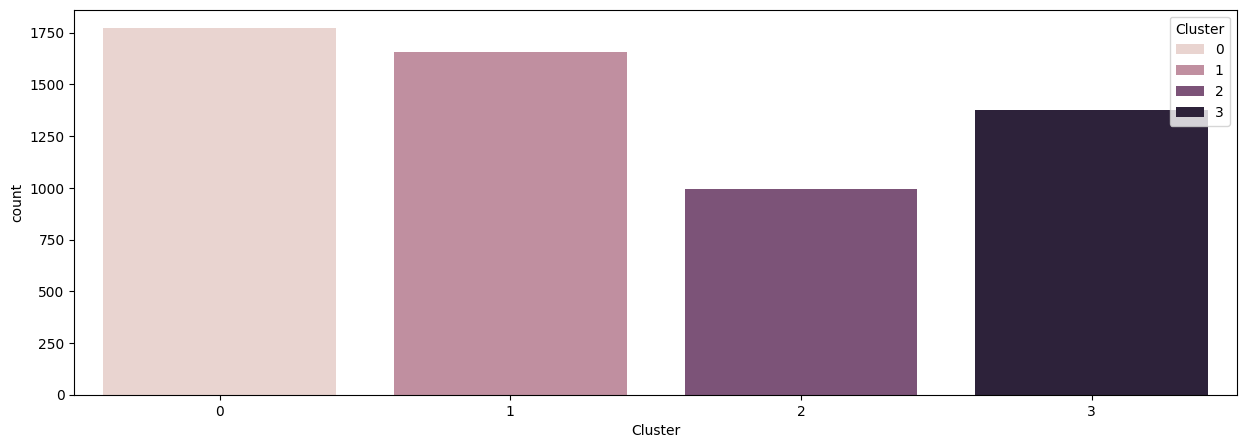

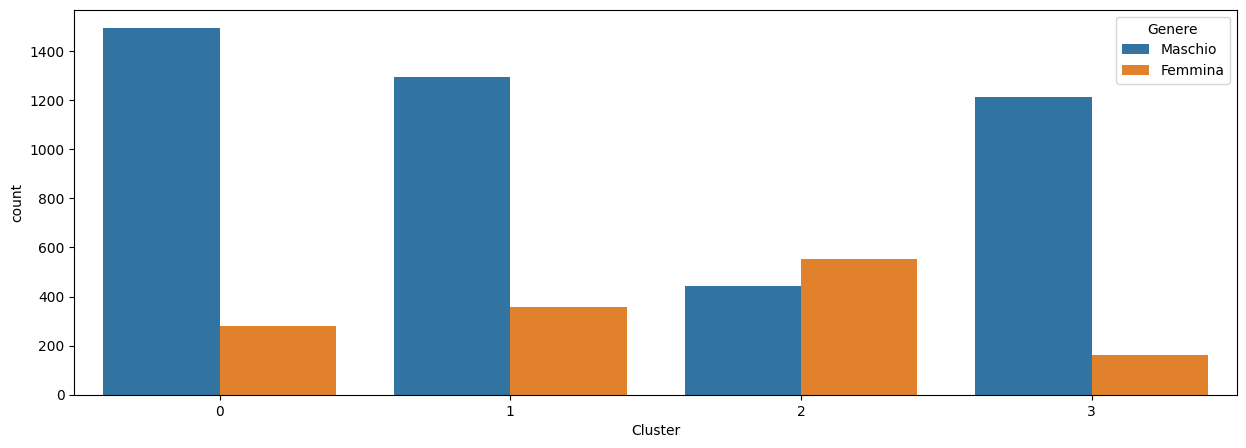

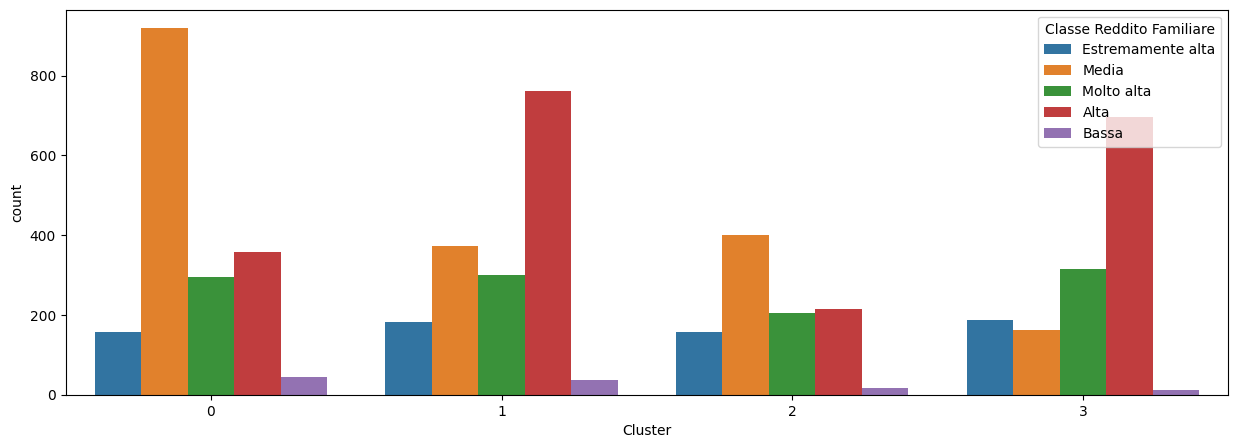

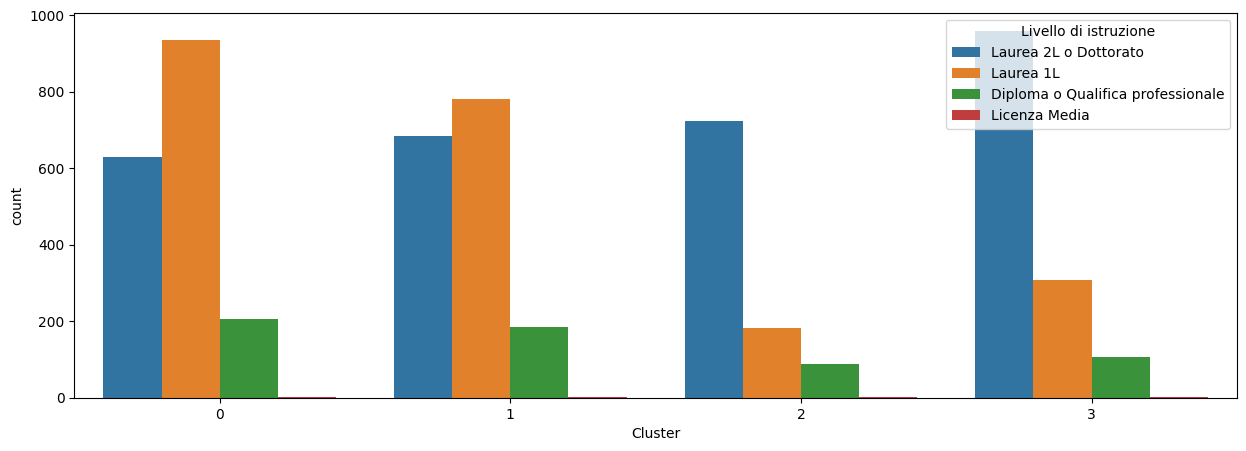

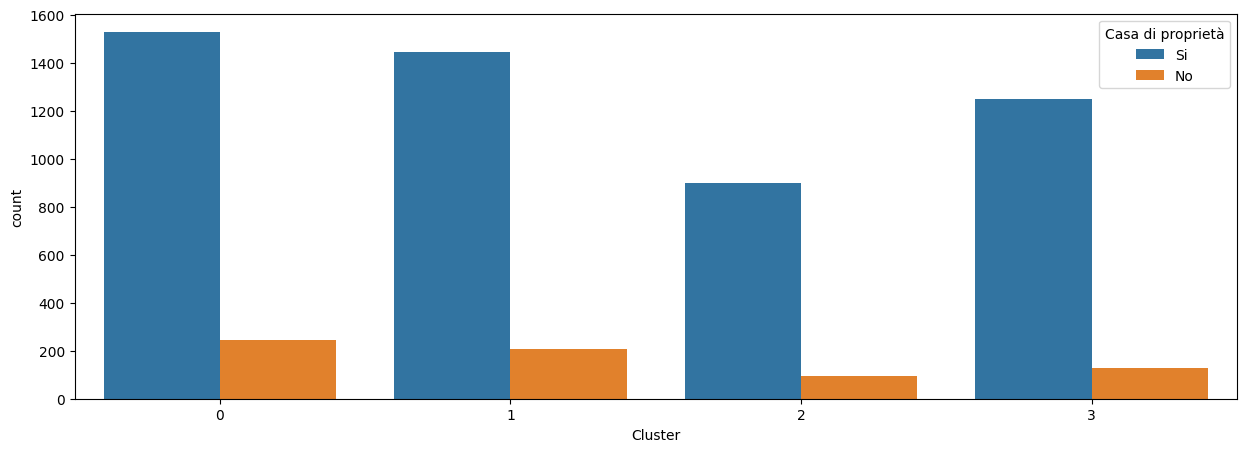

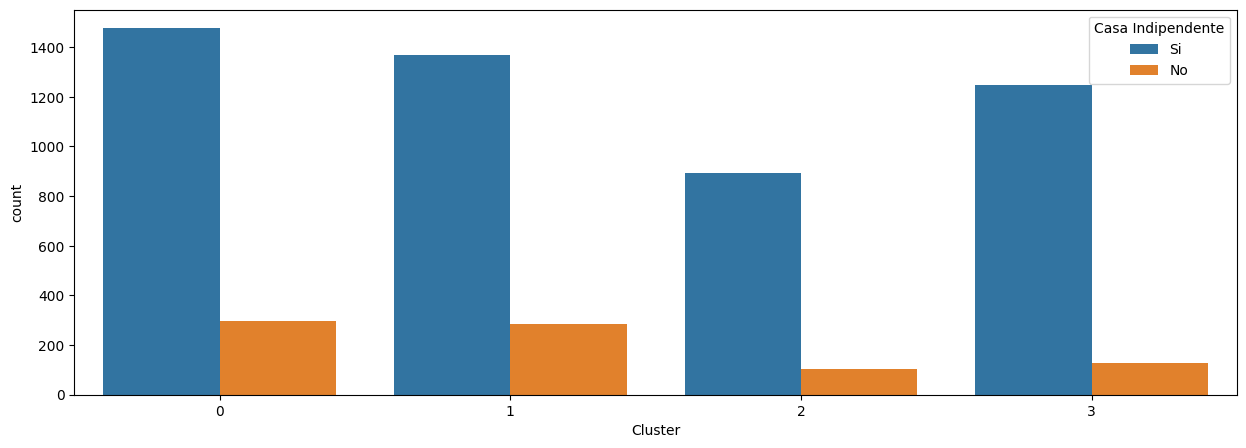

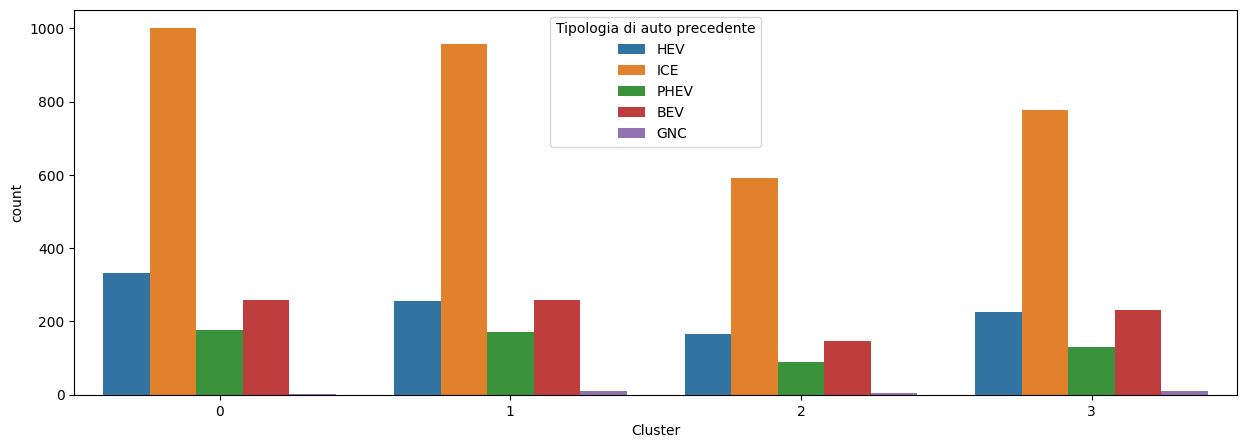

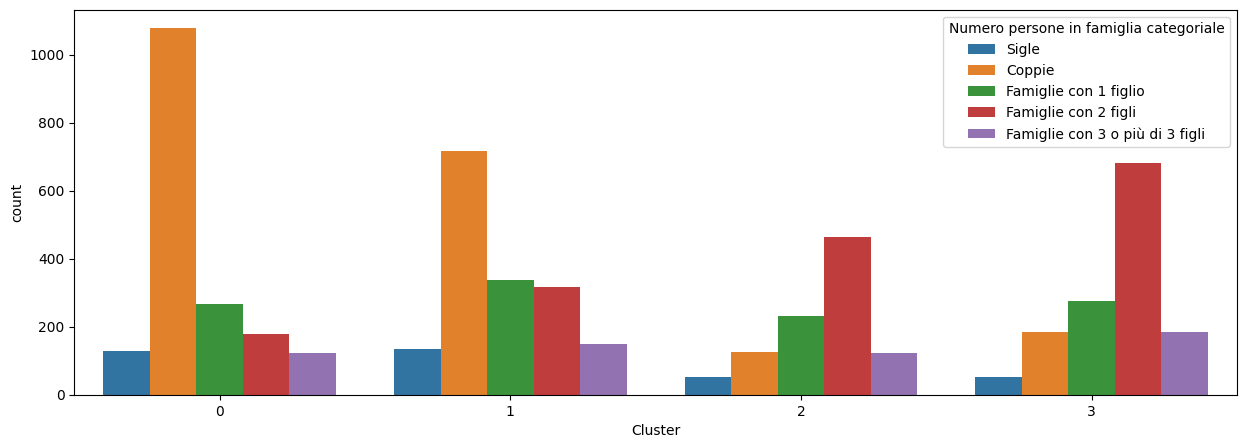

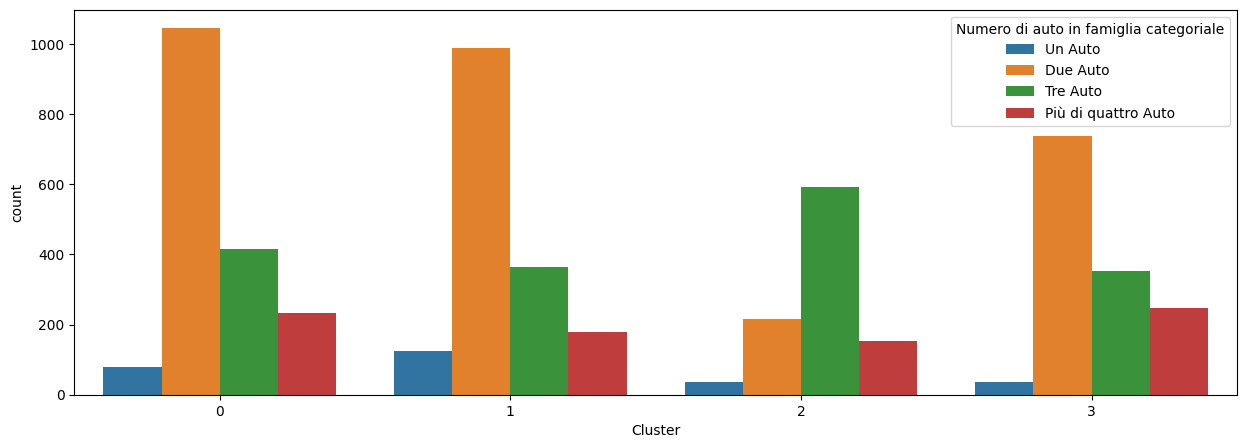

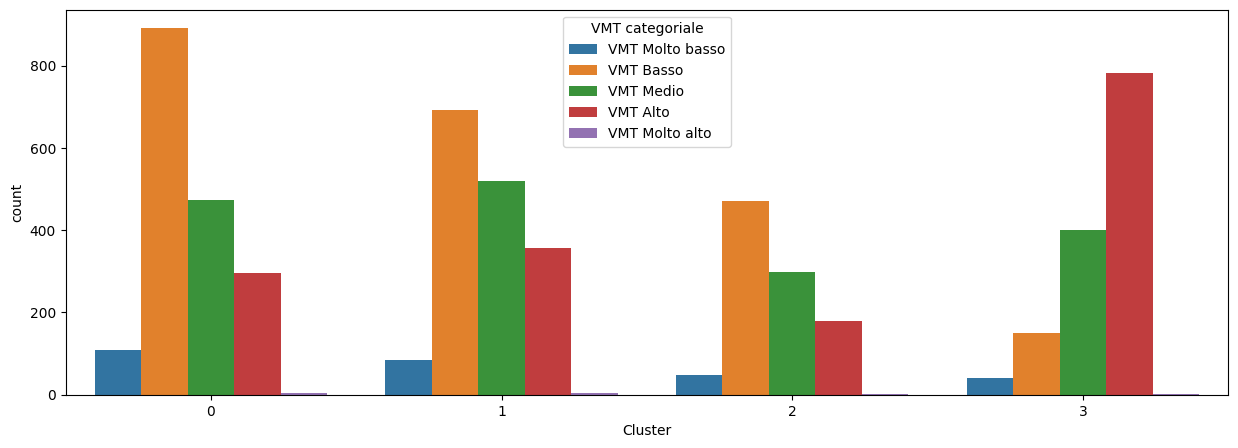

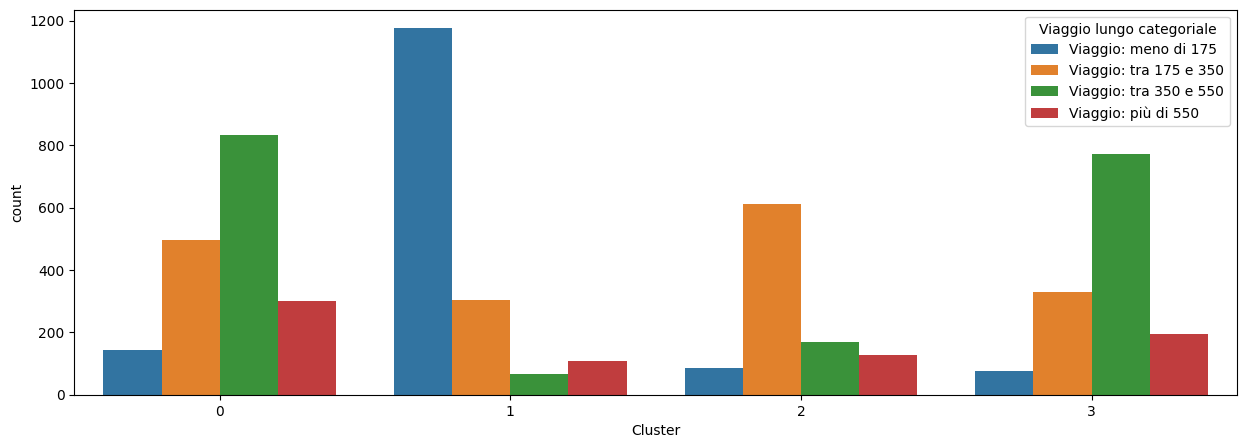

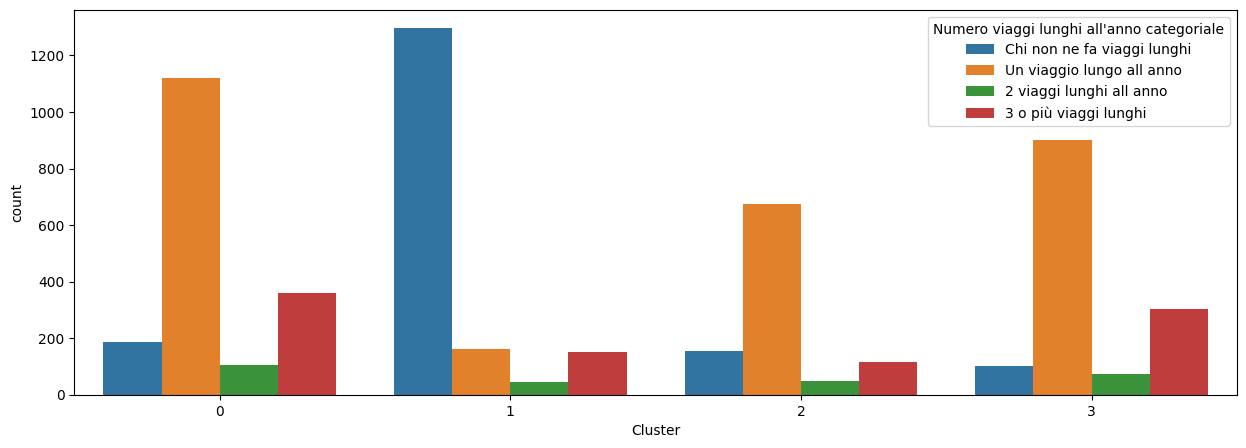

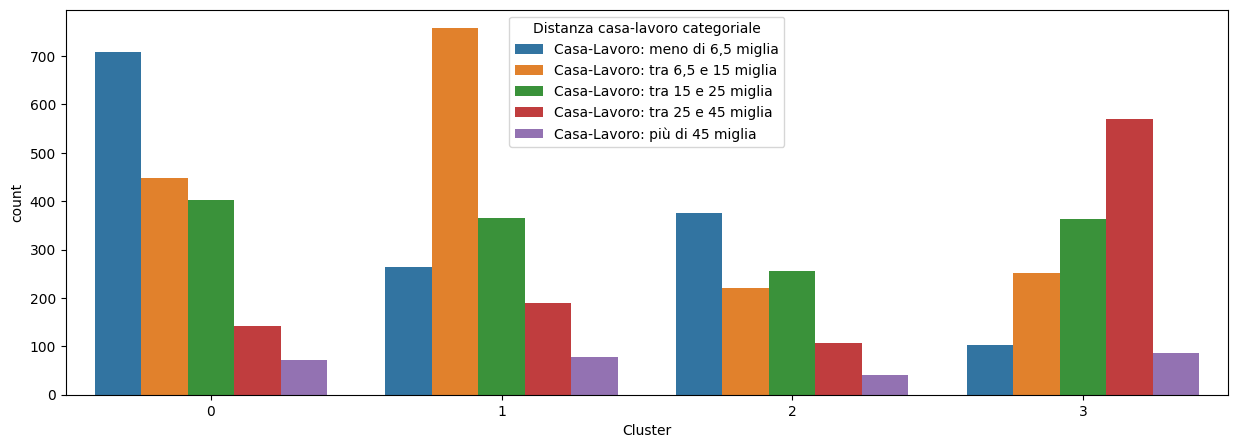

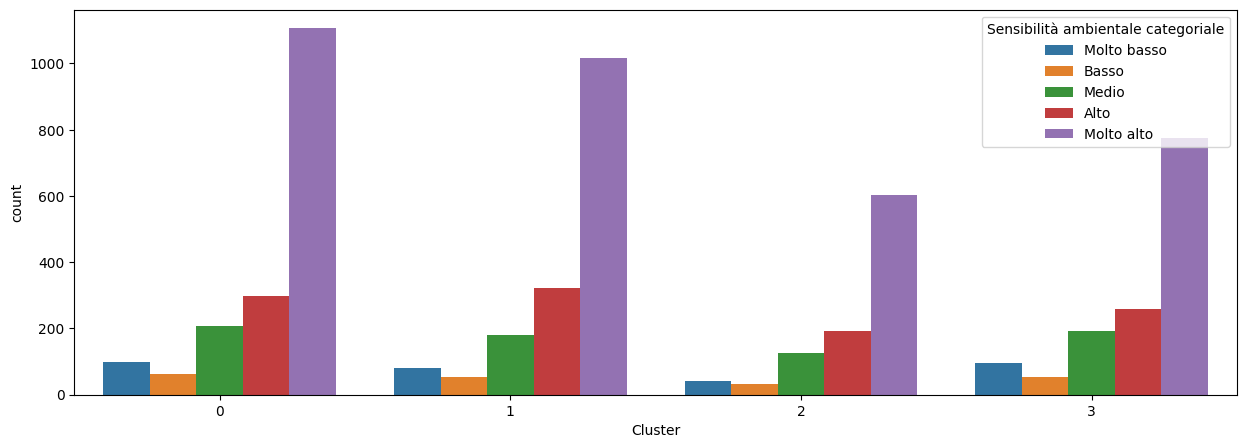

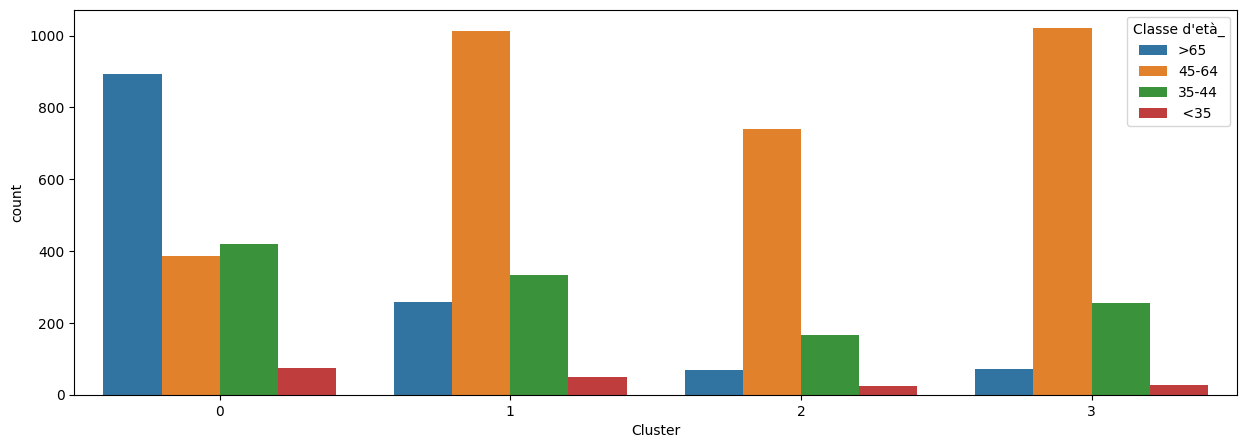

In [ ]:
all_features = data_kmode.columns.tolist()
#cluster_0_data = data_BEV[data_BEV['Cluster'] == 2]
for col in all_features:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='Cluster',hue=col, data = data_kmode)
    plt.show()

In [ ]:
data_kmode1= data_kmode[data_kmode['Cluster'] == 0]
data_kmode1.drop(columns=['Cluster'], inplace=True)

data_kmode2= data_kmode[data_kmode['Cluster'] == 1]
data_kmode2.drop(columns=['Cluster'], inplace=True)

data_kmode3= data_kmode[data_kmode['Cluster'] == 2]
data_kmode3.drop(columns=['Cluster'], inplace=True)

data_kmode4= data_kmode[data_kmode['Cluster'] == 3]
data_kmode4.drop(columns=['Cluster'], inplace=True)

<ipython-input-70-616f40d6d01e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kmode1.drop(columns=['Cluster'], inplace=True)
<ipython-input-70-616f40d6d01e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kmode2.drop(columns=['Cluster'], inplace=True)
<ipython-input-70-616f40d6d01e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kmode3.drop(columns=['Cluster'], inplace=True)
<ipython-input-70-616f40d6d01e>:11: Sett

### 8.1.4. Confronto

In [ ]:
print("R:")
print(", ".join([f'"{col}"' for col in data_kmode_r1.columns]))
print()
print("Phyton:")
print(", ".join([f'"{col}"' for col in data_kmode1.columns]))

R:
"Genere", "Classe.Reddito.Familiare", "Livello.di.istruzione", "Casa.di.proprietà", "Casa.Indipendente", "Tipologia.di.auto.precedente", "Numero.persone.in.famiglia..categoriale", "Numero.persone.in.famiglia.categoriale", "Numero.di.auto.in.famiglia.categoriale", "VMT.categoriale", "Viaggio.lungo.categoriale", "Numero.viaggi.lunghi.all.anno.categoriale", "Distanza.casa.lavoro.categoriale", "Sensibilità.ambientale.categoriale", "Classe_eta_raggruppata"

Phyton:
"Genere", "Classe Reddito Familiare", "Livello di istruzione", "Casa di proprietà", "Casa Indipendente", "Tipologia di auto precedente", "Numero persone in famiglia categoriale", "Numero di auto in famiglia categoriale", "VMT categoriale", "Viaggio lungo categoriale", "Numero viaggi lunghi all'anno categoriale", "Distanza casa-lavoro categoriale", "Sensibilità ambientale categoriale", "Classe d'età_"


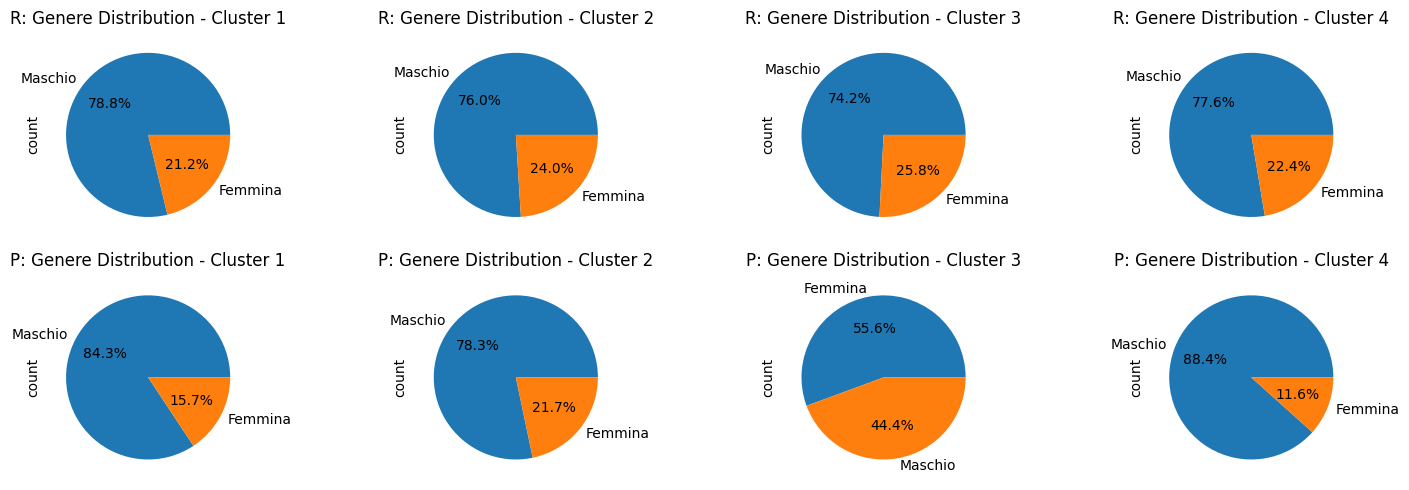

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))
data_kmode_r1['Genere'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 0], title='R: Genere Distribution - Cluster 1')
data_kmode_r2['Genere'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 1], title='R: Genere Distribution - Cluster 2') # Changed axes[1] to axes[0, 1]
data_kmode_r3['Genere'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 2], title='R: Genere Distribution - Cluster 3') # Changed axes[2] to axes[0, 2]
data_kmode_r4['Genere'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 3], title='R: Genere Distribution - Cluster 4') # Changed axes[2] to axes[0, 3]

data_kmode1['Genere'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 0], title='P: Genere Distribution - Cluster 1') # Changed axes[0] to axes[1, 0]
data_kmode2['Genere'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 1], title='P: Genere Distribution - Cluster 2') # Changed axes[1] to axes[1, 1]
data_kmode3['Genere'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 2], title='P: Genere Distribution - Cluster 3') # Changed axes[2] to axes[1, 2]
data_kmode4['Genere'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 3], title='P: Genere Distribution - Cluster 4') # Changed axes[2] to axes[1, 3]
plt.tight_layout()
plt.show()

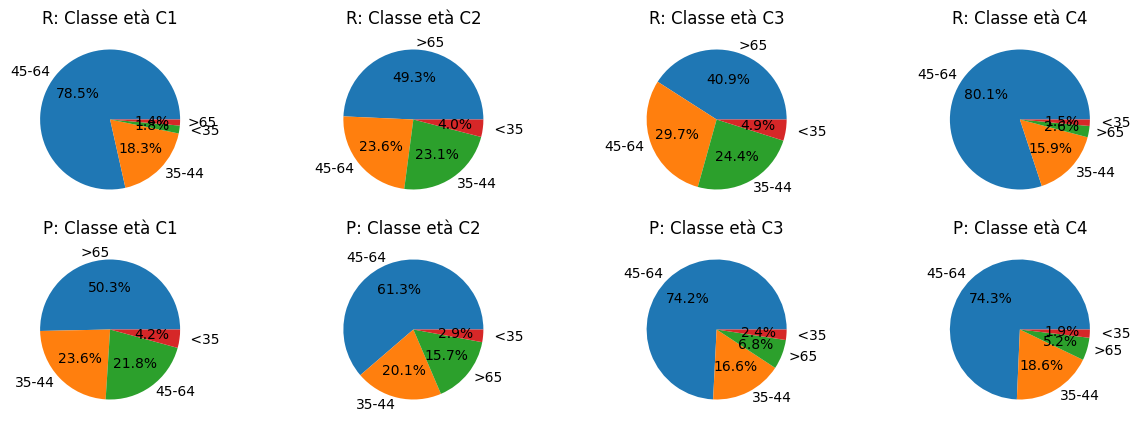

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))

data_kmode_r1['Classe_eta_raggruppata'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 0], title='R: Classe età C1').set_ylabel('')
data_kmode_r2['Classe_eta_raggruppata'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 1], title='R: Classe età C2').set_ylabel('')
data_kmode_r3['Classe_eta_raggruppata'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 2], title='R: Classe età C3').set_ylabel('')
data_kmode_r4['Classe_eta_raggruppata'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 3], title='R: Classe età C4').set_ylabel('')

data_kmode1["Classe d'età_"].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 0], title='P: Classe età C1').set_ylabel('')
data_kmode2["Classe d'età_"].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 1], title='P: Classe età C2').set_ylabel('')
data_kmode3["Classe d'età_"].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 2], title='P: Classe età C3').set_ylabel('')
data_kmode4["Classe d'età_"].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 3], title='P: Classe età C4').set_ylabel('')

plt.show()

plt.tight_layout()
plt.show()

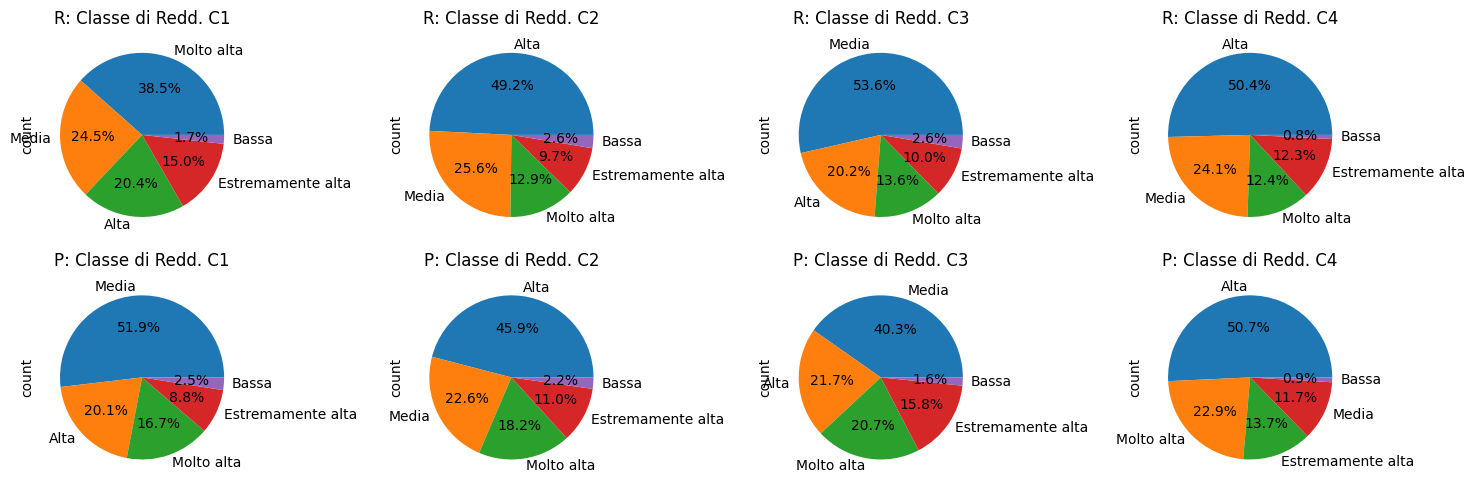

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))
data_kmode_r1['Classe.Reddito.Familiare'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 0], title='R: Classe di Redd. C1')
data_kmode_r2['Classe.Reddito.Familiare'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 1], title='R: Classe di Redd. C2')
data_kmode_r3['Classe.Reddito.Familiare'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 2], title='R: Classe di Redd. C3')
data_kmode_r4['Classe.Reddito.Familiare'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 3], title='R: Classe di Redd. C4')

data_kmode1['Classe Reddito Familiare'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 0], title='P: Classe di Redd. C1')
data_kmode2['Classe Reddito Familiare'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 1], title='P: Classe di Redd. C2')
data_kmode3['Classe Reddito Familiare'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 2], title='P: Classe di Redd. C3')
data_kmode4['Classe Reddito Familiare'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 3], title='P: Classe di Redd. C4')
plt.tight_layout()
plt.show()

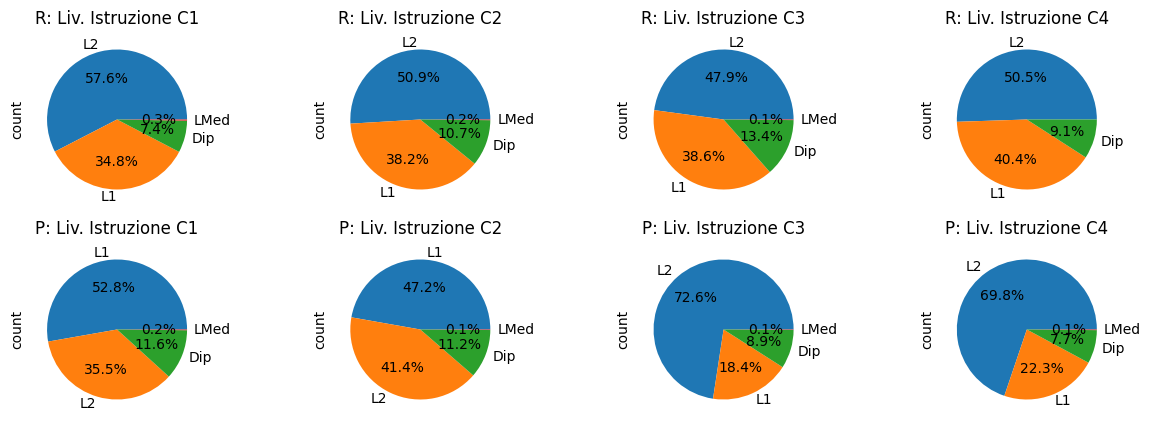

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))


label_mapping = {
    'Laurea 2L o Dottorato': 'L2',
    'Laurea 1L': 'L1',
    'Licenza Media': 'LMed',
    'Diploma o Qualifica professionale': 'Dip'
}

def plot_pie_with_short_labels_R(data, ax, title):
    data_pie = data['Livello.di.istruzione'].value_counts().rename(index=label_mapping)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)

plot_pie_with_short_labels_R(data_kmode_r1, axes[0, 0], 'R: Liv. Istruzione C1')
plot_pie_with_short_labels_R(data_kmode_r2, axes[0, 1], 'R: Liv. Istruzione C2')
plot_pie_with_short_labels_R(data_kmode_r3, axes[0, 2], 'R: Liv. Istruzione C3')
plot_pie_with_short_labels_R(data_kmode_r4, axes[0, 3], 'R: Liv. Istruzione C4')


def plot_pie_with_short_labels_P(data, ax, title):
    data_pie = data['Livello di istruzione'].value_counts().rename(index=label_mapping)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)

plot_pie_with_short_labels_P(data_kmode1, axes[1, 0], 'P: Liv. Istruzione C1')
plot_pie_with_short_labels_P(data_kmode2, axes[1, 1], 'P: Liv. Istruzione C2')
plot_pie_with_short_labels_P(data_kmode3, axes[1, 2], 'P: Liv. Istruzione C3')
plot_pie_with_short_labels_P(data_kmode4, axes[1, 3], 'P: Liv. Istruzione C4')

plt.show()

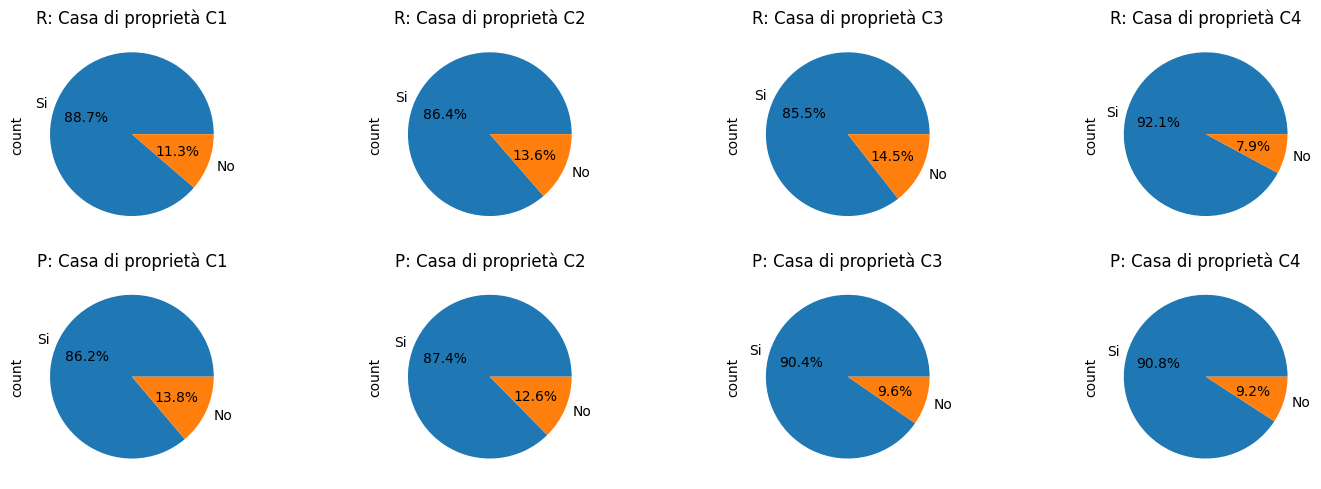

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))
data_kmode_r1['Casa.di.proprietà'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 0], title='R: Casa di proprietà C1')
data_kmode_r2['Casa.di.proprietà'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 1], title='R: Casa di proprietà C2')
data_kmode_r3['Casa.di.proprietà'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 2], title='R: Casa di proprietà C3')
data_kmode_r4['Casa.di.proprietà'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 3], title='R: Casa di proprietà C4')

data_kmode1['Casa di proprietà'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 0], title='P: Casa di proprietà C1')
data_kmode2['Casa di proprietà'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 1], title='P: Casa di proprietà C2')
data_kmode3['Casa di proprietà'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 2], title='P: Casa di proprietà C3')
data_kmode4['Casa di proprietà'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 3], title='P: Casa di proprietà C4')
plt.tight_layout()
plt.show()

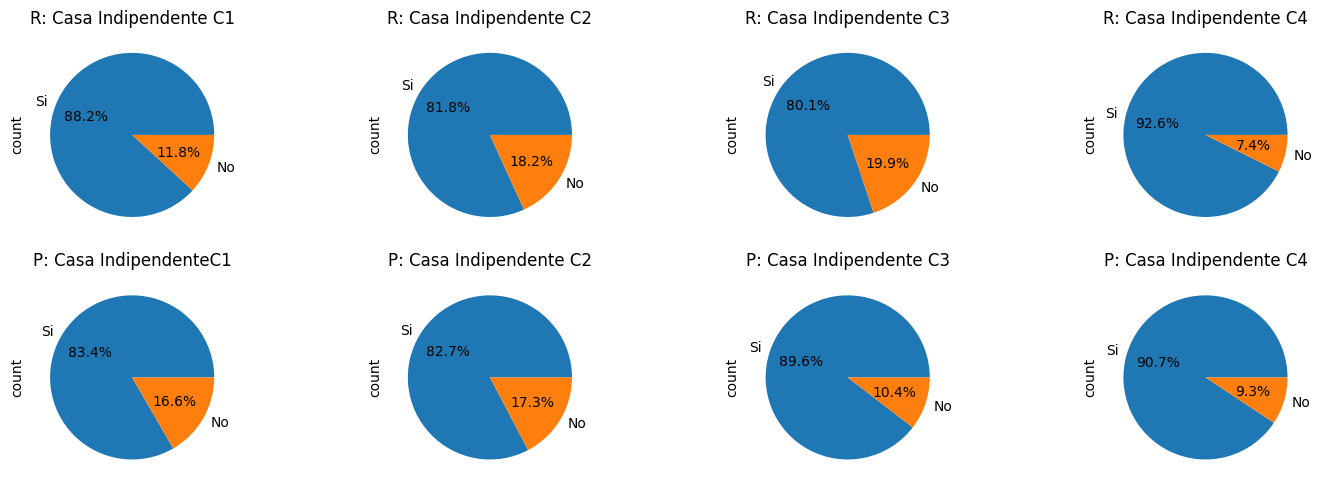

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))
data_kmode_r1['Casa.Indipendente'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 0], title='R: Casa Indipendente C1')
data_kmode_r2['Casa.Indipendente'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 1], title='R: Casa Indipendente C2')
data_kmode_r3['Casa.Indipendente'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 2], title='R: Casa Indipendente C3')
data_kmode_r4['Casa.Indipendente'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 3], title='R: Casa Indipendente C4')

data_kmode1['Casa Indipendente'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 0], title='P: Casa IndipendenteC1')
data_kmode2['Casa Indipendente'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 1], title='P: Casa Indipendente C2')
data_kmode3['Casa Indipendente'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 2], title='P: Casa Indipendente C3')
data_kmode4['Casa Indipendente'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 3], title='P: Casa Indipendente C4')
plt.tight_layout()
plt.show()

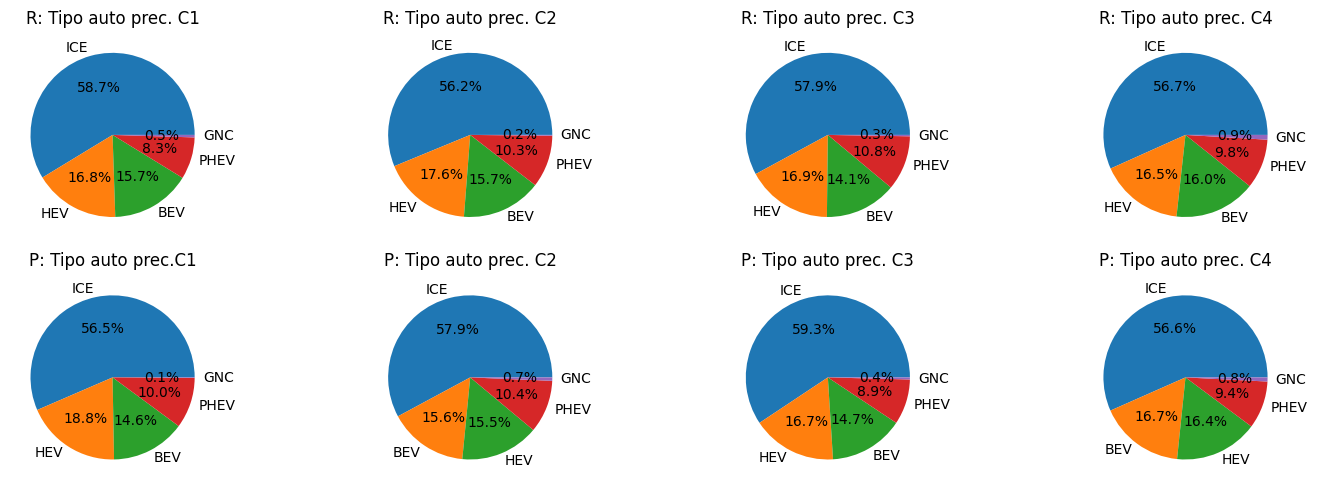

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))
data_kmode_r1['Tipologia.di.auto.precedente'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 0], title='R: Tipo auto prec. C1').set_ylabel('')
data_kmode_r2['Tipologia.di.auto.precedente'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 1], title='R: Tipo auto prec. C2').set_ylabel('')
data_kmode_r3['Tipologia.di.auto.precedente'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 2], title='R: Tipo auto prec. C3').set_ylabel('')
data_kmode_r4['Tipologia.di.auto.precedente'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 3], title='R: Tipo auto prec. C4').set_ylabel('')

data_kmode1['Tipologia di auto precedente'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 0], title='P: Tipo auto prec.C1').set_ylabel('')
data_kmode2['Tipologia di auto precedente'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 1], title='P: Tipo auto prec. C2').set_ylabel('')
data_kmode3['Tipologia di auto precedente'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 2], title='P: Tipo auto prec. C3').set_ylabel('')
data_kmode4['Tipologia di auto precedente'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 3], title='P: Tipo auto prec. C4').set_ylabel('')
plt.tight_layout()
plt.show()

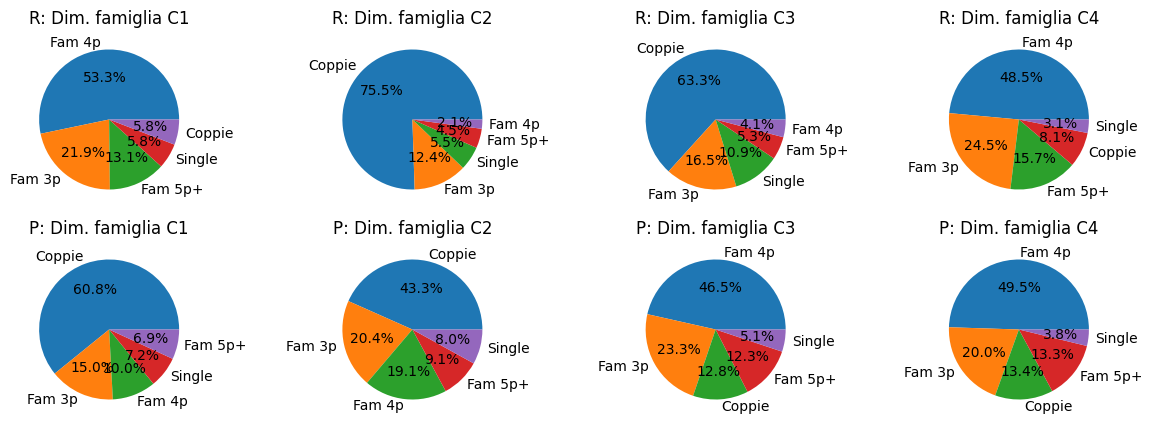

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))

label_mapping2 = {
    'Sigle': 'Single',
    'Coppie': 'Coppie',
    'Famiglie con 1 figlio': 'Fam 3p',
    'Famiglie con 2 figli': 'Fam 4p',
    'Famiglie con 3 o più di 3 figli': 'Fam 5p+',
}

def plot_pie_with_short_labels_R2(data, ax, title):
    data_pie = data['Numero.persone.in.famiglia..categoriale'].value_counts().rename(index=label_mapping2)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_R2(data_kmode_r1, axes[0, 0], 'R: Dim. famiglia C1')
plot_pie_with_short_labels_R2(data_kmode_r2, axes[0, 1], 'R: Dim. famiglia C2')
plot_pie_with_short_labels_R2(data_kmode_r3, axes[0, 2], 'R: Dim. famiglia C3')
plot_pie_with_short_labels_R2(data_kmode_r4, axes[0, 3], 'R: Dim. famiglia C4')


def plot_pie_with_short_labels_P2(data, ax, title):
    data_pie = data['Numero persone in famiglia categoriale'].value_counts().rename(index=label_mapping2)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_P2(data_kmode1, axes[1, 0], 'P: Dim. famiglia C1')
plot_pie_with_short_labels_P2(data_kmode2, axes[1, 1], 'P: Dim. famiglia C2')
plot_pie_with_short_labels_P2(data_kmode3, axes[1, 2], 'P: Dim. famiglia C3')
plot_pie_with_short_labels_P2(data_kmode4, axes[1, 3], 'P: Dim. famiglia C4')

plt.show()

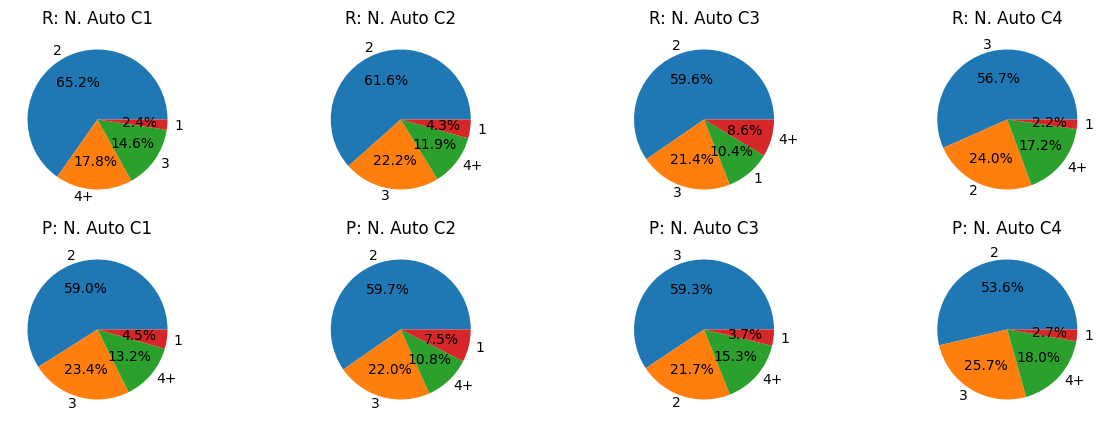

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))

label_mapping3 = {
    'Un Auto': '1',
    'Due Auto': '2',
    'Tre Auto': '3',
    'Più di quattro Auto': '4+'
}

def plot_pie_with_short_labels_R2(data, ax, title):
    data_pie = data['Numero.di.auto.in.famiglia.categoriale'].value_counts().rename(index=label_mapping3)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_R2(data_kmode_r1, axes[0, 0], 'R: N. Auto C1')
plot_pie_with_short_labels_R2(data_kmode_r2, axes[0, 1], 'R: N. Auto C2')
plot_pie_with_short_labels_R2(data_kmode_r3, axes[0, 2], 'R: N. Auto C3')
plot_pie_with_short_labels_R2(data_kmode_r4, axes[0, 3], 'R: N. Auto C4')


def plot_pie_with_short_labels_P2(data, ax, title):
    data_pie = data['Numero di auto in famiglia categoriale'].value_counts().rename(index=label_mapping3)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_P2(data_kmode1, axes[1, 0], 'P: N. Auto C1')
plot_pie_with_short_labels_P2(data_kmode2, axes[1, 1], 'P: N. Auto C2')
plot_pie_with_short_labels_P2(data_kmode3, axes[1, 2], 'P: N. Auto C3')
plot_pie_with_short_labels_P2(data_kmode4, axes[1, 3], 'P: N. Auto C4')

plt.show()

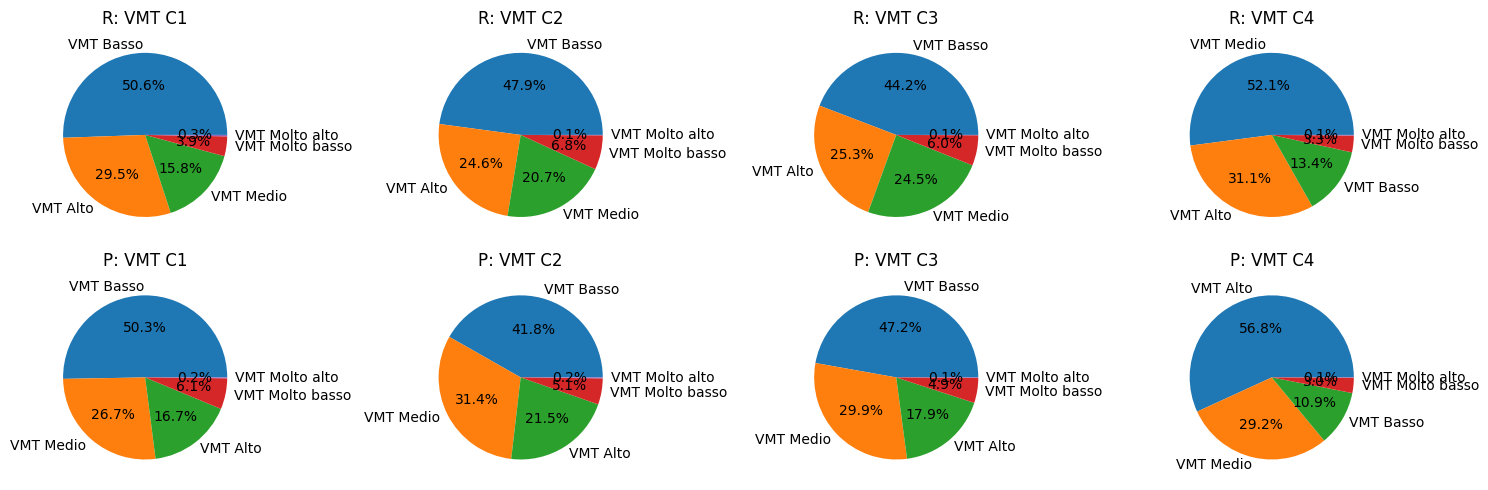

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))
data_kmode_r1['VMT.categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 0], title='R: VMT C1').set_ylabel('')
data_kmode_r2['VMT.categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 1], title='R: VMT C2').set_ylabel('')
data_kmode_r3['VMT.categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 2], title='R: VMT C3').set_ylabel('')
data_kmode_r4['VMT.categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 3], title='R: VMT C4').set_ylabel('')

data_kmode1['VMT categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 0], title='P: VMT C1').set_ylabel('')
data_kmode2['VMT categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 1], title='P: VMT C2').set_ylabel('')
data_kmode3['VMT categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 2], title='P: VMT C3').set_ylabel('')
data_kmode4['VMT categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 3], title='P: VMT C4').set_ylabel('')
plt.tight_layout()
plt.show()

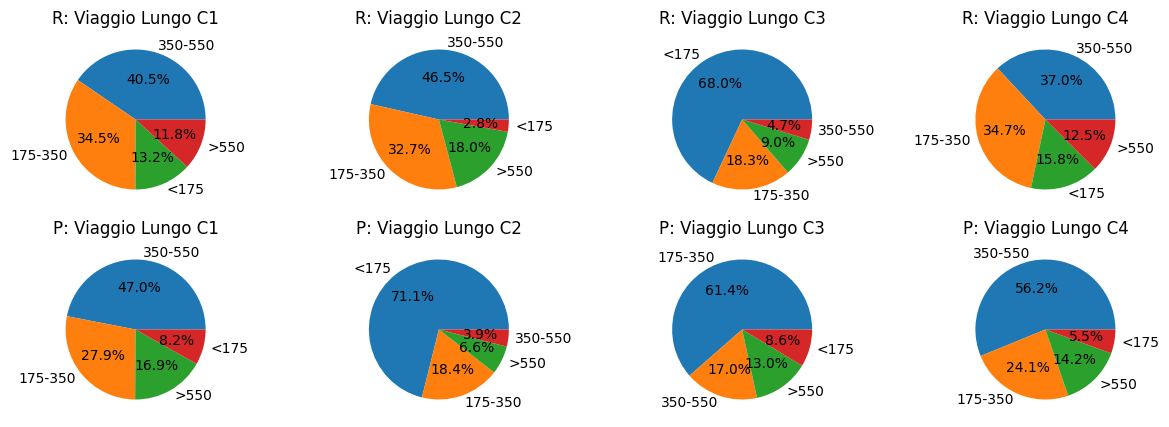

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))

label_mapping4 = {
    'Viaggio: meno di 175': '<175',
    'Viaggio: tra 175 e 350': '175-350',
    'Viaggio: tra 350 e 550': '350-550',
    'Viaggio: più di 550': '>550'
}

def plot_pie_with_short_labels_R2(data, ax, title):
    data_pie = data['Viaggio.lungo.categoriale'].value_counts().rename(index=label_mapping4)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_R2(data_kmode_r1, axes[0, 0], 'R: Viaggio Lungo C1')
plot_pie_with_short_labels_R2(data_kmode_r2, axes[0, 1], 'R: Viaggio Lungo C2')
plot_pie_with_short_labels_R2(data_kmode_r3, axes[0, 2], 'R: Viaggio Lungo C3')
plot_pie_with_short_labels_R2(data_kmode_r4, axes[0, 3], 'R: Viaggio Lungo C4')


def plot_pie_with_short_labels_P2(data, ax, title):
    data_pie = data['Viaggio lungo categoriale'].value_counts().rename(index=label_mapping4)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_P2(data_kmode1, axes[1, 0], 'P: Viaggio Lungo C1')
plot_pie_with_short_labels_P2(data_kmode2, axes[1, 1], 'P: Viaggio Lungo C2')
plot_pie_with_short_labels_P2(data_kmode3, axes[1, 2], 'P: Viaggio Lungo C3')
plot_pie_with_short_labels_P2(data_kmode4, axes[1, 3], 'P: Viaggio Lungo C4')

plt.show()

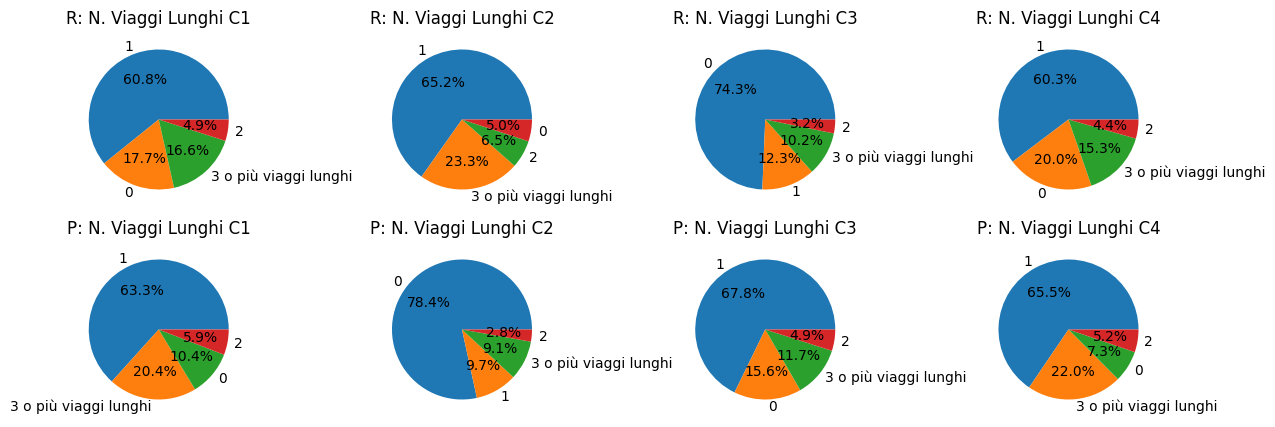

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))

label_mapping5 = {
    'Chi non ne fa viaggi lunghi': '0',
    'Un viaggio lungo all anno': '1',
    '2 viaggi lunghi all anno': '2',
    '3 o più viaggi lunghi0': '3+'
}

def plot_pie_with_short_labels_R2(data, ax, title):
    data_pie = data['Numero.viaggi.lunghi.all.anno.categoriale'].value_counts().rename(index=label_mapping5)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_R2(data_kmode_r1, axes[0, 0], 'R: N. Viaggi Lunghi C1')
plot_pie_with_short_labels_R2(data_kmode_r2, axes[0, 1], 'R: N. Viaggi Lunghi C2')
plot_pie_with_short_labels_R2(data_kmode_r3, axes[0, 2], 'R: N. Viaggi Lunghi C3')
plot_pie_with_short_labels_R2(data_kmode_r4, axes[0, 3], 'R: N. Viaggi Lunghi C4')


def plot_pie_with_short_labels_P2(data, ax, title):
    data_pie = data["Numero viaggi lunghi all'anno categoriale"].value_counts().rename(index=label_mapping5)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_P2(data_kmode1, axes[1, 0], 'P: N. Viaggi Lunghi C1')
plot_pie_with_short_labels_P2(data_kmode2, axes[1, 1], 'P: N. Viaggi Lunghi C2')
plot_pie_with_short_labels_P2(data_kmode3, axes[1, 2], 'P: N. Viaggi Lunghi C3')
plot_pie_with_short_labels_P2(data_kmode4, axes[1, 3], 'P: N. Viaggi Lunghi C4')

plt.show()

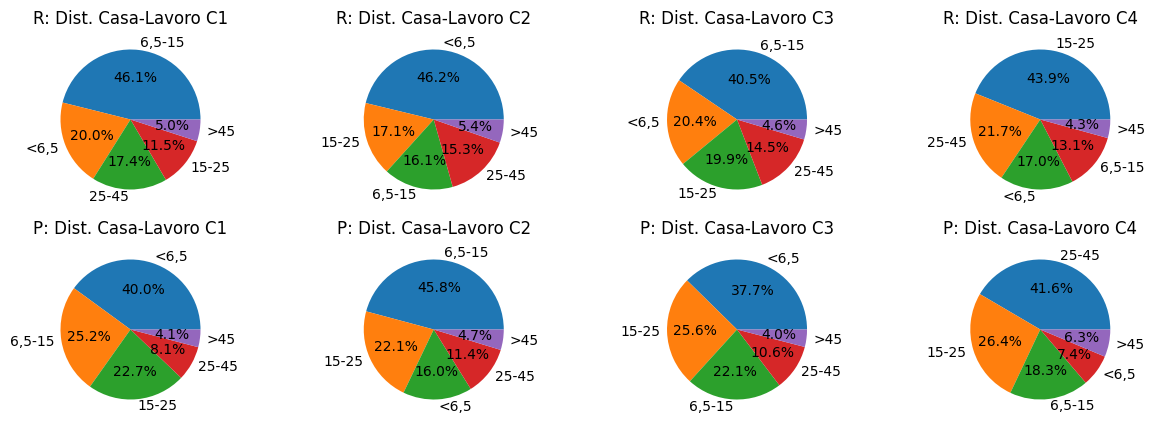

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))

label_mapping6 = {
    'Casa-Lavoro: meno di 6,5 miglia': '<6,5',
    'Casa-Lavoro: tra 6,5 e 15 miglia': '6,5-15',
    'Casa-Lavoro: tra 15 e 25 miglia': '15-25',
    'Casa-Lavoro: tra 25 e 45 miglia': '25-45',
    'Casa-Lavoro: più di 45 miglia': '>45'
}

def plot_pie_with_short_labels_R2(data, ax, title):
    data_pie = data['Distanza.casa.lavoro.categoriale'].value_counts().rename(index=label_mapping6)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_R2(data_kmode_r1, axes[0, 0], 'R: Dist. Casa-Lavoro C1')
plot_pie_with_short_labels_R2(data_kmode_r2, axes[0, 1], 'R: Dist. Casa-Lavoro C2')
plot_pie_with_short_labels_R2(data_kmode_r3, axes[0, 2], 'R: Dist. Casa-Lavoro C3')
plot_pie_with_short_labels_R2(data_kmode_r4, axes[0, 3], 'R: Dist. Casa-Lavoro C4')

def plot_pie_with_short_labels_P2(data, ax, title):
    data_pie = data["Distanza casa-lavoro categoriale"].value_counts().rename(index=label_mapping6)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_P2(data_kmode1, axes[1, 0], 'P: Dist. Casa-Lavoro C1')
plot_pie_with_short_labels_P2(data_kmode2, axes[1, 1], 'P: Dist. Casa-Lavoro C2')
plot_pie_with_short_labels_P2(data_kmode3, axes[1, 2], 'P: Dist. Casa-Lavoro C3')
plot_pie_with_short_labels_P2(data_kmode4, axes[1, 3], 'P: Dist. Casa-Lavoro C4')

plt.show()

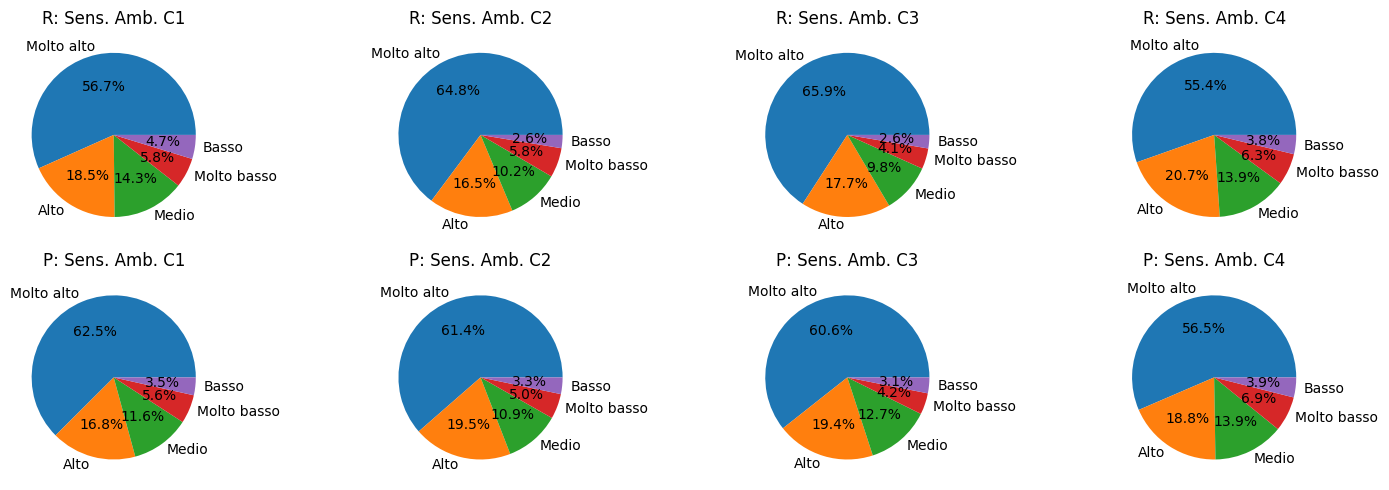

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))
data_kmode_r1['Sensibilità.ambientale.categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 0], title='R: Sens. Amb. C1').set_ylabel('')
data_kmode_r2['Sensibilità.ambientale.categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 1], title='R: Sens. Amb. C2').set_ylabel('')
data_kmode_r3['Sensibilità.ambientale.categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 2], title='R: Sens. Amb. C3').set_ylabel('')
data_kmode_r4['Sensibilità.ambientale.categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 3], title='R: Sens. Amb. C4').set_ylabel('')

data_kmode1['Sensibilità ambientale categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 0], title='P: Sens. Amb. C1').set_ylabel('')
data_kmode2['Sensibilità ambientale categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 1], title='P: Sens. Amb. C2').set_ylabel('')
data_kmode3['Sensibilità ambientale categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 2], title='P: Sens. Amb. C3').set_ylabel('')
data_kmode4['Sensibilità ambientale categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 3], title='P: Sens. Amb. C4').set_ylabel('')
plt.tight_layout()
plt.show()

### 8.1.5. Confronto var significativi

In [ ]:
print("R:")
print(", ".join([f'"{col}"' for col in data_kmode_r1.columns]))
print()
print("Phyton:")
print(", ".join([f'"{col}"' for col in data_kmode1.columns]))

R:
"Genere", "Classe.Reddito.Familiare", "Livello.di.istruzione", "Casa.di.proprietà", "Casa.Indipendente", "Tipologia.di.auto.precedente", "Numero.persone.in.famiglia..categoriale", "Numero.persone.in.famiglia.categoriale", "Numero.di.auto.in.famiglia.categoriale", "VMT.categoriale", "Viaggio.lungo.categoriale", "Numero.viaggi.lunghi.all.anno.categoriale", "Distanza.casa.lavoro.categoriale", "Sensibilità.ambientale.categoriale", "Classe_eta_raggruppata"

Phyton:
"Genere", "Classe Reddito Familiare", "Livello di istruzione", "Casa di proprietà", "Casa Indipendente", "Tipologia di auto precedente", "Numero persone in famiglia categoriale", "Numero di auto in famiglia categoriale", "VMT categoriale", "Viaggio lungo categoriale", "Numero viaggi lunghi all'anno categoriale", "Distanza casa-lavoro categoriale", "Sensibilità ambientale categoriale", "Classe d'età_"


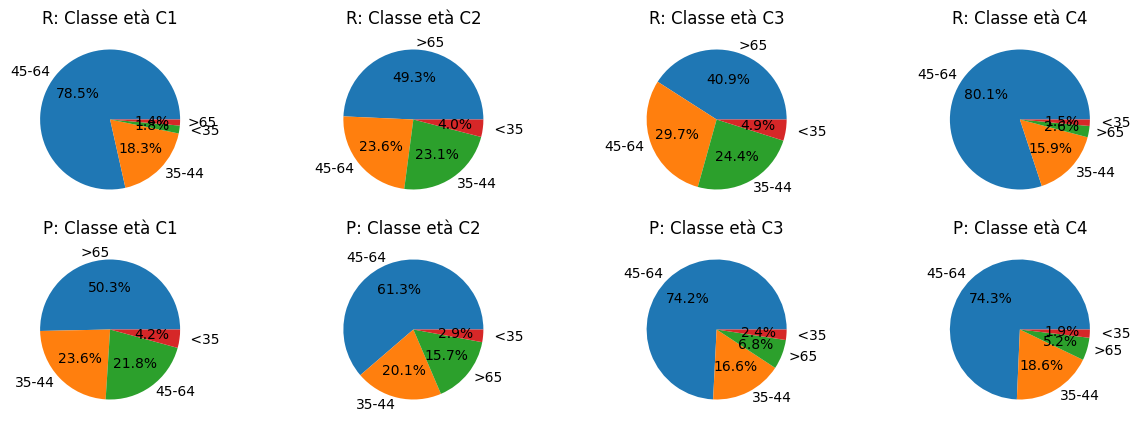

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))

data_kmode_r1['Classe_eta_raggruppata'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 0], title='R: Classe età C1').set_ylabel('')
data_kmode_r2['Classe_eta_raggruppata'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 1], title='R: Classe età C2').set_ylabel('')
data_kmode_r3['Classe_eta_raggruppata'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 2], title='R: Classe età C3').set_ylabel('')
data_kmode_r4['Classe_eta_raggruppata'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 3], title='R: Classe età C4').set_ylabel('')

data_kmode1["Classe d'età_"].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 0], title='P: Classe età C1').set_ylabel('')
data_kmode2["Classe d'età_"].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 1], title='P: Classe età C2').set_ylabel('')
data_kmode3["Classe d'età_"].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 2], title='P: Classe età C3').set_ylabel('')
data_kmode4["Classe d'età_"].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 3], title='P: Classe età C4').set_ylabel('')

plt.show()

plt.tight_layout()
plt.show()

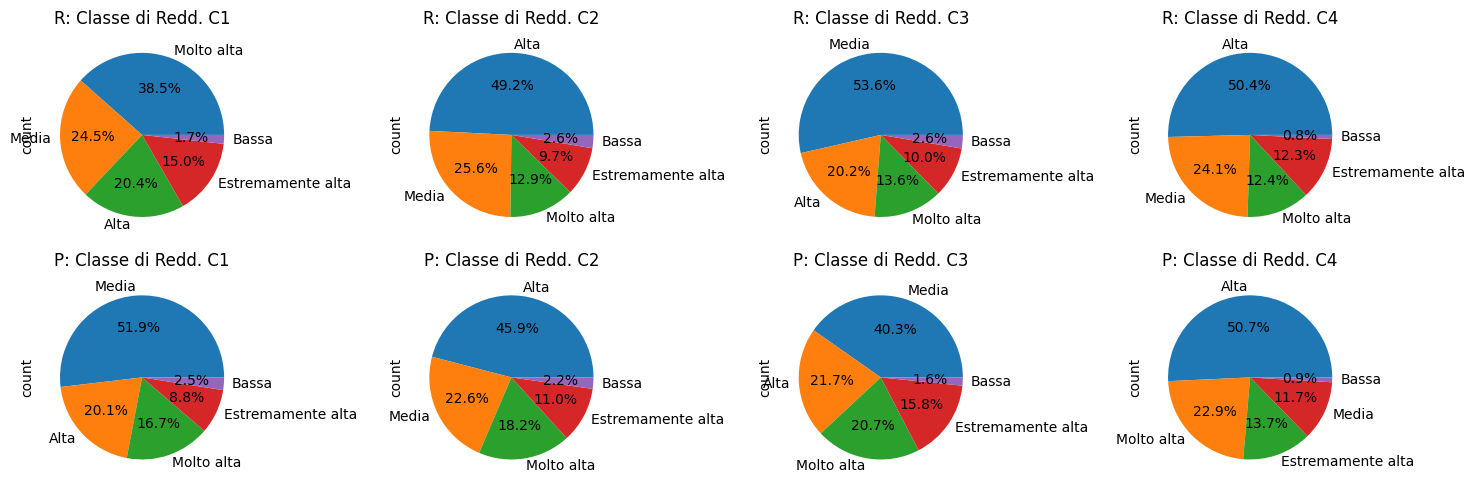

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))
data_kmode_r1['Classe.Reddito.Familiare'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 0], title='R: Classe di Redd. C1')
data_kmode_r2['Classe.Reddito.Familiare'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 1], title='R: Classe di Redd. C2')
data_kmode_r3['Classe.Reddito.Familiare'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 2], title='R: Classe di Redd. C3')
data_kmode_r4['Classe.Reddito.Familiare'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 3], title='R: Classe di Redd. C4')

data_kmode1['Classe Reddito Familiare'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 0], title='P: Classe di Redd. C1')
data_kmode2['Classe Reddito Familiare'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 1], title='P: Classe di Redd. C2')
data_kmode3['Classe Reddito Familiare'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 2], title='P: Classe di Redd. C3')
data_kmode4['Classe Reddito Familiare'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 3], title='P: Classe di Redd. C4')
plt.tight_layout()
plt.show()

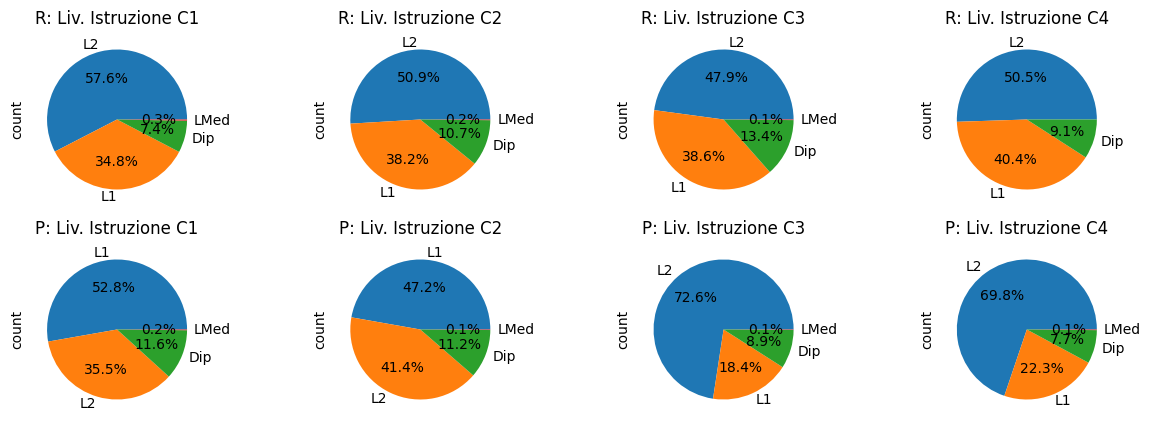

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))


label_mapping = {
    'Laurea 2L o Dottorato': 'L2',
    'Laurea 1L': 'L1',
    'Licenza Media': 'LMed',
    'Diploma o Qualifica professionale': 'Dip'
}

def plot_pie_with_short_labels_R(data, ax, title):
    data_pie = data['Livello.di.istruzione'].value_counts().rename(index=label_mapping)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)

plot_pie_with_short_labels_R(data_kmode_r1, axes[0, 0], 'R: Liv. Istruzione C1')
plot_pie_with_short_labels_R(data_kmode_r2, axes[0, 1], 'R: Liv. Istruzione C2')
plot_pie_with_short_labels_R(data_kmode_r3, axes[0, 2], 'R: Liv. Istruzione C3')
plot_pie_with_short_labels_R(data_kmode_r4, axes[0, 3], 'R: Liv. Istruzione C4')


def plot_pie_with_short_labels_P(data, ax, title):
    data_pie = data['Livello di istruzione'].value_counts().rename(index=label_mapping)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)

plot_pie_with_short_labels_P(data_kmode1, axes[1, 0], 'P: Liv. Istruzione C1')
plot_pie_with_short_labels_P(data_kmode2, axes[1, 1], 'P: Liv. Istruzione C2')
plot_pie_with_short_labels_P(data_kmode3, axes[1, 2], 'P: Liv. Istruzione C3')
plot_pie_with_short_labels_P(data_kmode4, axes[1, 3], 'P: Liv. Istruzione C4')

plt.show()

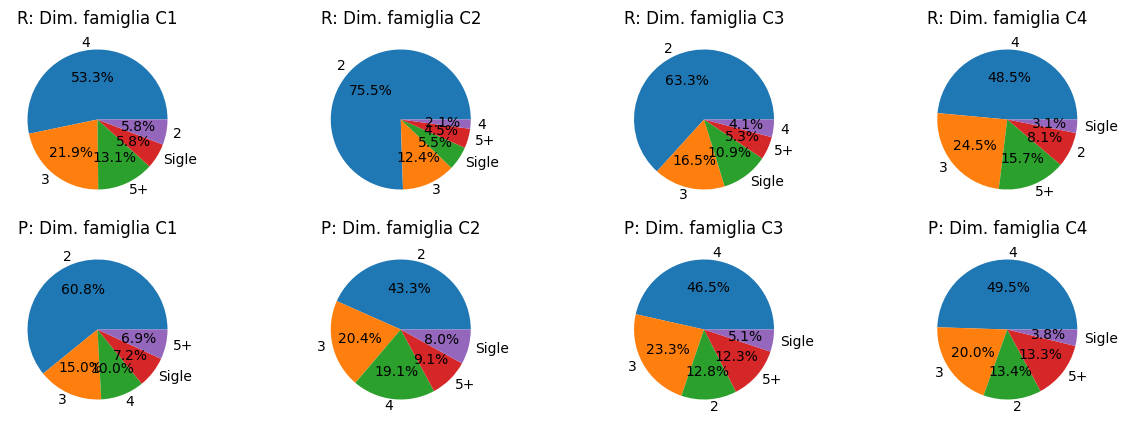

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))

label_mapping2 = {
    'Single': '1',
    'Coppie': '2',
    'Famiglie con 1 figlio': '3',
    'Famiglie con 2 figli': '4',
    'Famiglie con 3 o più di 3 figli': '5+'
}

def plot_pie_with_short_labels_R2(data, ax, title):
    data_pie = data['Numero.persone.in.famiglia.categoriale'].value_counts().rename(index=label_mapping2)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_R2(data_kmode_r1, axes[0, 0], 'R: Dim. famiglia C1')
plot_pie_with_short_labels_R2(data_kmode_r2, axes[0, 1], 'R: Dim. famiglia C2')
plot_pie_with_short_labels_R2(data_kmode_r3, axes[0, 2], 'R: Dim. famiglia C3')
plot_pie_with_short_labels_R2(data_kmode_r4, axes[0, 3], 'R: Dim. famiglia C4')


def plot_pie_with_short_labels_P2(data, ax, title):
    data_pie = data['Numero persone in famiglia categoriale'].value_counts().rename(index=label_mapping2)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_P2(data_kmode1, axes[1, 0], 'P: Dim. famiglia C1')
plot_pie_with_short_labels_P2(data_kmode2, axes[1, 1], 'P: Dim. famiglia C2')
plot_pie_with_short_labels_P2(data_kmode3, axes[1, 2], 'P: Dim. famiglia C3')
plot_pie_with_short_labels_P2(data_kmode4, axes[1, 3], 'P: Dim. famiglia C4')

plt.show()

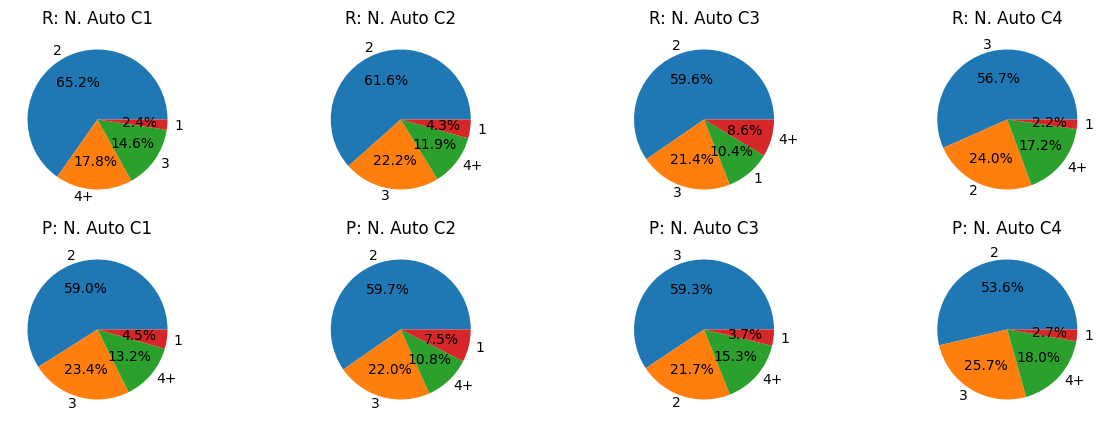

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))

label_mapping3 = {
    'Un Auto': '1',
    'Due Auto': '2',
    'Tre Auto': '3',
    'Più di quattro Auto': '4+'
}

def plot_pie_with_short_labels_R2(data, ax, title):
    data_pie = data['Numero.di.auto.in.famiglia.categoriale'].value_counts().rename(index=label_mapping3)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_R2(data_kmode_r1, axes[0, 0], 'R: N. Auto C1')
plot_pie_with_short_labels_R2(data_kmode_r2, axes[0, 1], 'R: N. Auto C2')
plot_pie_with_short_labels_R2(data_kmode_r3, axes[0, 2], 'R: N. Auto C3')
plot_pie_with_short_labels_R2(data_kmode_r4, axes[0, 3], 'R: N. Auto C4')


def plot_pie_with_short_labels_P2(data, ax, title):
    data_pie = data['Numero di auto in famiglia categoriale'].value_counts().rename(index=label_mapping3)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_P2(data_kmode1, axes[1, 0], 'P: N. Auto C1')
plot_pie_with_short_labels_P2(data_kmode2, axes[1, 1], 'P: N. Auto C2')
plot_pie_with_short_labels_P2(data_kmode3, axes[1, 2], 'P: N. Auto C3')
plot_pie_with_short_labels_P2(data_kmode4, axes[1, 3], 'P: N. Auto C4')

plt.show()

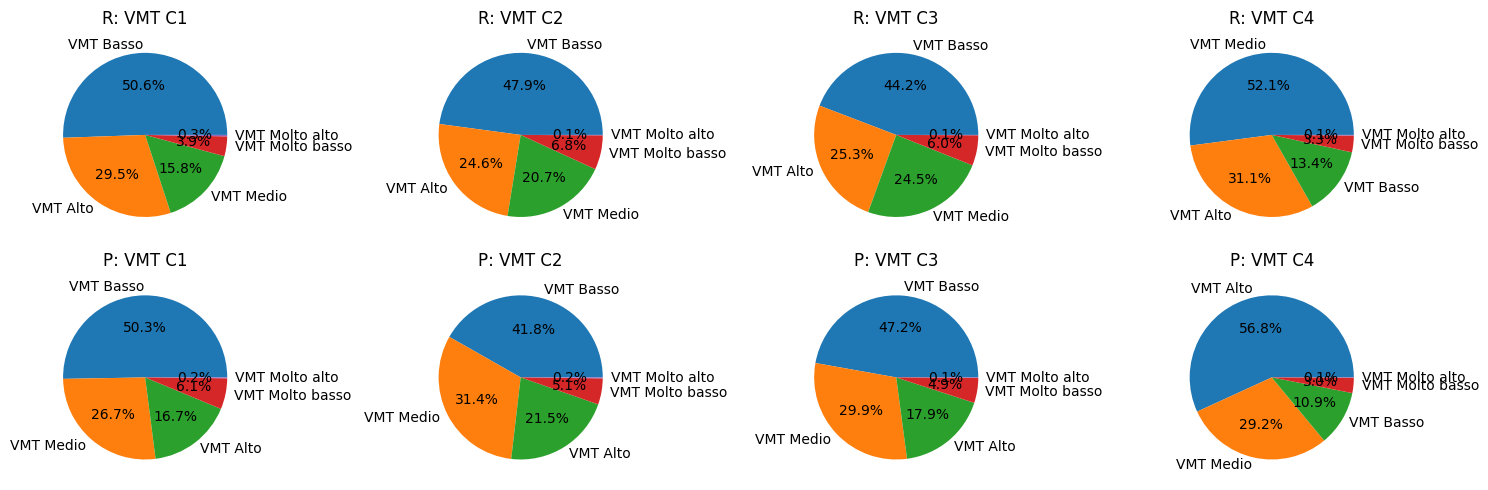

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))
data_kmode_r1['VMT.categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 0], title='R: VMT C1').set_ylabel('')
data_kmode_r2['VMT.categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 1], title='R: VMT C2').set_ylabel('')
data_kmode_r3['VMT.categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 2], title='R: VMT C3').set_ylabel('')
data_kmode_r4['VMT.categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 3], title='R: VMT C4').set_ylabel('')

data_kmode1['VMT categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 0], title='P: VMT C1').set_ylabel('')
data_kmode2['VMT categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 1], title='P: VMT C2').set_ylabel('')
data_kmode3['VMT categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 2], title='P: VMT C3').set_ylabel('')
data_kmode4['VMT categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 3], title='P: VMT C4').set_ylabel('')
plt.tight_layout()
plt.show()

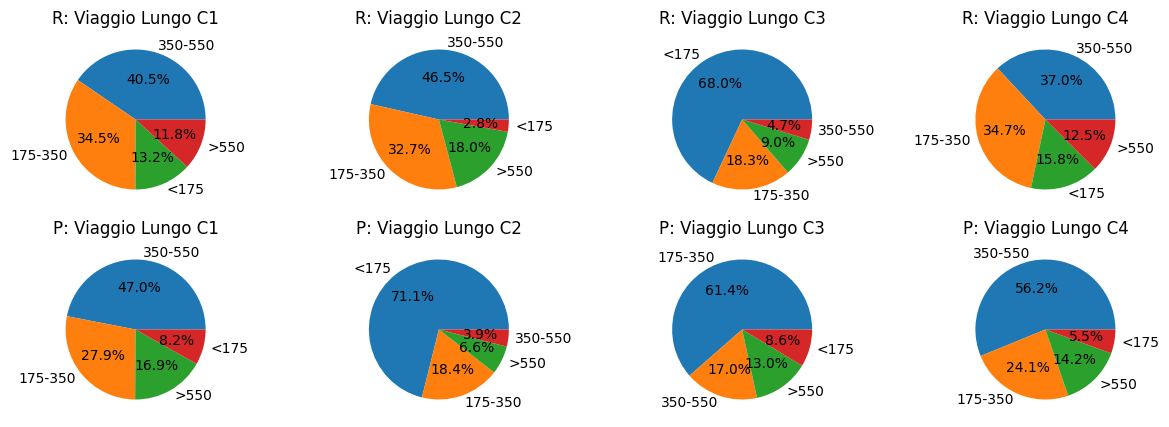

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))

label_mapping4 = {
    'Viaggio: meno di 175': '<175',
    'Viaggio: tra 175 e 350': '175-350',
    'Viaggio: tra 350 e 550': '350-550',
    'Viaggio: più di 550': '>550'
}

def plot_pie_with_short_labels_R2(data, ax, title):
    data_pie = data['Viaggio.lungo.categoriale'].value_counts().rename(index=label_mapping4)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_R2(data_kmode_r1, axes[0, 0], 'R: Viaggio Lungo C1')
plot_pie_with_short_labels_R2(data_kmode_r2, axes[0, 1], 'R: Viaggio Lungo C2')
plot_pie_with_short_labels_R2(data_kmode_r3, axes[0, 2], 'R: Viaggio Lungo C3')
plot_pie_with_short_labels_R2(data_kmode_r4, axes[0, 3], 'R: Viaggio Lungo C4')


def plot_pie_with_short_labels_P2(data, ax, title):
    data_pie = data['Viaggio lungo categoriale'].value_counts().rename(index=label_mapping4)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_P2(data_kmode1, axes[1, 0], 'P: Viaggio Lungo C1')
plot_pie_with_short_labels_P2(data_kmode2, axes[1, 1], 'P: Viaggio Lungo C2')
plot_pie_with_short_labels_P2(data_kmode3, axes[1, 2], 'P: Viaggio Lungo C3')
plot_pie_with_short_labels_P2(data_kmode4, axes[1, 3], 'P: Viaggio Lungo C4')

plt.show()

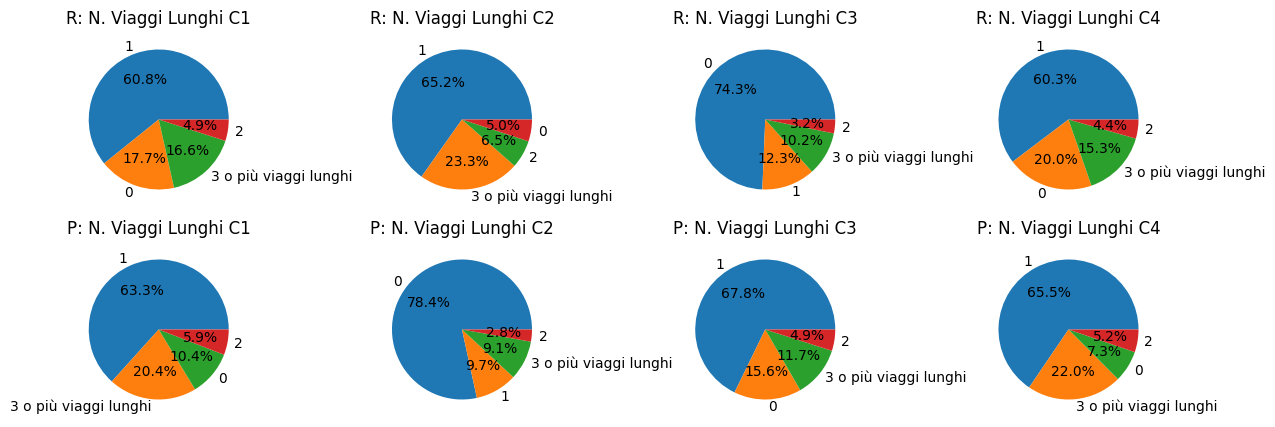

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))

label_mapping5 = {
    'Chi non ne fa viaggi lunghi': '0',
    'Un viaggio lungo all anno': '1',
    '2 viaggi lunghi all anno': '2',
    '3 o più viaggi lunghi0': '3+'
}

def plot_pie_with_short_labels_R2(data, ax, title):
    data_pie = data['Numero.viaggi.lunghi.all.anno.categoriale'].value_counts().rename(index=label_mapping5)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_R2(data_kmode_r1, axes[0, 0], 'R: N. Viaggi Lunghi C1')
plot_pie_with_short_labels_R2(data_kmode_r2, axes[0, 1], 'R: N. Viaggi Lunghi C2')
plot_pie_with_short_labels_R2(data_kmode_r3, axes[0, 2], 'R: N. Viaggi Lunghi C3')
plot_pie_with_short_labels_R2(data_kmode_r4, axes[0, 3], 'R: N. Viaggi Lunghi C4')


def plot_pie_with_short_labels_P2(data, ax, title):
    data_pie = data["Numero viaggi lunghi all'anno categoriale"].value_counts().rename(index=label_mapping5)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_P2(data_kmode1, axes[1, 0], 'P: N. Viaggi Lunghi C1')
plot_pie_with_short_labels_P2(data_kmode2, axes[1, 1], 'P: N. Viaggi Lunghi C2')
plot_pie_with_short_labels_P2(data_kmode3, axes[1, 2], 'P: N. Viaggi Lunghi C3')
plot_pie_with_short_labels_P2(data_kmode4, axes[1, 3], 'P: N. Viaggi Lunghi C4')

plt.show()

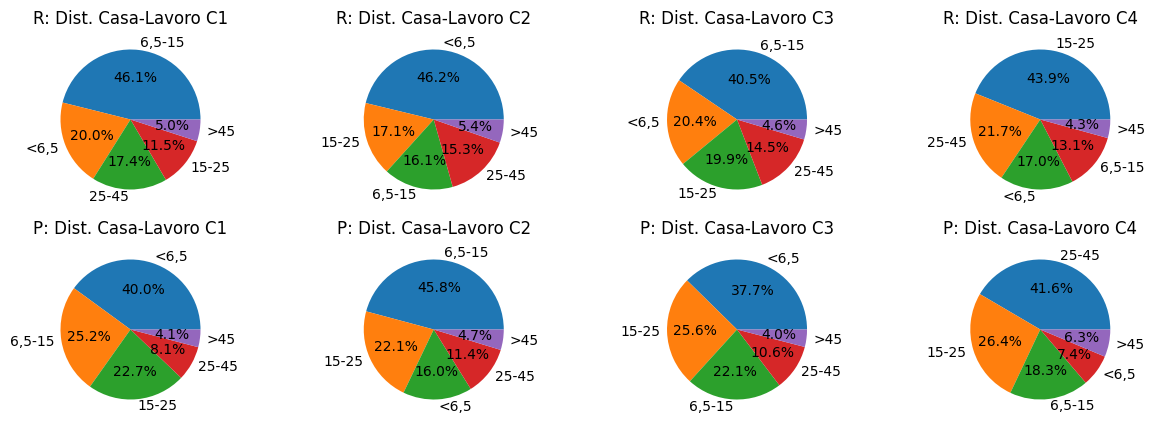

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))

label_mapping6 = {
    'Casa-Lavoro: meno di 6,5 miglia': '<6,5',
    'Casa-Lavoro: tra 6,5 e 15 miglia': '6,5-15',
    'Casa-Lavoro: tra 15 e 25 miglia': '15-25',
    'Casa-Lavoro: tra 25 e 45 miglia': '25-45',
    'Casa-Lavoro: più di 45 miglia': '>45'
}

def plot_pie_with_short_labels_R2(data, ax, title):
    data_pie = data['Distanza.casa.lavoro.categoriale'].value_counts().rename(index=label_mapping6)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_R2(data_kmode_r1, axes[0, 0], 'R: Dist. Casa-Lavoro C1')
plot_pie_with_short_labels_R2(data_kmode_r2, axes[0, 1], 'R: Dist. Casa-Lavoro C2')
plot_pie_with_short_labels_R2(data_kmode_r3, axes[0, 2], 'R: Dist. Casa-Lavoro C3')
plot_pie_with_short_labels_R2(data_kmode_r4, axes[0, 3], 'R: Dist. Casa-Lavoro C4')

def plot_pie_with_short_labels_P2(data, ax, title):
    data_pie = data["Distanza casa-lavoro categoriale"].value_counts().rename(index=label_mapping6)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_P2(data_kmode1, axes[1, 0], 'P: Dist. Casa-Lavoro C1')
plot_pie_with_short_labels_P2(data_kmode2, axes[1, 1], 'P: Dist. Casa-Lavoro C2')
plot_pie_with_short_labels_P2(data_kmode3, axes[1, 2], 'P: Dist. Casa-Lavoro C3')
plot_pie_with_short_labels_P2(data_kmode4, axes[1, 3], 'P: Dist. Casa-Lavoro C4')

plt.show()

### 8.1.6. Prova con 3 Cluster

In [ ]:
#data_kmode1.drop(columns=['Cluster', 'Cluster'], inplace=True)

In [ ]:
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data_kmode)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2106, cost: 34846.0
Run 1, iteration: 2/100, moves: 690, cost: 34578.0
Run 1, iteration: 3/100, moves: 2, cost: 34578.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1585, cost: 33862.0
Run 2, iteration: 2/100, moves: 431, cost: 33862.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2942, cost: 33887.0
Run 3, iteration: 2/100, moves: 622, cost: 33887.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2434, cost: 33844.0
Run 4, iteration: 2/100, moves: 225, cost: 33844.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1945, cost: 34749.0
Run 5, iteration: 2/100, moves: 1293, cost: 32948.0
Run 5, iteration: 3/100, moves: 522

array([2, 0, 2, ..., 1, 0, 1], dtype=uint16)

In [ ]:
data_kmode.insert(0, "Cluster", clusters, True)

ValueError: If using all scalar values, you must pass an index

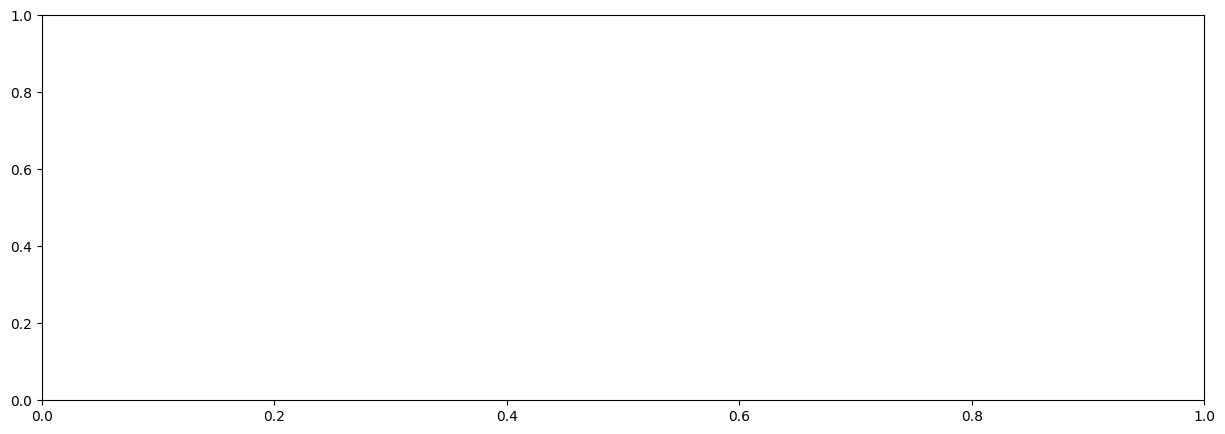

In [ ]:
all_features = data_kmode.columns.tolist()

#cluster_0_data = data_BEV[data_BEV['Cluster'] == 2]

for col in all_features:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='Cluster',hue=col, data = data_kmode, stat="percent")
    plt.show()

### 8.1.7. Prova 4 Cluster reduced

#### 8.1.7.1 Grafici

In [ ]:
#data_kmode.drop(columns=['Cluster', 'Cluster'], inplace=True)

In [ ]:
kmode = KModes(n_clusters=4, init = "random", n_init = 5, verbose=1, random_state =42)
clusters = kmode.fit_predict(data_kmode_reduced)
data_kmode_reduced.insert(0, "Cluster", clusters, True)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1257, cost: 25213.0
Run 1, iteration: 2/100, moves: 91, cost: 25213.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1293, cost: 24963.0
Run 2, iteration: 2/100, moves: 360, cost: 24963.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1381, cost: 25809.0
Run 3, iteration: 2/100, moves: 366, cost: 25809.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1570, cost: 25659.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1140, cost: 24687.0
Run 5, iteration: 2/100, moves: 1, cost: 24687.0
Best run was number 5


In [ ]:
print("\nDistribuzione dei cluster:\n")
print(data_kmode_reduced['Cluster'].value_counts())


Distribuzione dei cluster:

Cluster
0    1708
2    1680
1    1674
3     734
Name: count, dtype: int64


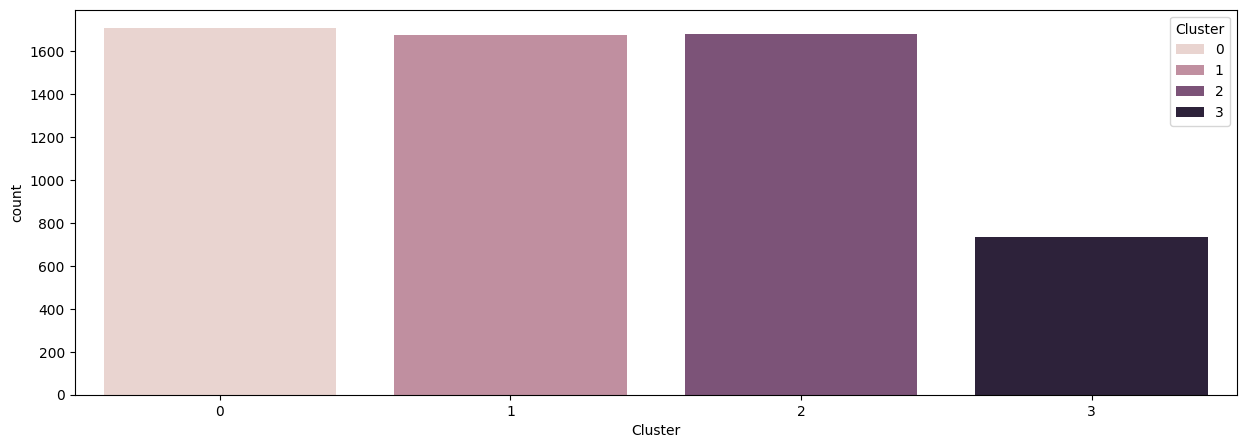

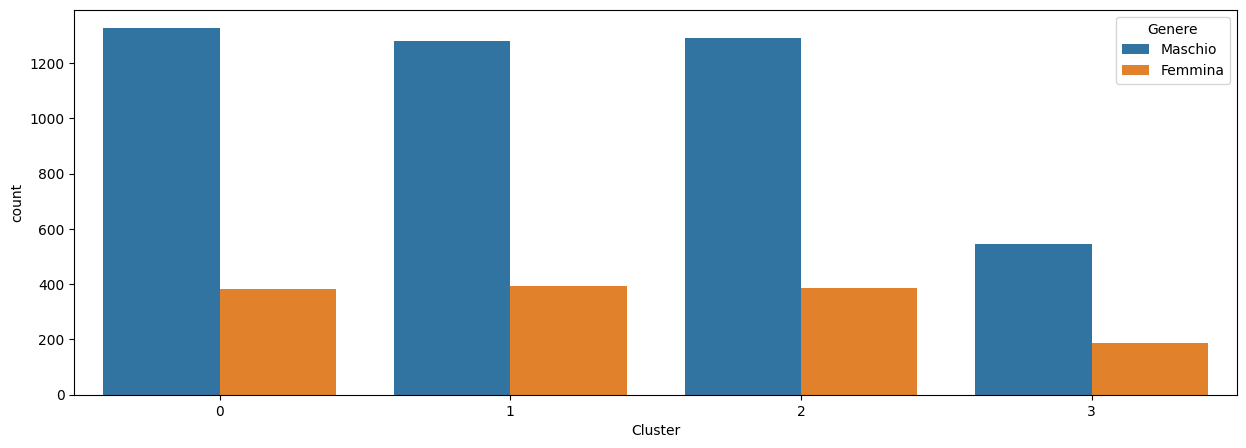

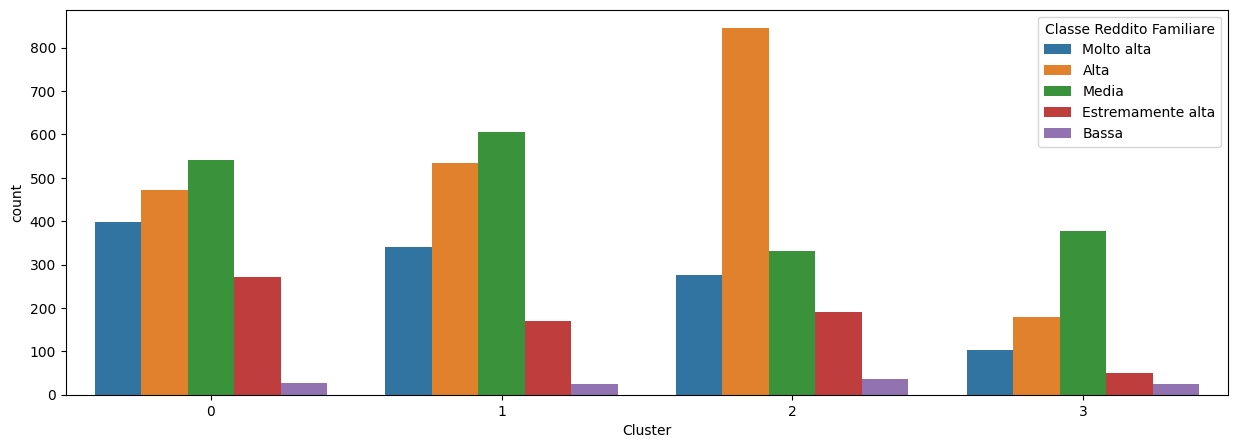

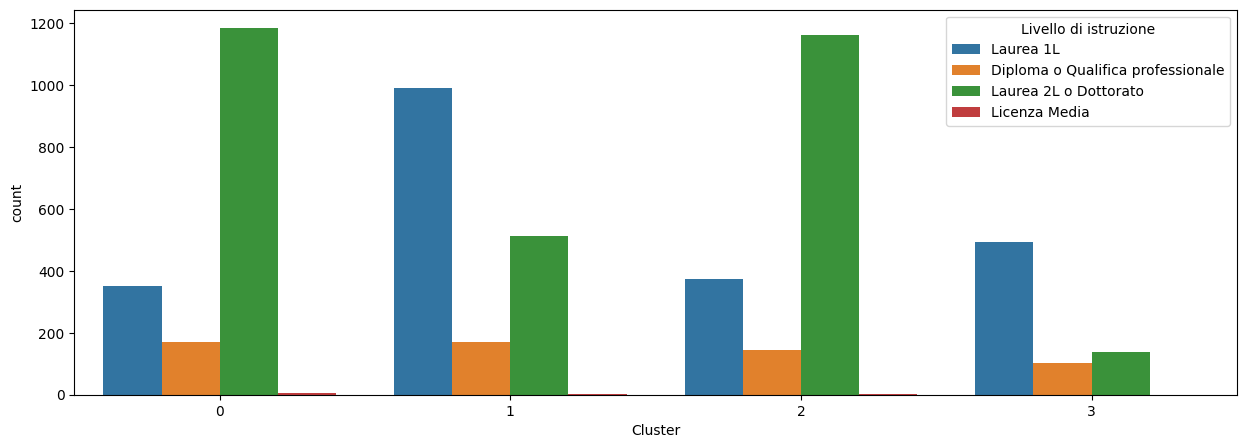

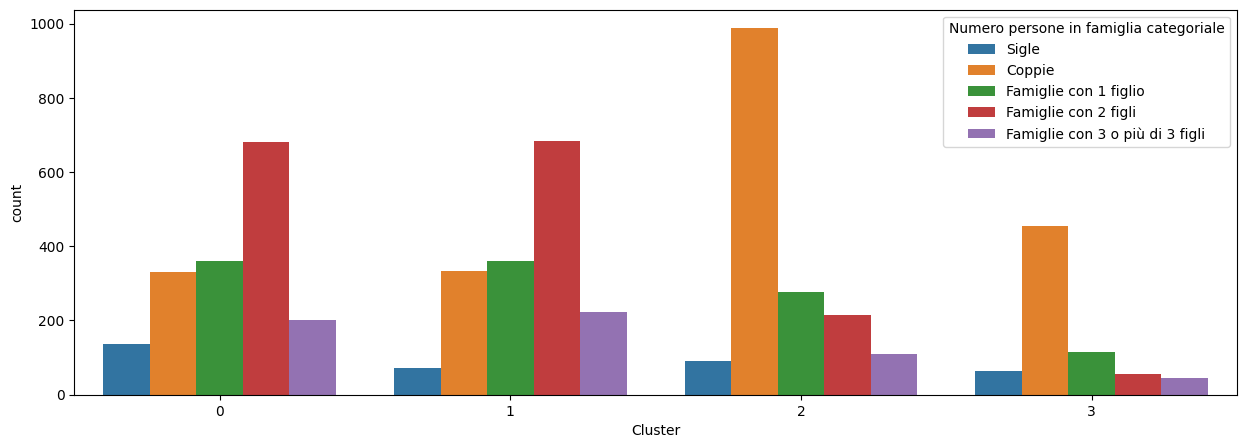

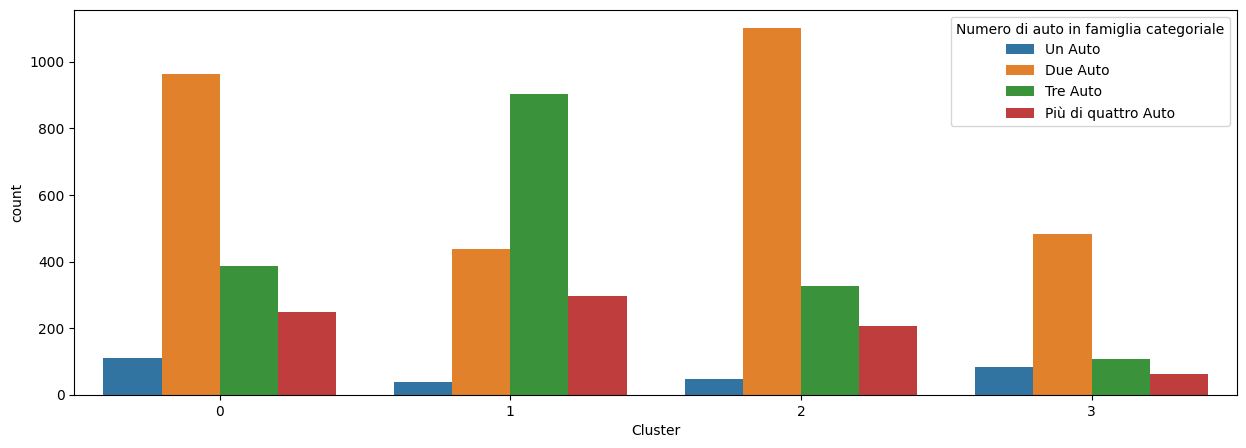

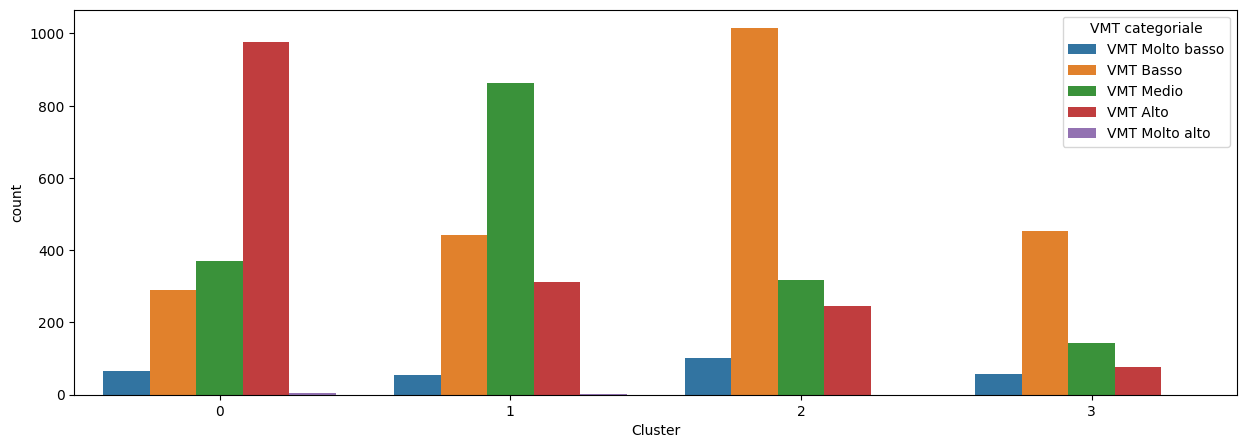

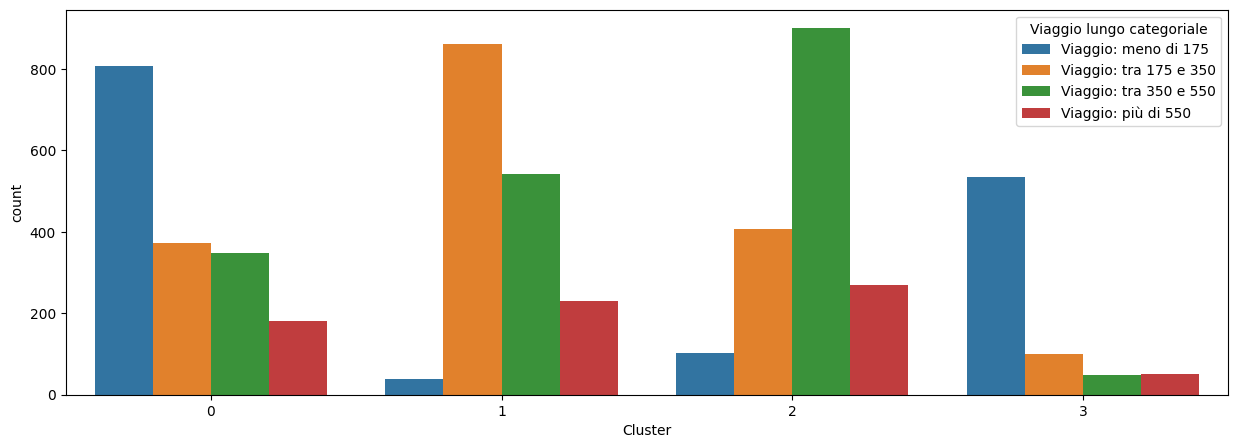

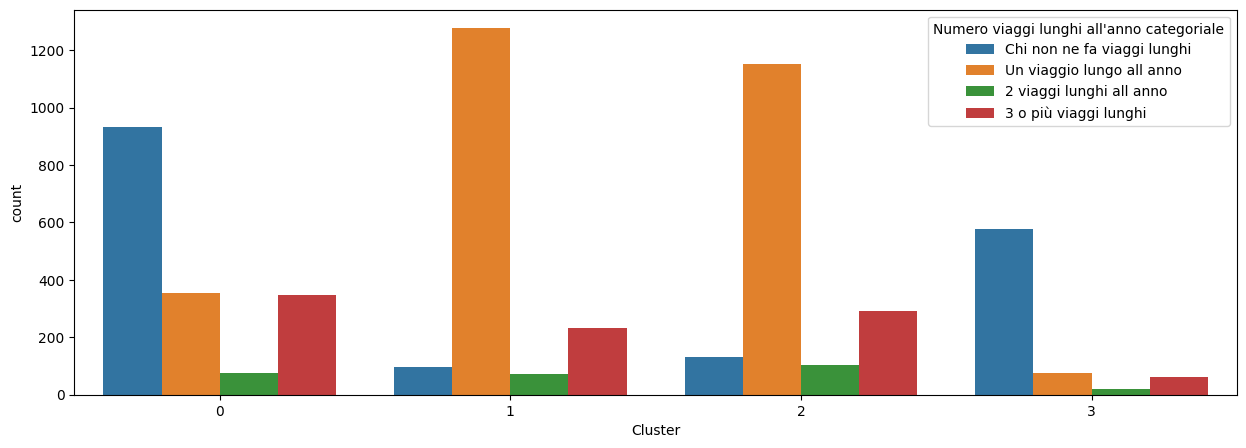

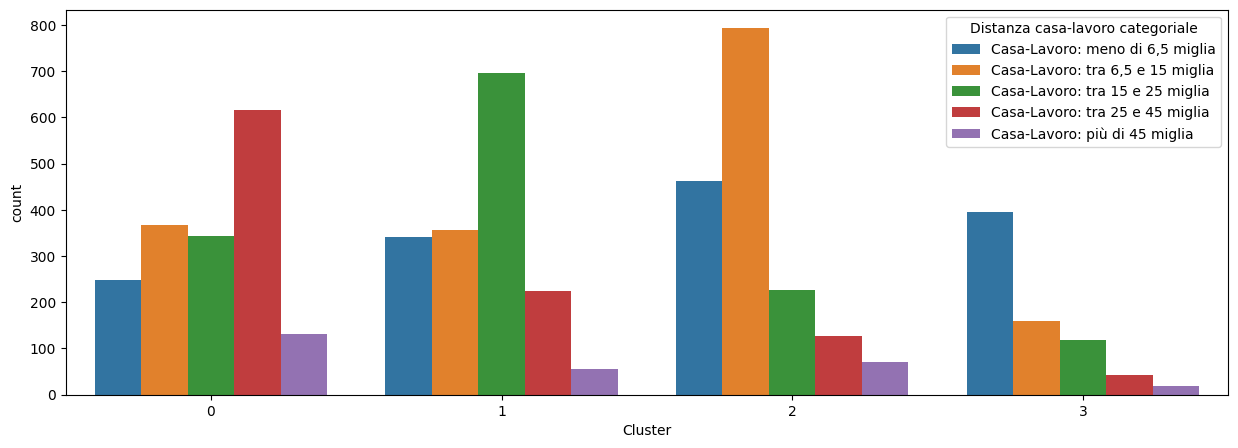

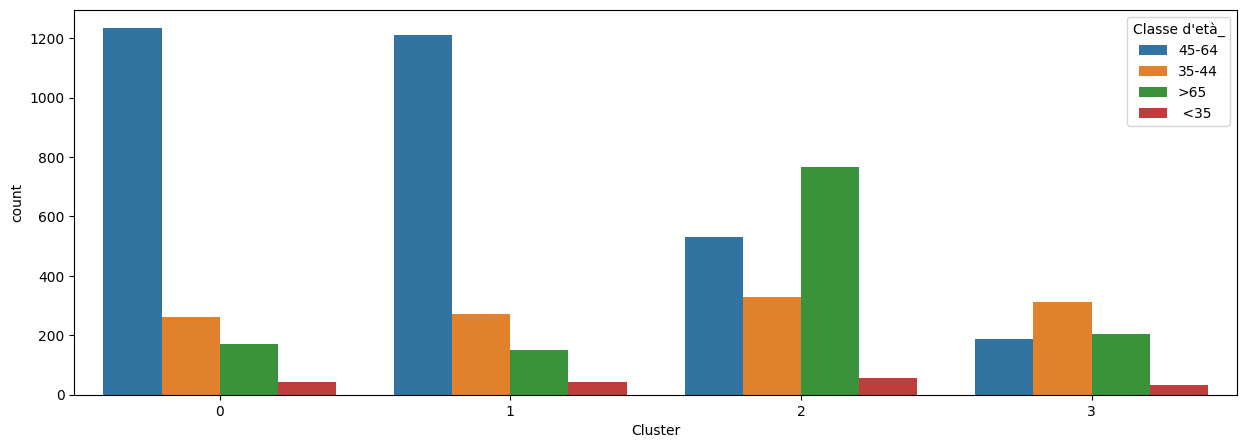

In [ ]:
all_features = data_kmode_reduced.columns.tolist()
#cluster_0_data = data_BEV[data_BEV['Cluster'] == 2]
for col in all_features:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='Cluster',hue=col, data = data_kmode_reduced)
    plt.show()

#### 8.1.7.2 Confronto tra il modello completo e reduced

In [ ]:
data_kmode_red1= data_kmode_reduced[data_kmode_reduced['Cluster'] == 0]
data_kmode_red1.drop(columns=['Cluster'], inplace=True)

data_kmode_red2= data_kmode_reduced[data_kmode_reduced['Cluster'] == 1]
data_kmode_red2.drop(columns=['Cluster'], inplace=True)

data_kmode_red3= data_kmode_reduced[data_kmode_reduced['Cluster'] == 2]
data_kmode_red3.drop(columns=['Cluster'], inplace=True)

data_kmode_red4= data_kmode_reduced[data_kmode_reduced['Cluster'] == 3]
data_kmode_red4.drop(columns=['Cluster'], inplace=True)

<ipython-input-100-f427b85c3a18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kmode_red1.drop(columns=['Cluster'], inplace=True)
<ipython-input-100-f427b85c3a18>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kmode_red2.drop(columns=['Cluster'], inplace=True)
<ipython-input-100-f427b85c3a18>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kmode_red3.drop(columns=['Cluster'], inplace=True)
<ipython-input-100-f427b8

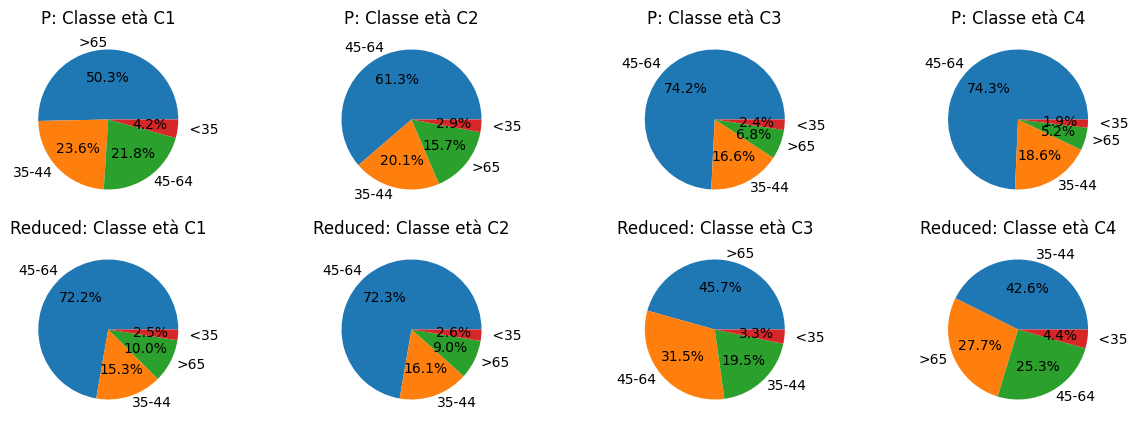

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))

data_kmode1["Classe d'età_"].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 0], title='P: Classe età C1').set_ylabel('')
data_kmode2["Classe d'età_"].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 1], title='P: Classe età C2').set_ylabel('')
data_kmode3["Classe d'età_"].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 2], title='P: Classe età C3').set_ylabel('')
data_kmode4["Classe d'età_"].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 3], title='P: Classe età C4').set_ylabel('')

data_kmode_red1["Classe d'età_"].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 0], title='Reduced: Classe età C1').set_ylabel('')
data_kmode_red2["Classe d'età_"].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 1], title='Reduced: Classe età C2').set_ylabel('')
data_kmode_red3["Classe d'età_"].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 2], title='Reduced: Classe età C3').set_ylabel('')
data_kmode_red4["Classe d'età_"].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 3], title='Reduced: Classe età C4').set_ylabel('')

plt.show()

plt.tight_layout()
plt.show()

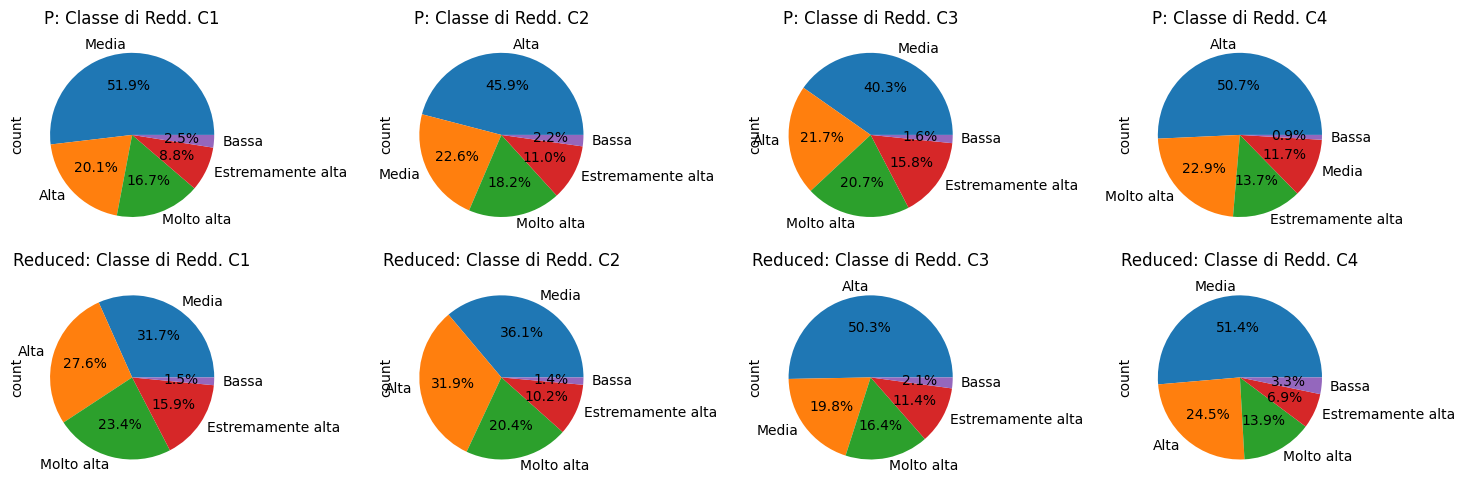

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))

data_kmode1['Classe Reddito Familiare'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 0], title='P: Classe di Redd. C1')
data_kmode2['Classe Reddito Familiare'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 1], title='P: Classe di Redd. C2')
data_kmode3['Classe Reddito Familiare'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 2], title='P: Classe di Redd. C3')
data_kmode4['Classe Reddito Familiare'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 3], title='P: Classe di Redd. C4')

data_kmode_red1['Classe Reddito Familiare'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 0], title='Reduced: Classe di Redd. C1')
data_kmode_red2['Classe Reddito Familiare'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 1], title='Reduced: Classe di Redd. C2')
data_kmode_red3['Classe Reddito Familiare'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 2], title='Reduced: Classe di Redd. C3')
data_kmode_red4['Classe Reddito Familiare'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 3], title='Reduced: Classe di Redd. C4')

plt.tight_layout()
plt.show()

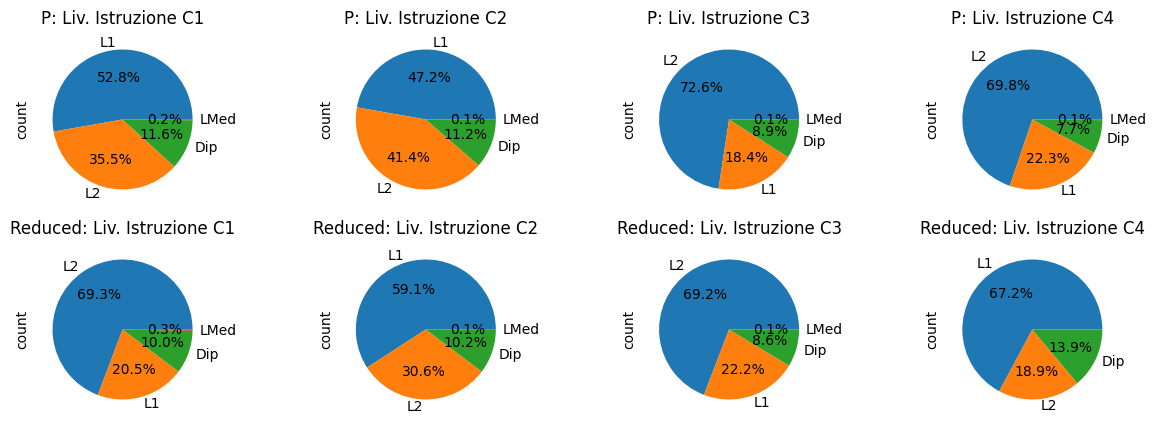

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))


label_mapping = {
    'Laurea 2L o Dottorato': 'L2',
    'Laurea 1L': 'L1',
    'Licenza Media': 'LMed',
    'Diploma o Qualifica professionale': 'Dip'
}

def plot_pie_with_short_labels_red(data, ax, title):
    data_pie = data['Livello di istruzione'].value_counts().rename(index=label_mapping)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)

plot_pie_with_short_labels_red(data_kmode_red1, axes[1, 0], 'Reduced: Liv. Istruzione C1')
plot_pie_with_short_labels_red(data_kmode_red2, axes[1, 1], 'Reduced: Liv. Istruzione C2')
plot_pie_with_short_labels_red(data_kmode_red3, axes[1, 2], 'Reduced: Liv. Istruzione C3')
plot_pie_with_short_labels_red(data_kmode_red4, axes[1, 3], 'Reduced: Liv. Istruzione C4')


def plot_pie_with_short_labels_P(data, ax, title):
    data_pie = data['Livello di istruzione'].value_counts().rename(index=label_mapping)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)

plot_pie_with_short_labels_P(data_kmode1, axes[0, 0], 'P: Liv. Istruzione C1')
plot_pie_with_short_labels_P(data_kmode2, axes[0, 1], 'P: Liv. Istruzione C2')
plot_pie_with_short_labels_P(data_kmode3, axes[0, 2], 'P: Liv. Istruzione C3')
plot_pie_with_short_labels_P(data_kmode4, axes[0, 3], 'P: Liv. Istruzione C4')

plt.show()

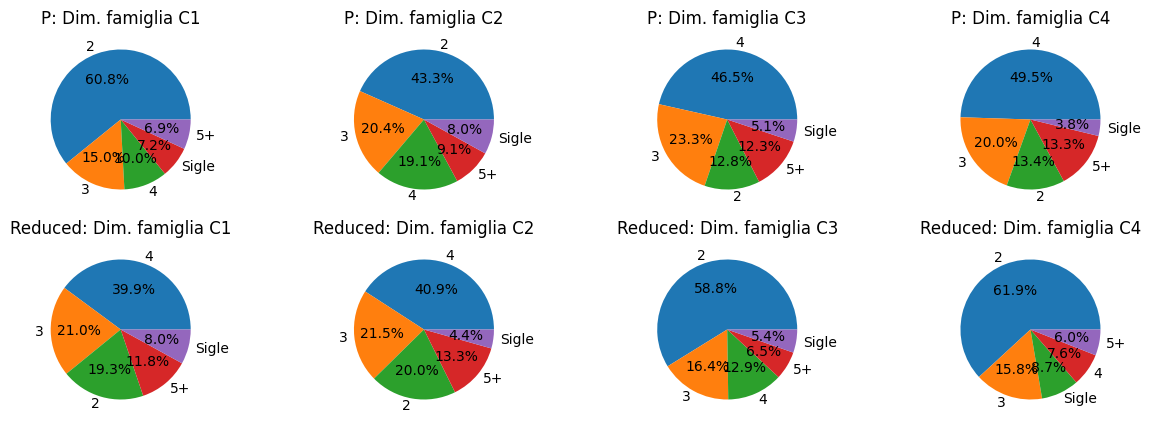

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))

label_mapping2 = {
    'Single': '1',
    'Coppie': '2',
    'Famiglie con 1 figlio': '3',
    'Famiglie con 2 figli': '4',
    'Famiglie con 3 o più di 3 figli': '5+'
}

def plot_pie_with_short_labels_RED(data, ax, title):
    data_pie = data['Numero persone in famiglia categoriale'].value_counts().rename(index=label_mapping2)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_RED(data_kmode_red1, axes[1, 0], 'Reduced: Dim. famiglia C1')
plot_pie_with_short_labels_RED(data_kmode_red2, axes[1, 1], 'Reduced: Dim. famiglia C2')
plot_pie_with_short_labels_RED(data_kmode_red3, axes[1, 2], 'Reduced: Dim. famiglia C3')
plot_pie_with_short_labels_RED(data_kmode_red4, axes[1, 3], 'Reduced: Dim. famiglia C4')


def plot_pie_with_short_labels_P2(data, ax, title):
    data_pie = data['Numero persone in famiglia categoriale'].value_counts().rename(index=label_mapping2)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_P2(data_kmode1, axes[0, 0], 'P: Dim. famiglia C1')
plot_pie_with_short_labels_P2(data_kmode2, axes[0, 1], 'P: Dim. famiglia C2')
plot_pie_with_short_labels_P2(data_kmode3, axes[0, 2], 'P: Dim. famiglia C3')
plot_pie_with_short_labels_P2(data_kmode4, axes[0, 3], 'P: Dim. famiglia C4')

plt.show()

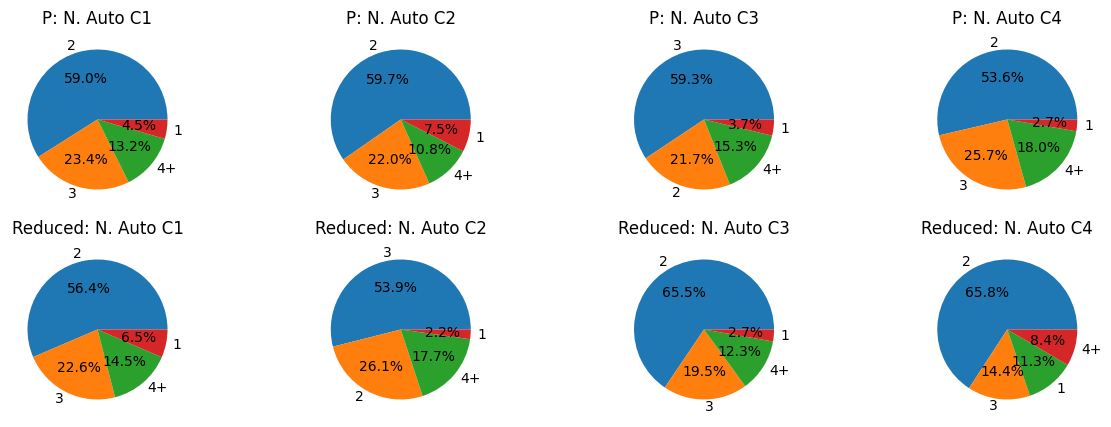

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))

label_mapping3 = {
    'Un Auto': '1',
    'Due Auto': '2',
    'Tre Auto': '3',
    'Più di quattro Auto': '4+'
}

def plot_pie_with_short_labels_red(data, ax, title):
    data_pie = data['Numero di auto in famiglia categoriale'].value_counts().rename(index=label_mapping3)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_red(data_kmode_red1, axes[1, 0], 'Reduced: N. Auto C1')
plot_pie_with_short_labels_red(data_kmode_red2, axes[1, 1], 'Reduced: N. Auto C2')
plot_pie_with_short_labels_red(data_kmode_red3, axes[1, 2], 'Reduced: N. Auto C3')
plot_pie_with_short_labels_red(data_kmode_red4, axes[1, 3], 'Reduced: N. Auto C4')


def plot_pie_with_short_labels_P2(data, ax, title):
    data_pie = data['Numero di auto in famiglia categoriale'].value_counts().rename(index=label_mapping3)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_P2(data_kmode1, axes[0, 0], 'P: N. Auto C1')
plot_pie_with_short_labels_P2(data_kmode2, axes[0, 1], 'P: N. Auto C2')
plot_pie_with_short_labels_P2(data_kmode3, axes[0, 2], 'P: N. Auto C3')
plot_pie_with_short_labels_P2(data_kmode4, axes[0, 3], 'P: N. Auto C4')

plt.show()

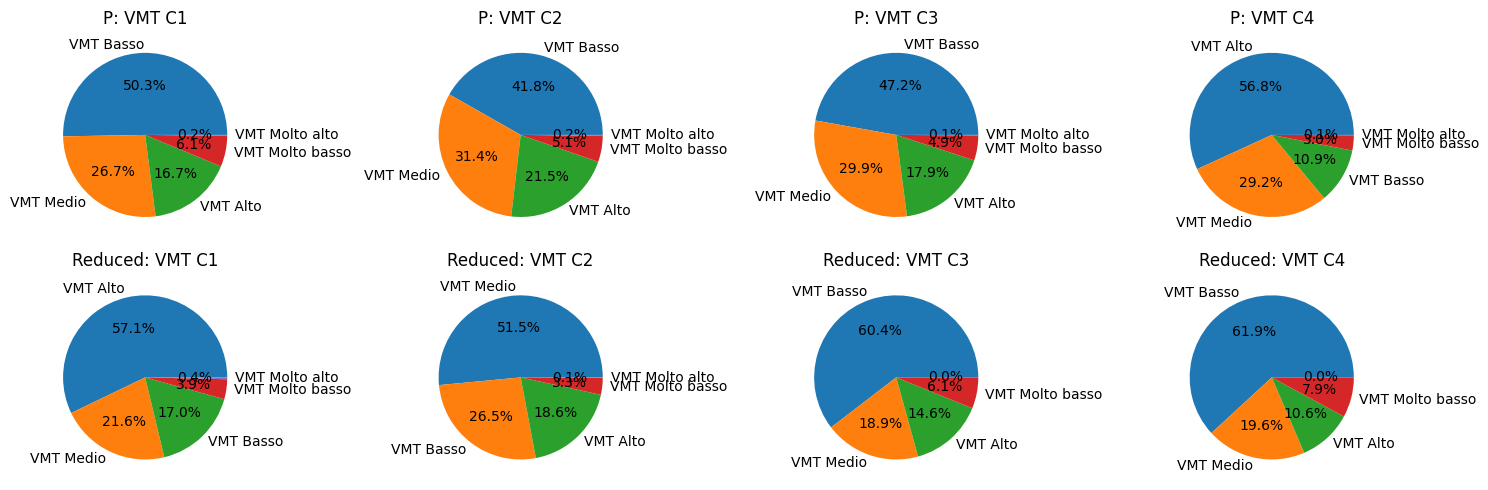

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))
data_kmode1['VMT categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 0], title='P: VMT C1').set_ylabel('')
data_kmode2['VMT categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 1], title='P: VMT C2').set_ylabel('')
data_kmode3['VMT categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 2], title='P: VMT C3').set_ylabel('')
data_kmode4['VMT categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0, 3], title='P: VMT C4').set_ylabel('')

data_kmode_red1['VMT categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 0], title='Reduced: VMT C1').set_ylabel('')
data_kmode_red2['VMT categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 1], title='Reduced: VMT C2').set_ylabel('')
data_kmode_red3['VMT categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 2], title='Reduced: VMT C3').set_ylabel('')
data_kmode_red4['VMT categoriale'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1, 3], title='Reduced: VMT C4').set_ylabel('')


plt.tight_layout()
plt.show()

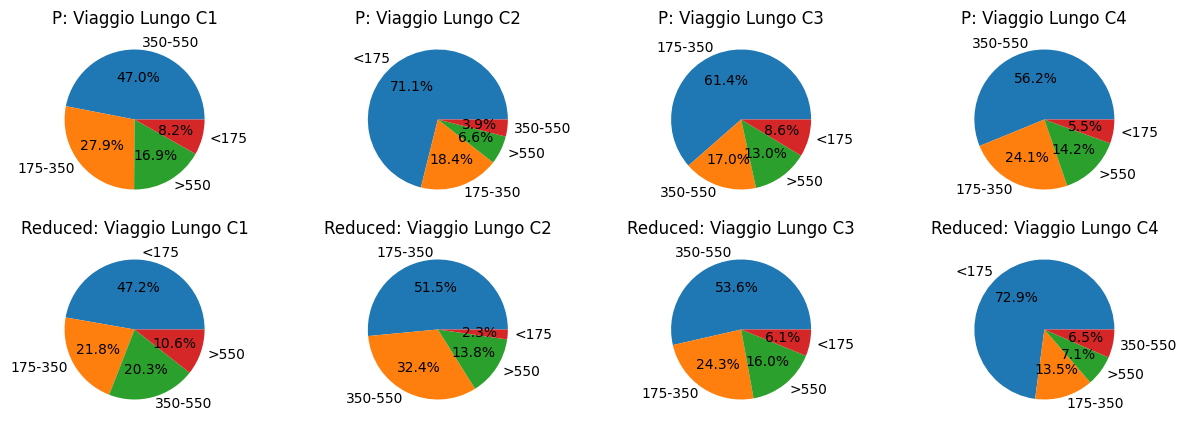

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))

label_mapping4 = {
    'Viaggio: meno di 175': '<175',
    'Viaggio: tra 175 e 350': '175-350',
    'Viaggio: tra 350 e 550': '350-550',
    'Viaggio: più di 550': '>550'
}

def plot_pie_with_short_labels_red(data, ax, title):
    data_pie = data['Viaggio lungo categoriale'].value_counts().rename(index=label_mapping4)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_red(data_kmode_red1, axes[1, 0], 'Reduced: Viaggio Lungo C1')
plot_pie_with_short_labels_red(data_kmode_red2, axes[1, 1], 'Reduced: Viaggio Lungo C2')
plot_pie_with_short_labels_red(data_kmode_red3, axes[1, 2], 'Reduced: Viaggio Lungo C3')
plot_pie_with_short_labels_red(data_kmode_red4, axes[1, 3], 'Reduced: Viaggio Lungo C4')


def plot_pie_with_short_labels_P2(data, ax, title):
    data_pie = data['Viaggio lungo categoriale'].value_counts().rename(index=label_mapping4)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_P2(data_kmode1, axes[0, 0], 'P: Viaggio Lungo C1')
plot_pie_with_short_labels_P2(data_kmode2, axes[0, 1], 'P: Viaggio Lungo C2')
plot_pie_with_short_labels_P2(data_kmode3, axes[0, 2], 'P: Viaggio Lungo C3')
plot_pie_with_short_labels_P2(data_kmode4, axes[0, 3], 'P: Viaggio Lungo C4')

plt.show()

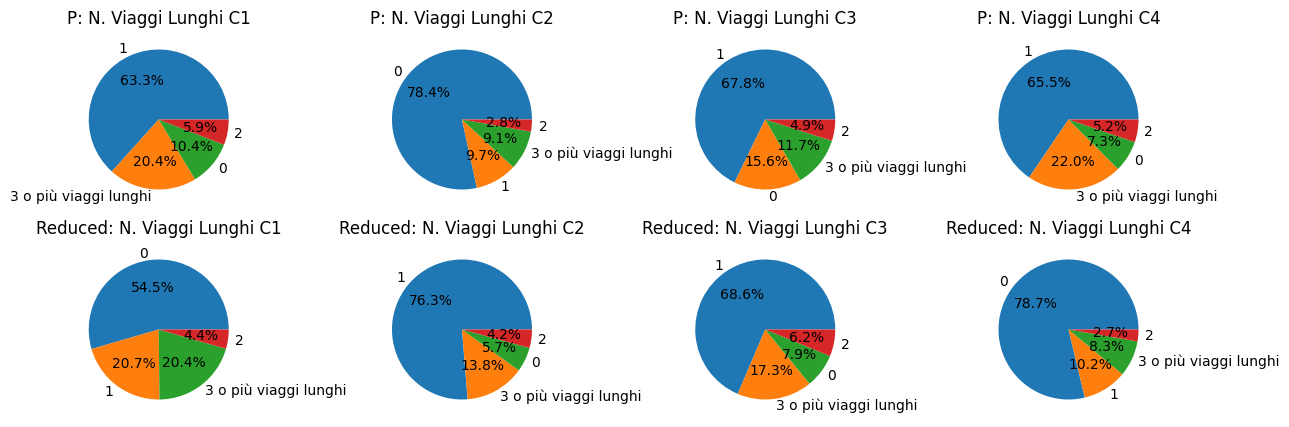

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))

label_mapping5 = {
    'Chi non ne fa viaggi lunghi': '0',
    'Un viaggio lungo all anno': '1',
    '2 viaggi lunghi all anno': '2',
    '3 o più viaggi lunghi0': '3+'
}

def plot_pie_with_short_labels_red(data, ax, title):
    data_pie = data["Numero viaggi lunghi all'anno categoriale"].value_counts().rename(index=label_mapping5)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_red(data_kmode_red1, axes[1, 0], 'Reduced: N. Viaggi Lunghi C1')
plot_pie_with_short_labels_red(data_kmode_red2, axes[1, 1], 'Reduced: N. Viaggi Lunghi C2')
plot_pie_with_short_labels_red(data_kmode_red3, axes[1, 2], 'Reduced: N. Viaggi Lunghi C3')
plot_pie_with_short_labels_red(data_kmode_red4, axes[1, 3], 'Reduced: N. Viaggi Lunghi C4')


def plot_pie_with_short_labels_P2(data, ax, title):
    data_pie = data["Numero viaggi lunghi all'anno categoriale"].value_counts().rename(index=label_mapping5)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_P2(data_kmode1, axes[0, 0], 'P: N. Viaggi Lunghi C1')
plot_pie_with_short_labels_P2(data_kmode2, axes[0, 1], 'P: N. Viaggi Lunghi C2')
plot_pie_with_short_labels_P2(data_kmode3, axes[0, 2], 'P: N. Viaggi Lunghi C3')
plot_pie_with_short_labels_P2(data_kmode4, axes[0, 3], 'P: N. Viaggi Lunghi C4')

plt.show()

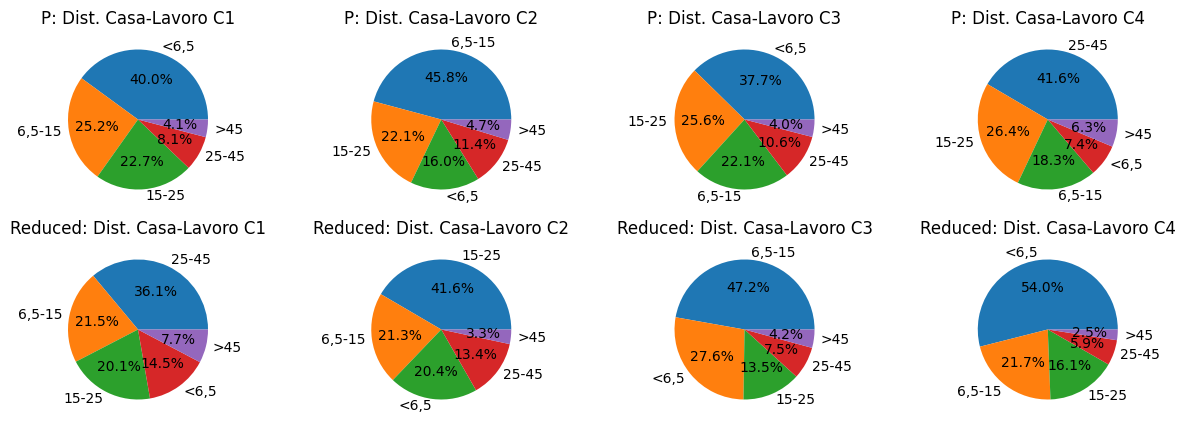

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))

label_mapping6 = {
    'Casa-Lavoro: meno di 6,5 miglia': '<6,5',
    'Casa-Lavoro: tra 6,5 e 15 miglia': '6,5-15',
    'Casa-Lavoro: tra 15 e 25 miglia': '15-25',
    'Casa-Lavoro: tra 25 e 45 miglia': '25-45',
    'Casa-Lavoro: più di 45 miglia': '>45'
}

def plot_pie_with_short_labels_red(data, ax, title):
    data_pie = data["Distanza casa-lavoro categoriale"].value_counts().rename(index=label_mapping6)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_red(data_kmode_red1, axes[1, 0], 'Reduced: Dist. Casa-Lavoro C1')
plot_pie_with_short_labels_red(data_kmode_red2, axes[1, 1], 'Reduced: Dist. Casa-Lavoro C2')
plot_pie_with_short_labels_red(data_kmode_red3, axes[1, 2], 'Reduced: Dist. Casa-Lavoro C3')
plot_pie_with_short_labels_red(data_kmode_red4, axes[1, 3], 'Reduced: Dist. Casa-Lavoro C4')

def plot_pie_with_short_labels_P2(data, ax, title):
    data_pie = data["Distanza casa-lavoro categoriale"].value_counts().rename(index=label_mapping6)
    data_pie.plot.pie(autopct='%1.1f%%', ax=ax, title=title)
    ax.set_ylabel('')

plot_pie_with_short_labels_P2(data_kmode1, axes[0, 0], 'P: Dist. Casa-Lavoro C1')
plot_pie_with_short_labels_P2(data_kmode2, axes[0, 1], 'P: Dist. Casa-Lavoro C2')
plot_pie_with_short_labels_P2(data_kmode3, axes[0, 2], 'P: Dist. Casa-Lavoro C3')
plot_pie_with_short_labels_P2(data_kmode4, axes[0, 3], 'P: Dist. Casa-Lavoro C4')

plt.show()

## 8.2. K-MEANS

### 4 Cluster da R

In [ ]:
data_kmeans = pd.read_csv("/content/drive/MyDrive/Tesi/data_con_cluster.csv", sep=",")
data_kmeans_2 = pd.read_csv("/content/drive/MyDrive/Tesi/data_con_cluster2.csv", sep=",")
data_kmeans_org = pd.read_csv("/content/drive/MyDrive/Tesi/data_con_clusterorg.csv", sep=",")

In [ ]:
data_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 43 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Genere                                                        5796 non-null   object 
 1   Genere_dummy                                                  5796 non-null   int64  
 2   Classe.d.età                                                  5796 non-null   object 
 3   Età                                                           5796 non-null   int64  
 4   Reddito.familiare                                             5796 non-null   int64  
 5   Classe.Reddito.Familiare                                      5796 non-null   object 
 6   Livello.di.istruzione                                         5796 non-null   object 
 7   Livello.di.istruzione.num                                     5796 no

In [ ]:
selected_data2 = data_kmeans_2.iloc[:, [0, 2, 13, 33,32, 36, 37,38,39, 42]]


In [ ]:
selected_data = data_kmeans_2.iloc[:, [0, 2, 5,6,8,9,10,11,13, 27,28,29,30,42]]


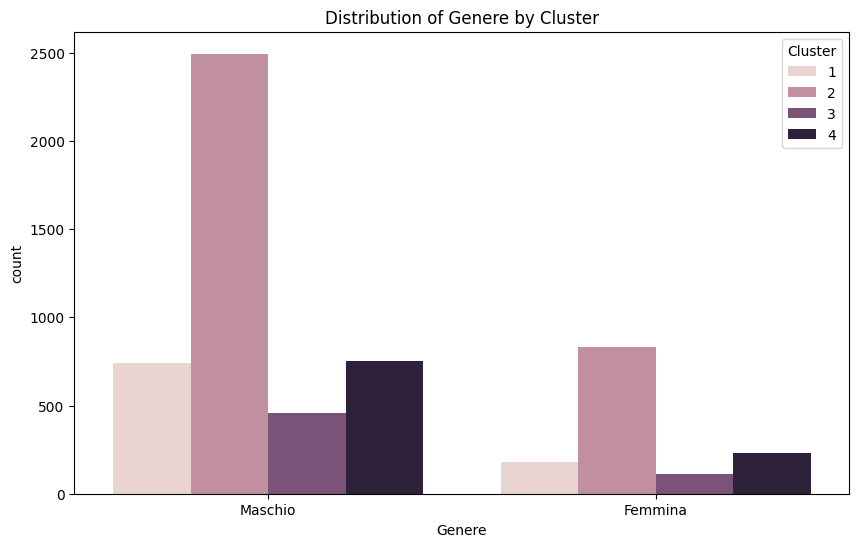

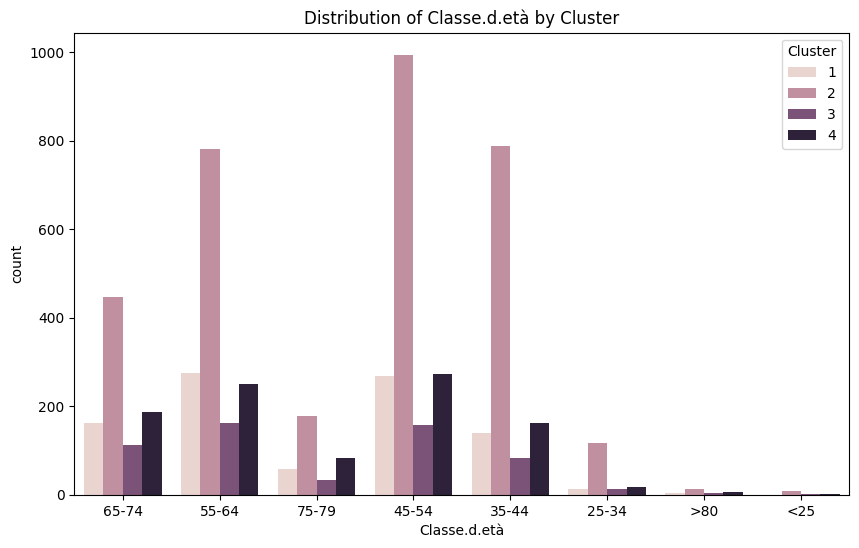

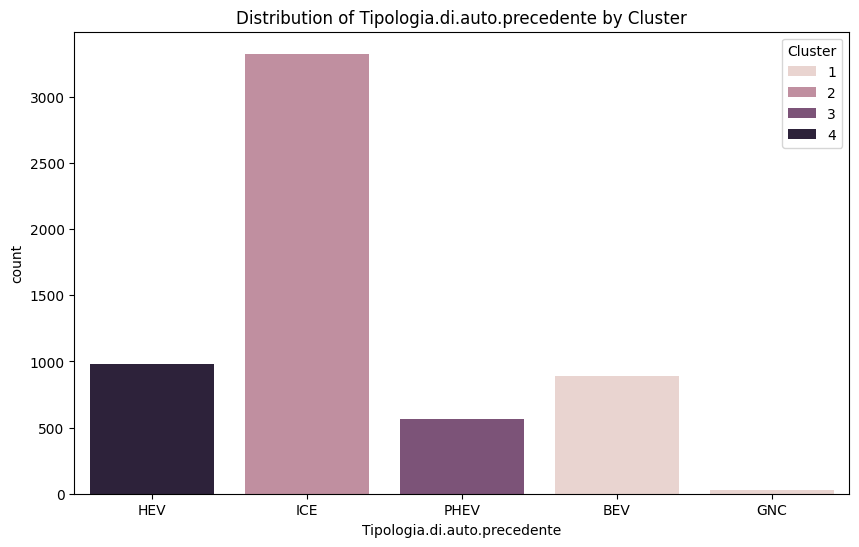

<Figure size 1000x600 with 0 Axes>

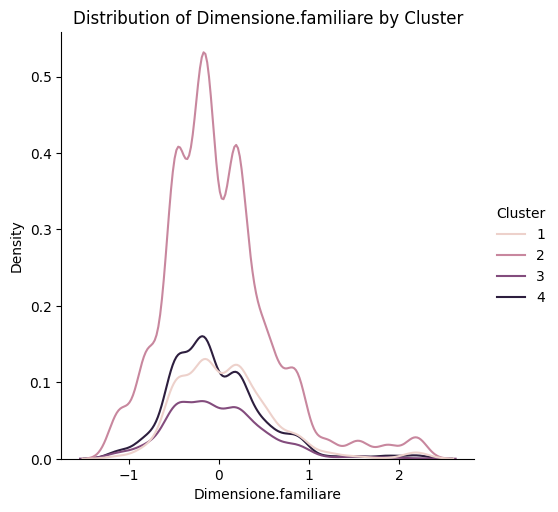

<Figure size 1000x600 with 0 Axes>

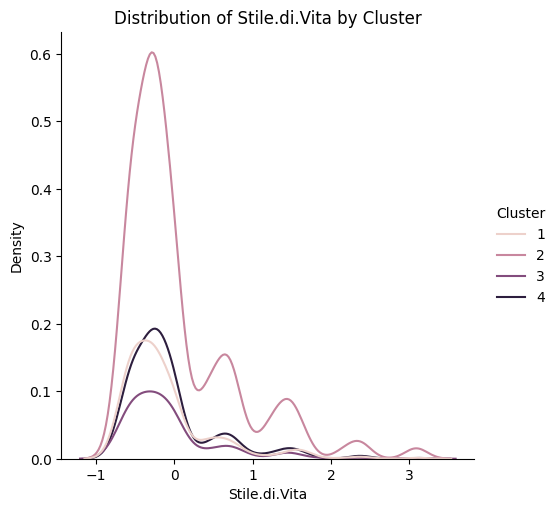

<Figure size 1000x600 with 0 Axes>

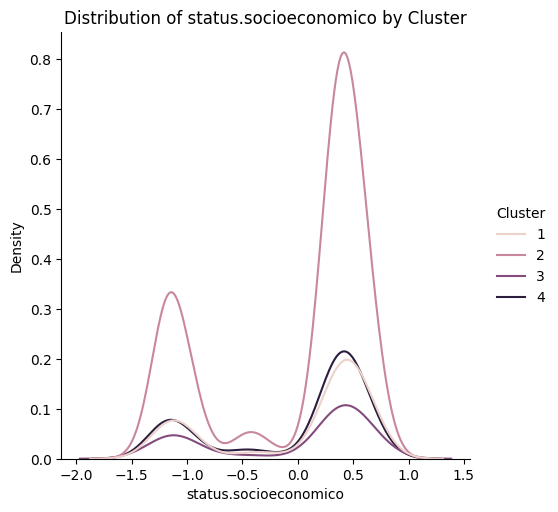

<Figure size 1000x600 with 0 Axes>

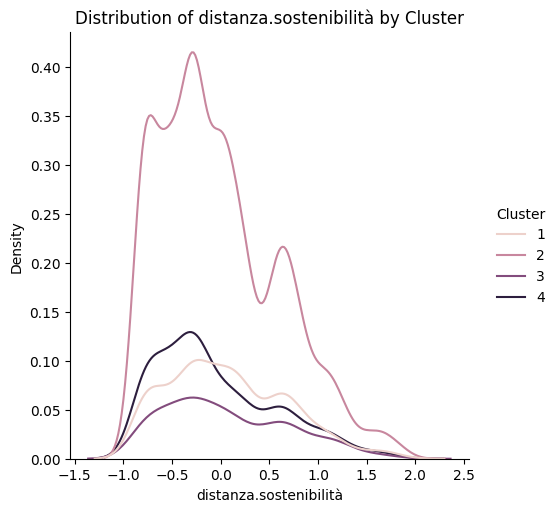

<Figure size 1000x600 with 0 Axes>

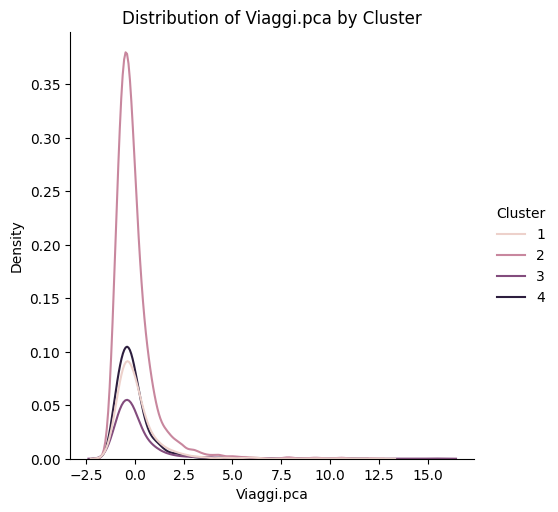

<Figure size 1000x600 with 0 Axes>

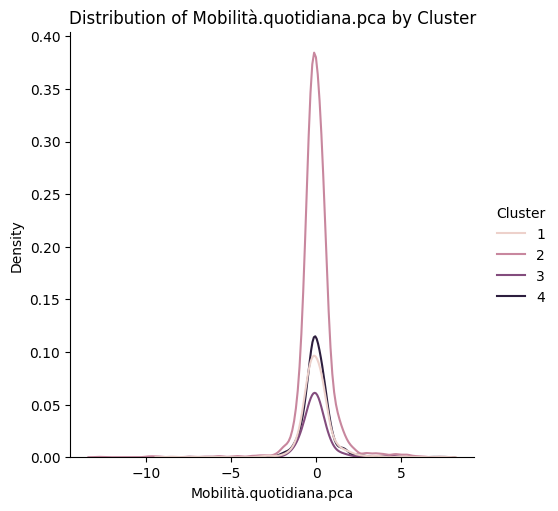

In [ ]:
for col in data_kmeans_2.columns:
  if col != 'Cluster':
    plt.figure(figsize=(10, 6))
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(selected_data2[col]):
        sns.displot(data=selected_data2, x=col, hue='Cluster', kind="kde")
    else:
        # For categorical columns, use a different plot type, e.g., countplot
        sns.countplot(data=selected_data2, x=col, hue='Cluster')
    plt.title(f'Distribution of {col} by Cluster')
    plt.show()

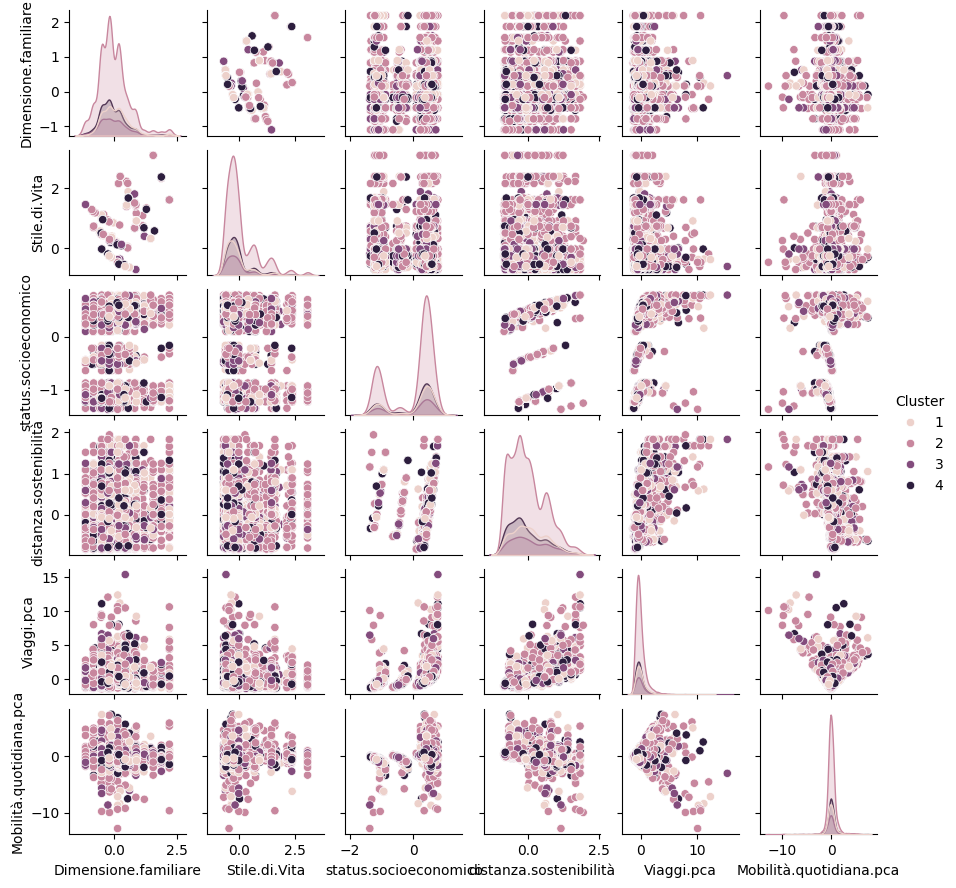

In [ ]:
sns.pairplot(selected_data2, hue='Cluster',height=1.5)

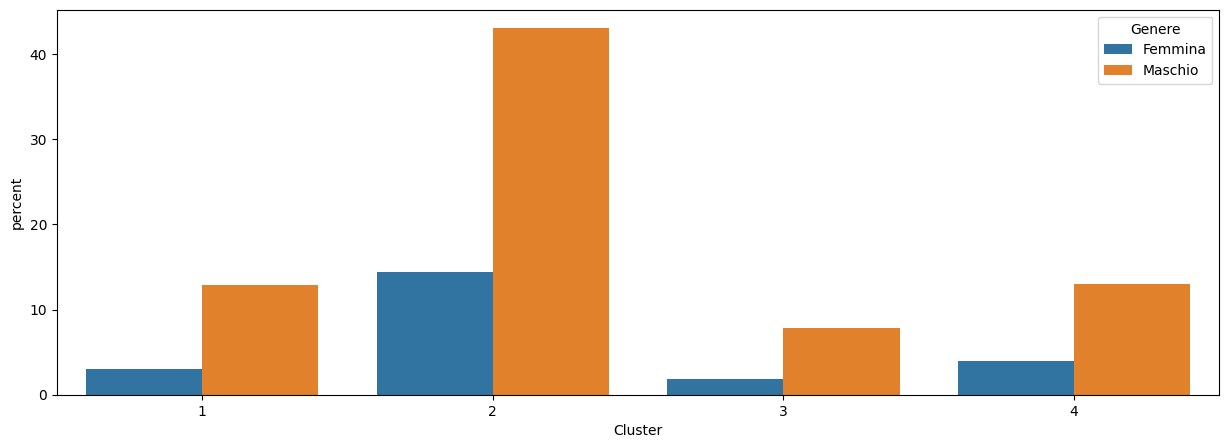

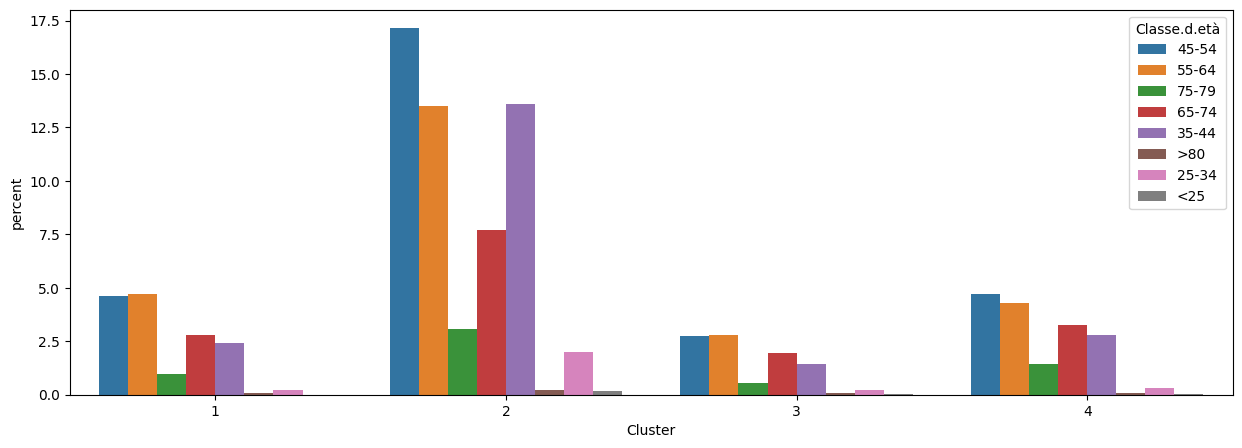

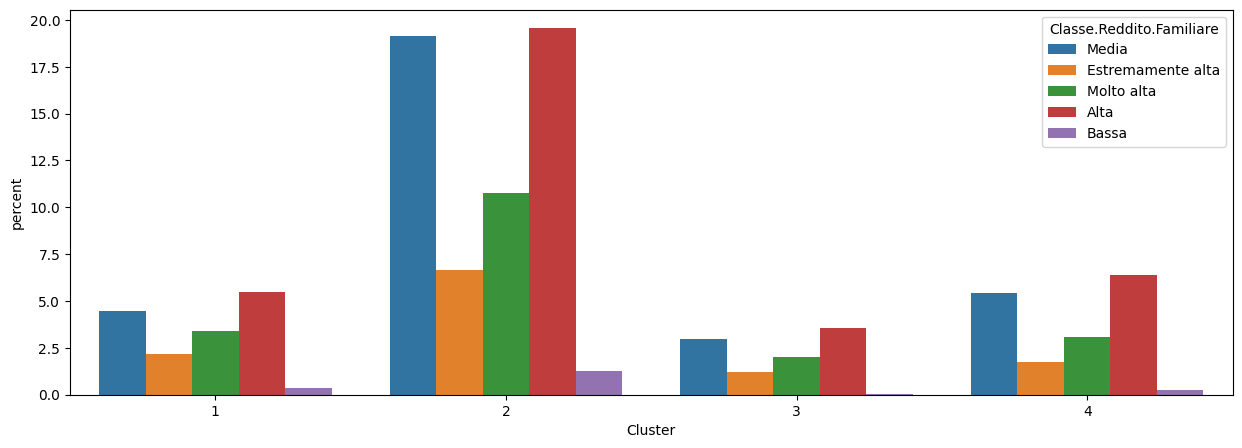

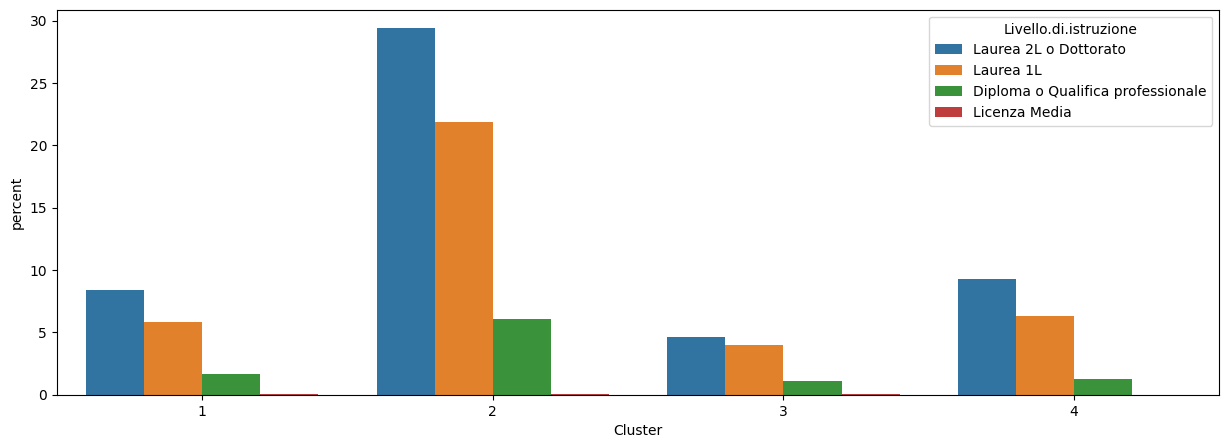

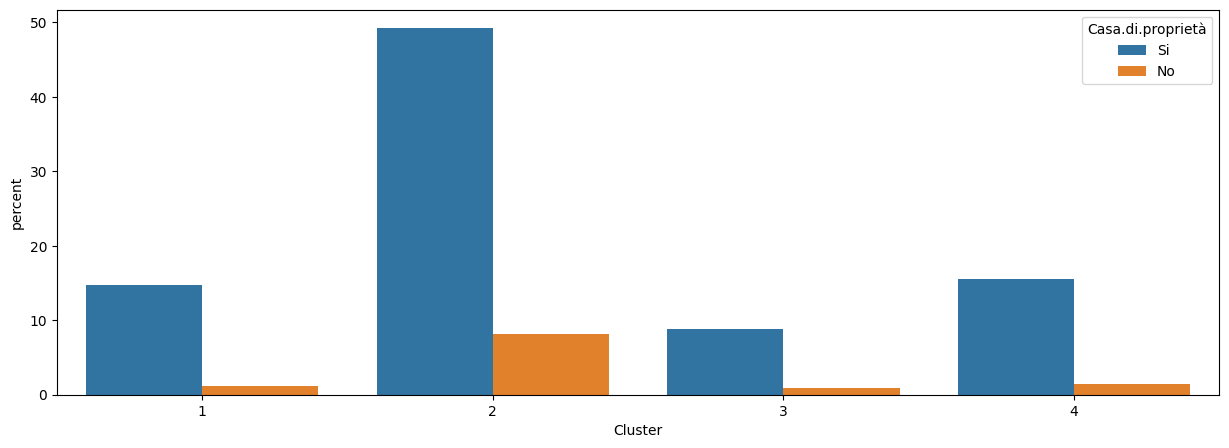

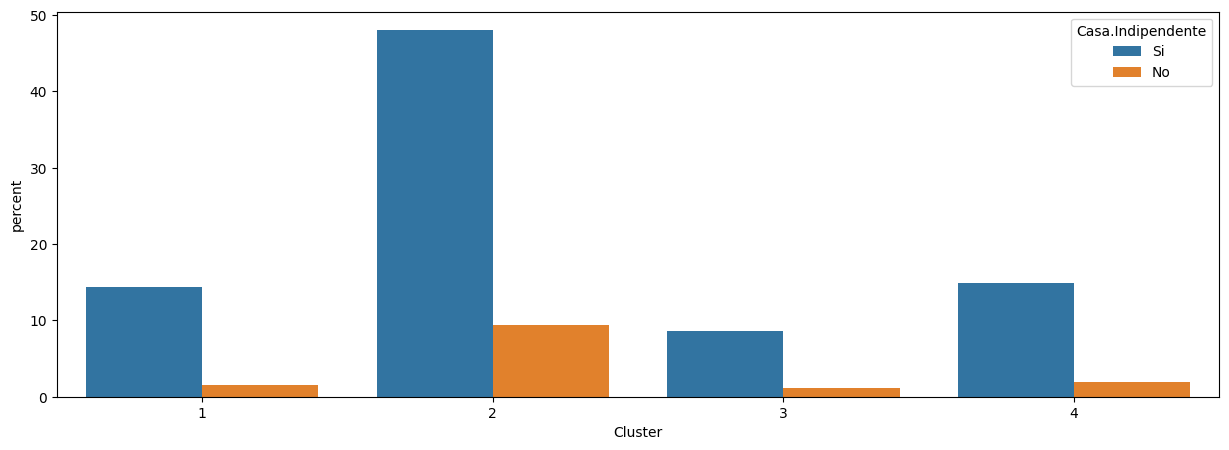

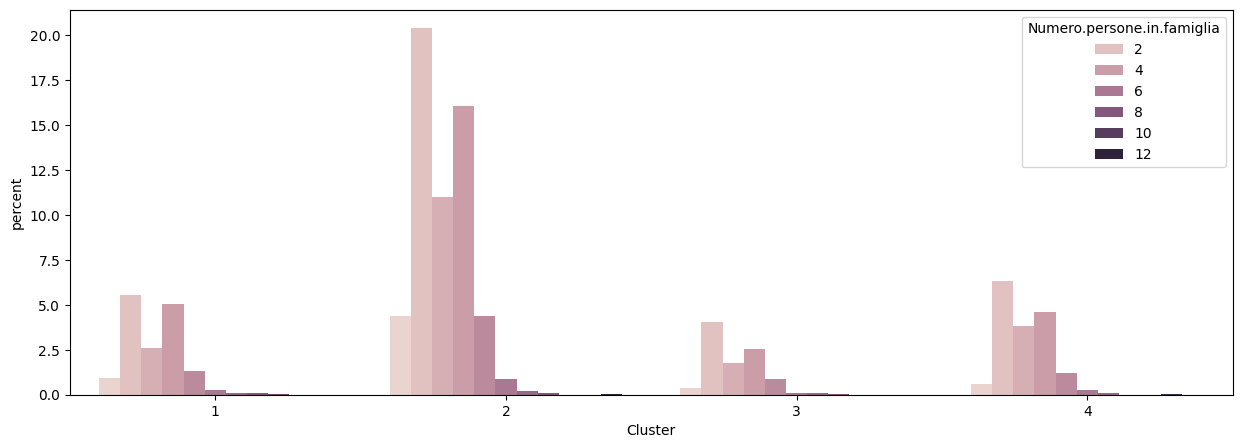

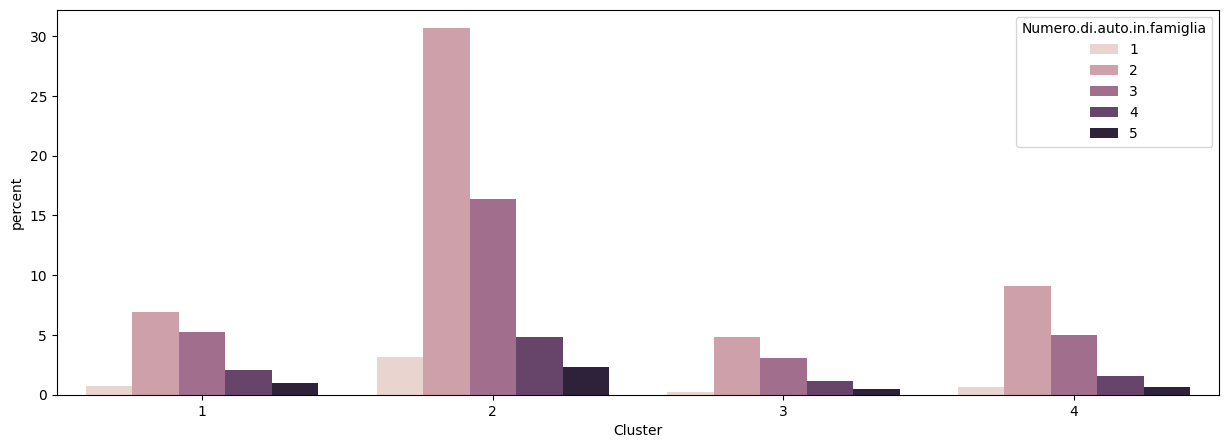

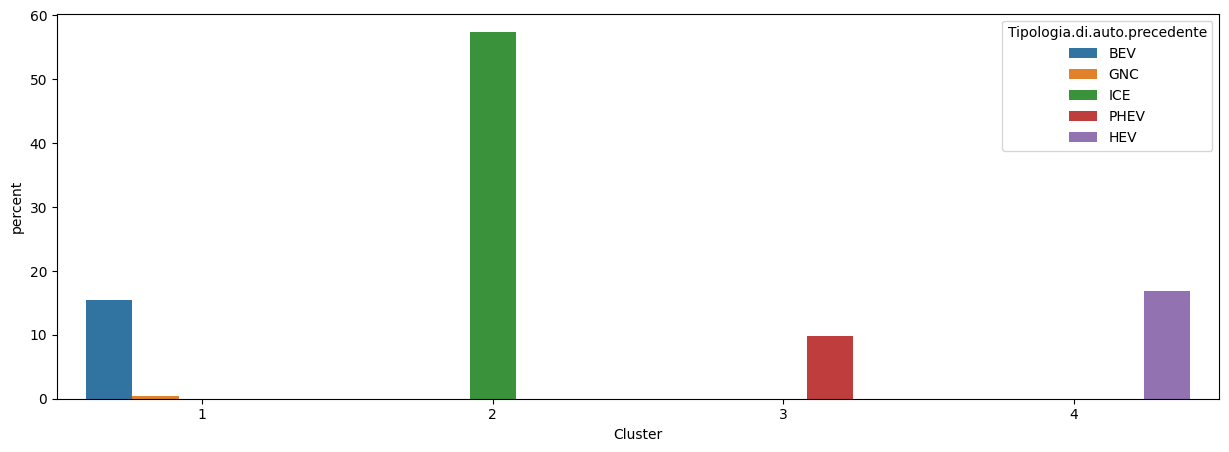

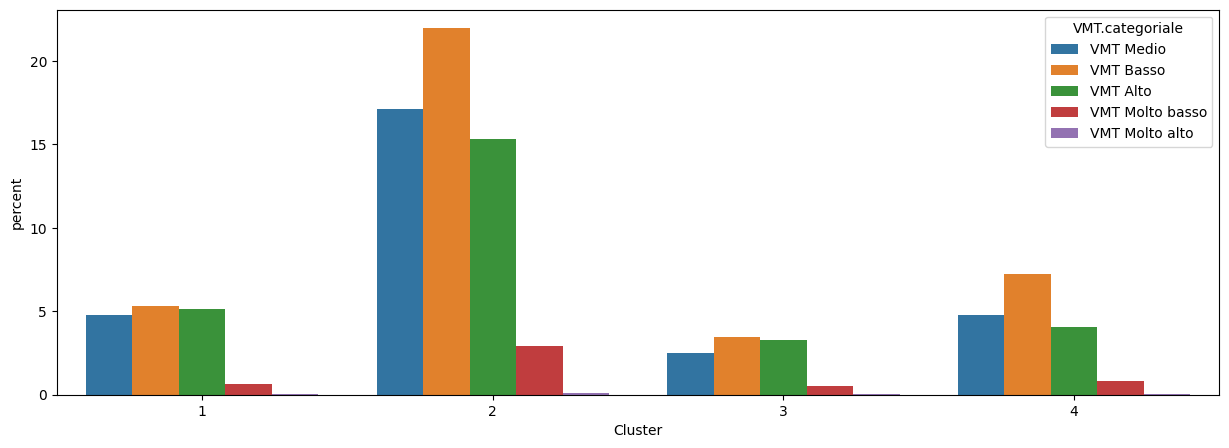

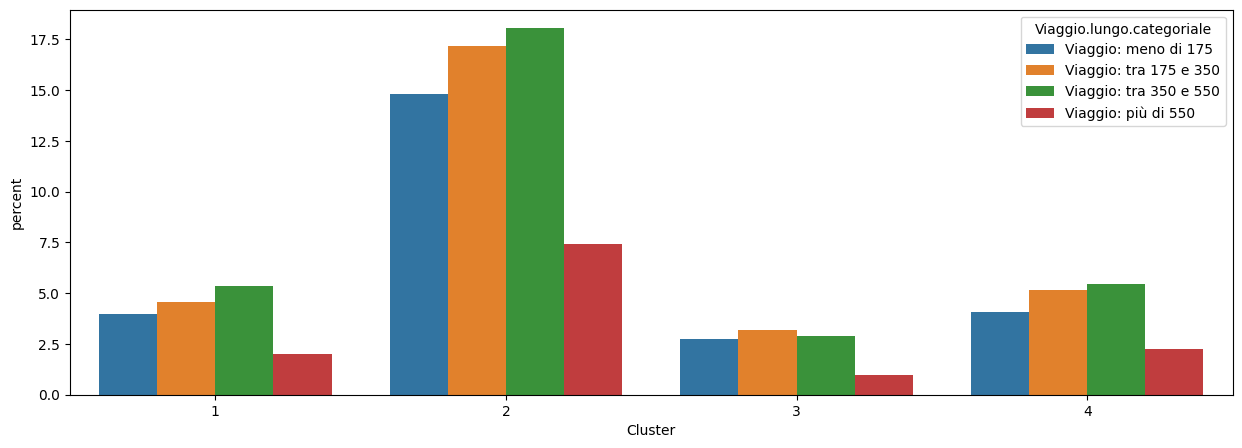

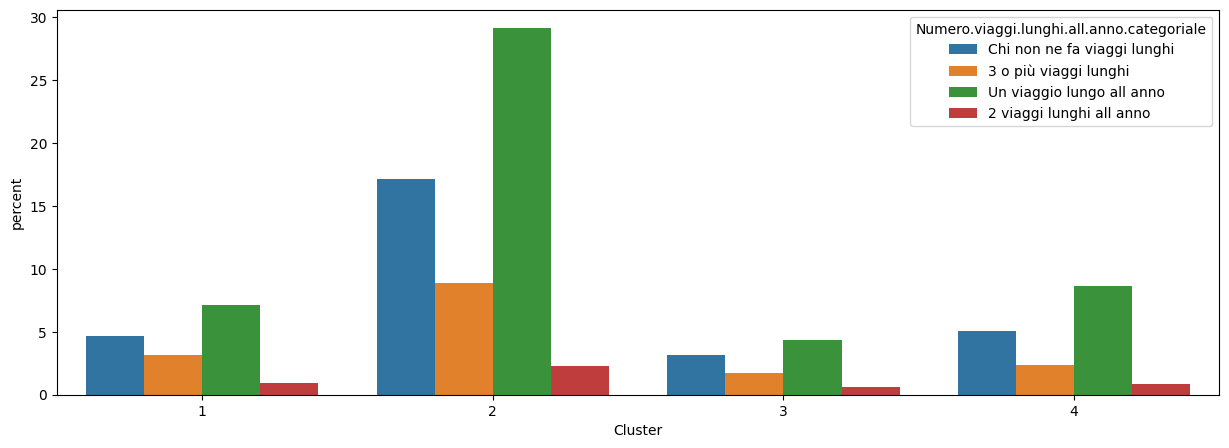

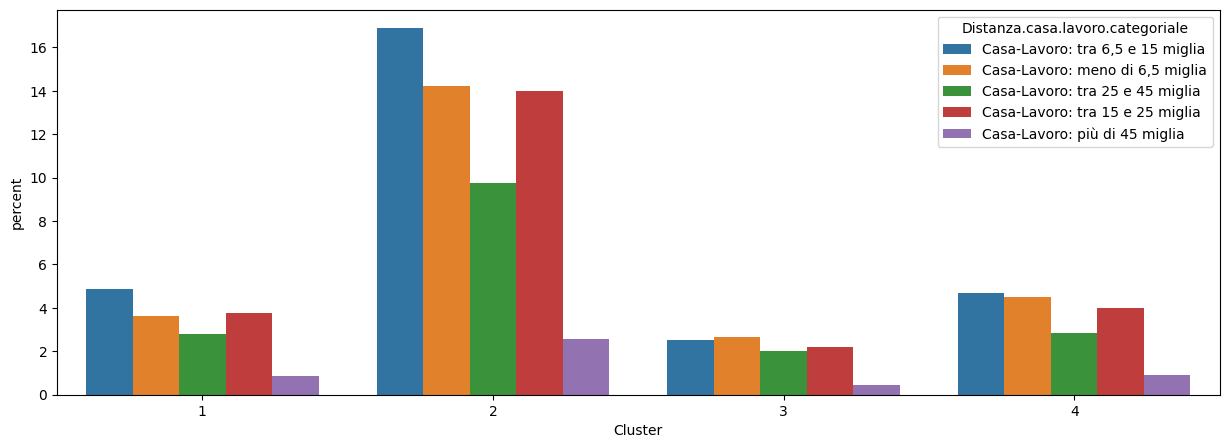

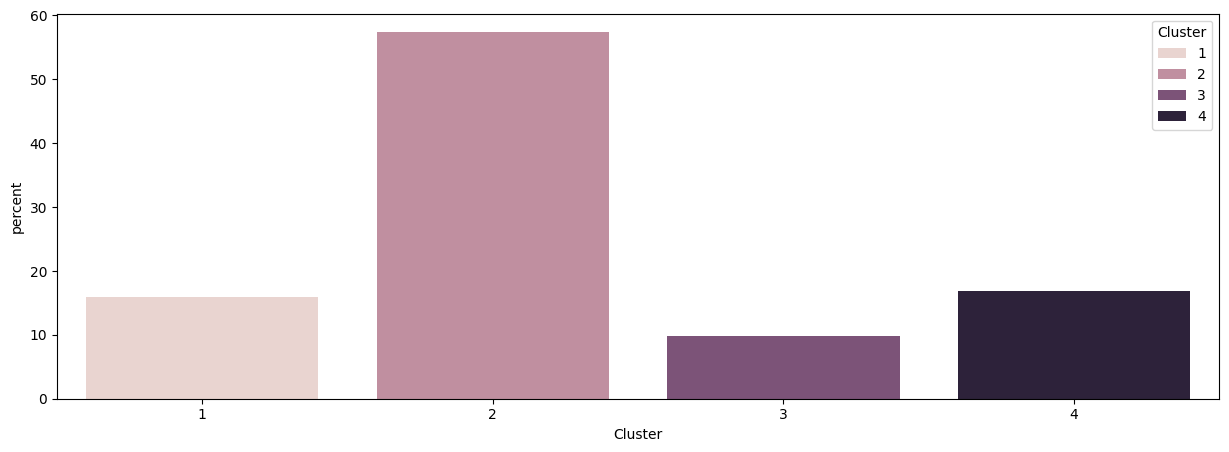

In [ ]:
all_features = selected_data.columns.tolist()

#cluster_0_data = data_BEV[data_BEV['Cluster'] == 2]

for col in all_features:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='Cluster',hue=col, data = selected_data, stat="percent")
    plt.show()

## 8.3 K Prototype

In [ ]:
dataKP = data2.copy()
dataKP = dataKP[dataKP['BEV dummy'] == 1]
dataKP.drop(columns=["BEV dummy", "Tipologia di auto precedente: BEV vs PHEV", "Tipologia di auto precedente: HEV vs PHEV", "Tipologia di auto precedente: GNC vs PHEV",
                     "Tipologia di auto precedente: ICE vs PHEV", "Livello di istruzione: Licenza media vs Laurea 2L o Dottorato", "Livello di istruzione: Diploma o Qualifica professionale vs Laurea 2L o Dottorato",
                     "Livello di istruzione: Laurea 1L vs Laurea 2L o Dottorato", "Classe d'età: <25 vs 35-44", "Classe d'età: 25-34 vs 35-44", "Classe d'età: 45-54 vs 35-44", "Classe d'età: 55-64 vs 35-44",
                     "Classe d'età: 65-74 vs 35-44", "Classe d'età: 75-79 vs 35-44", "Classe d'età: >80 vs 35-44", "Tipologia di auto precedente: BEV vs PHEV", "Tipologia di auto precedente: HEV vs PHEV",
                     "Tipologia di auto precedente: GNC vs PHEV", "Tipologia di auto precedente: ICE vs PHEV", "Classe Reddito Familiare: Bassa vs Media", "Classe Reddito Familiare: Alta vs Media",
                     "Classe Reddito Familiare: Molto alta vs Media", "Classe Reddito Familiare: Estremamente alta vs Media", "Auto attuale", "Reddito familiare"], inplace=True)

dataKP

<ipython-input-130-a1d6a8e65f7f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataKP.drop(columns=["BEV dummy", "Tipologia di auto precedente: BEV vs PHEV", "Tipologia di auto precedente: HEV vs PHEV", "Tipologia di auto precedente: GNC vs PHEV",


Genere Classe d'età Classe Reddito Familiare  \
284         1        65-74        Estremamente alta   
286         1        55-64                    Media   
287         1        75-79               Molto alta   
289         1        55-64                     Alta   
290         1        45-54               Molto alta   
...       ...          ...                      ...   
10679       1        45-54               Molto alta   
10680       1        35-44                    Media   
10682       1        25-34                     Alta   
10686       0        55-64               Molto alta   
10687       1        55-64                    Media   

                   Livello di istruzione  Casa di proprietà  \
284                Laurea 2L o Dottorato                  1   
286                            Laurea 1L                  1   
287                Laurea 2L o Dottorato                  1   
289                Laurea 2L o Dottorato                  1   
290                            Laurea 1L                  1   
...                                  ...                ...   
10679              Laurea 2L o Dottorato                  1   
10680                          Laurea 1L                  1   
10682  Diploma o Qualifica professionale                  0   
10686                          Laurea 1L                  1   
10687              Laurea 2L o Dottorato                  1   

       Casa Indipendente  Numero persone in famiglia  \
284                    1                         2.0   
286                    1                         2.0   
287                    1                         3.0   
289                    1                         2.0   
290                    1                         5.0   
...                  ...                         ...   
10679                  1                         3.0   
10680                  1                         4.0   
10682                  0                         2.0   
10686                  1                         4.0   
10687                  1                         4.0   

       Numero di auto in famiglia  \
284                           3.0   
286                           3.0   
287                           5.0   
289                           2.0   
290                           2.0   
...                           ...   
10679                         2.0   
10680                         2.0   
10682                         2.0   
10686                         2.0   
10687                         4.0   

       Importanza di ridurre le emissioni di gas serra  \
284                                               2.63   
286                                              -2.97   
287                                               2.87   
289                                               1.58   
290                                               2.57   
...                                                ...   
10679                                             2.36   
10680                                             2.57   
10682                                             2.74   
10686                                             0.03   
10687                                             2.97   

      Tipologia di auto precedente Tipologia di auto attuale  \
284                            HEV                       BEV   
286                            ICE                       BEV   
287                            ICE                       BEV   
289                            HEV                       BEV   
290                            ICE                       BEV   
...                            ...                       ...   
10679                          HEV                       BEV   
10680                          ICE                       BEV   
10682                         PHEV                       BEV   
10686                          BEV                       BEV   
10687                          BEV                       BEV   

     

In [ ]:
categorical_features_indices = [dataKP.columns.get_loc(col) for col in dataKP.select_dtypes(include=['object', 'category']).columns]

# Apply KPrototypes with categorical features specified
kproto = KPrototypes(n_clusters=4, init='Cao', n_jobs=-1)  # Use all CPU cores if possible
clusters = kproto.fit_predict(dataKP, categorical=categorical_features_indices)
dataKP.insert(0, "Cluster", clusters, True)

In [ ]:
dataKP.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5796 entries, 284 to 10687
Data columns (total 16 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Cluster                                                       5796 non-null   uint16 
 1   Genere                                                        5796 non-null   int64  
 2   Classe d'età                                                  5796 non-null   object 
 3   Classe Reddito Familiare                                      5796 non-null   object 
 4   Livello di istruzione                                         5796 non-null   object 
 5   Casa di proprietà                                             5796 non-null   int64  
 6   Casa Indipendente                                             5796 non-null   int64  
 7   Numero persone in famiglia                                    5796 non-

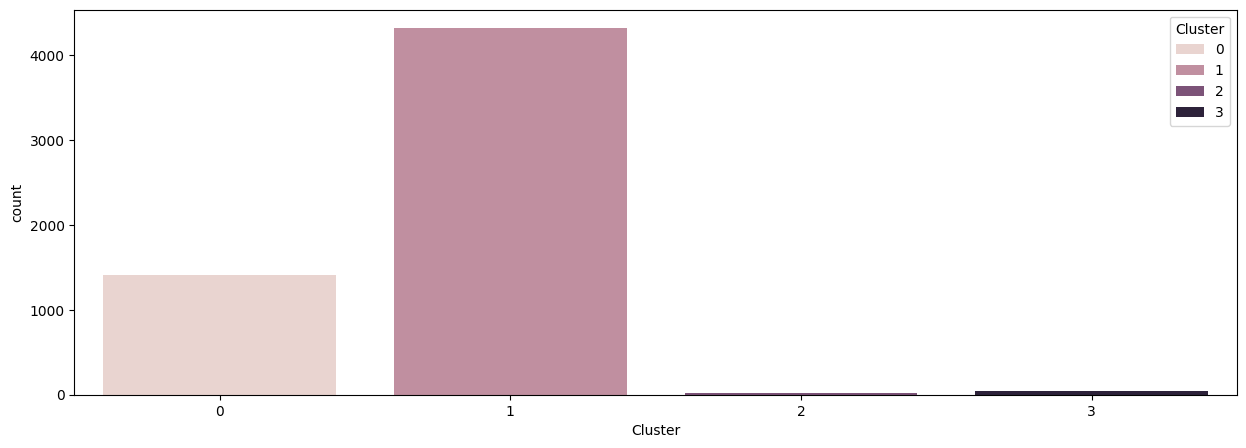

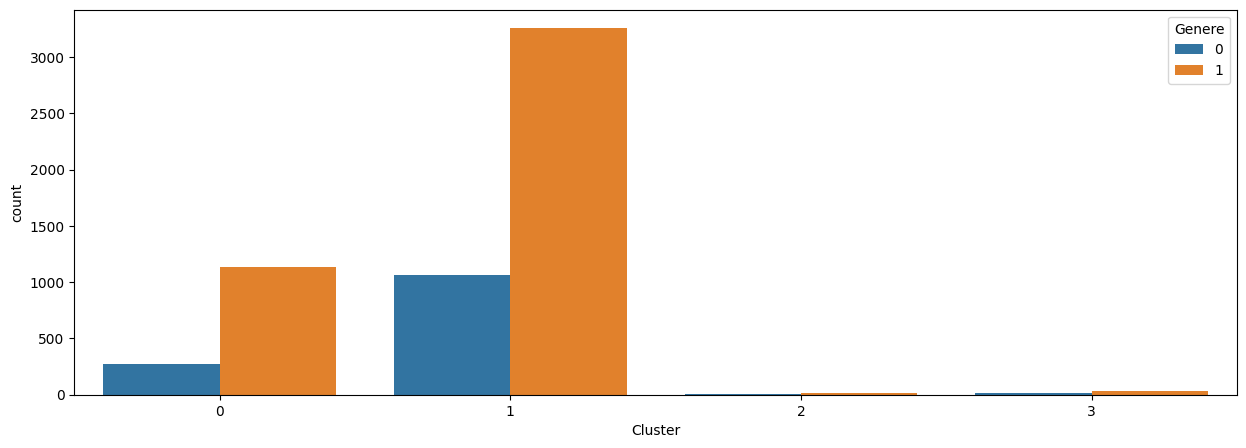

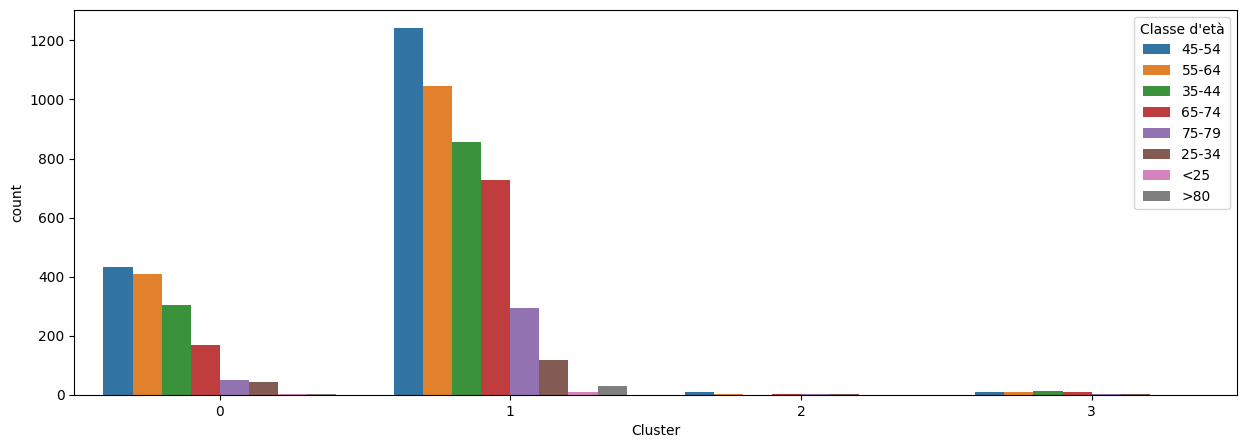

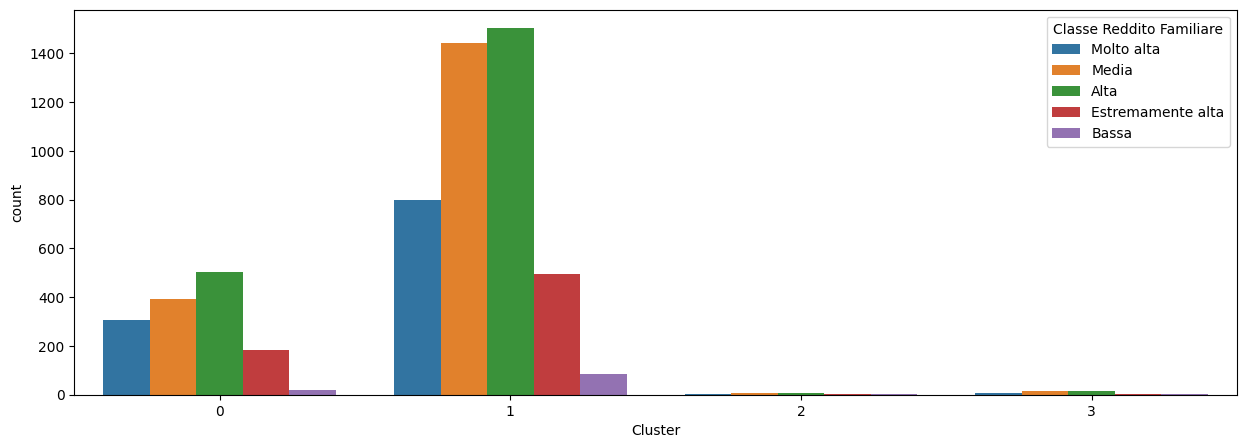

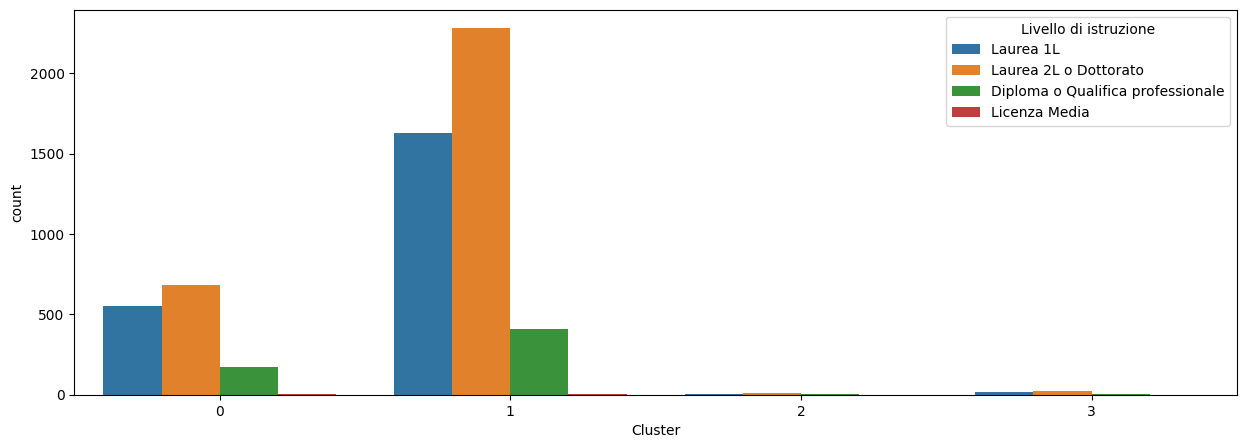

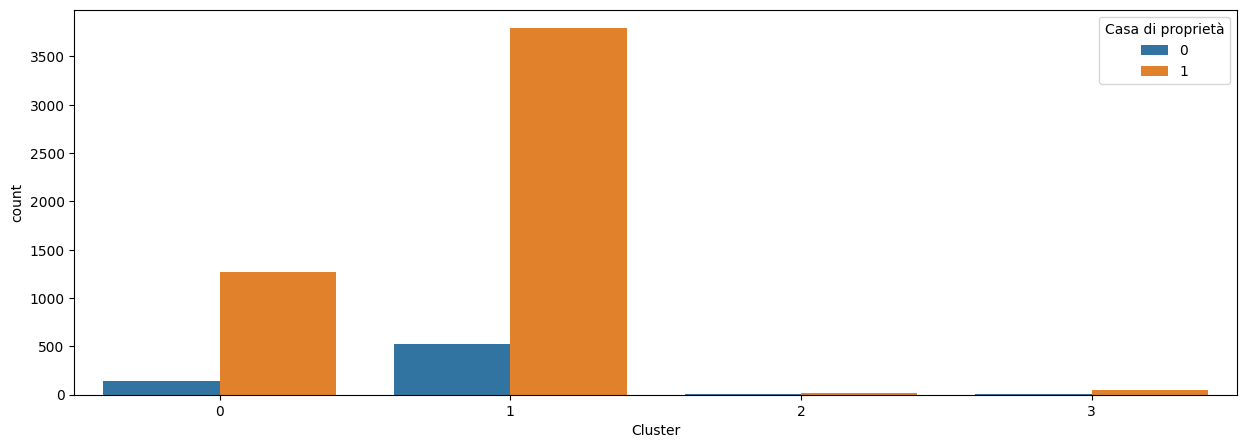

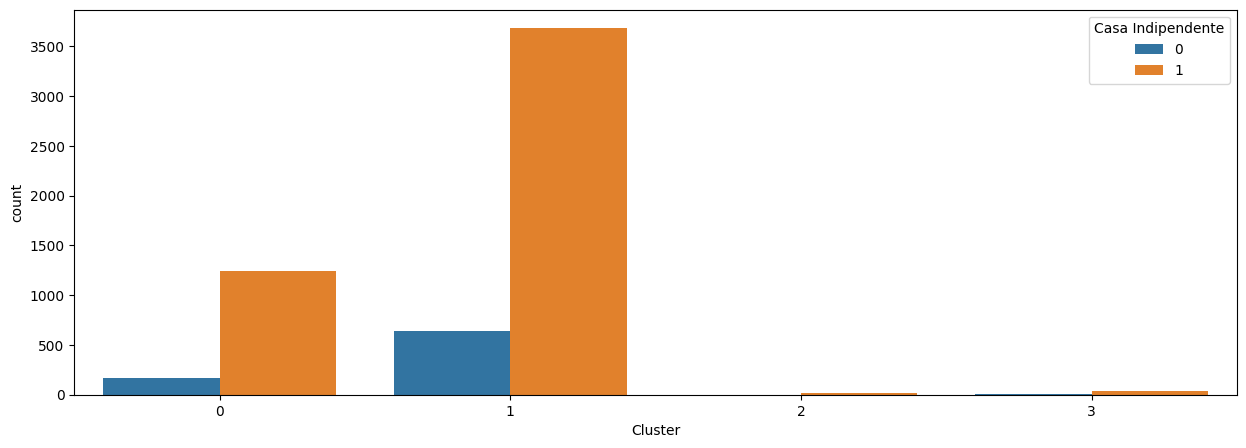

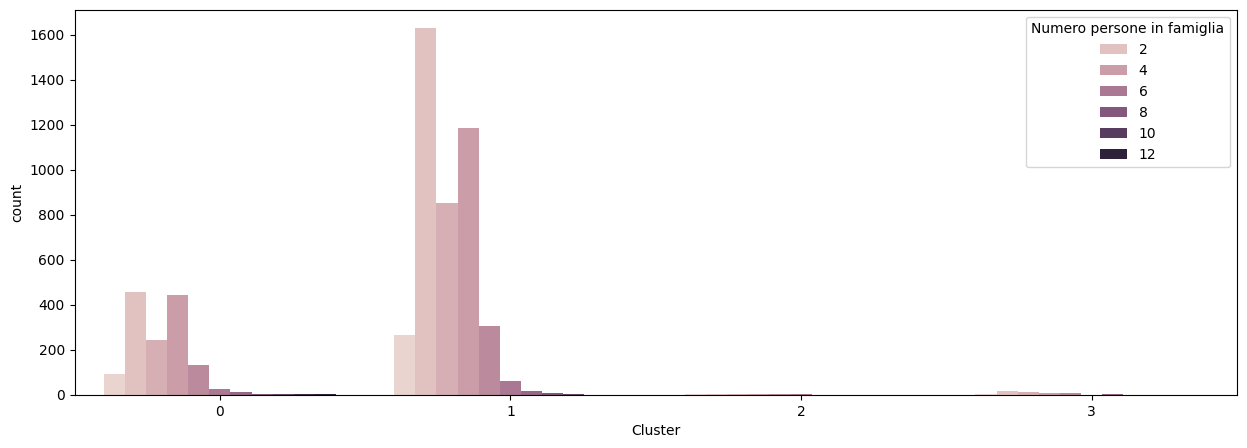

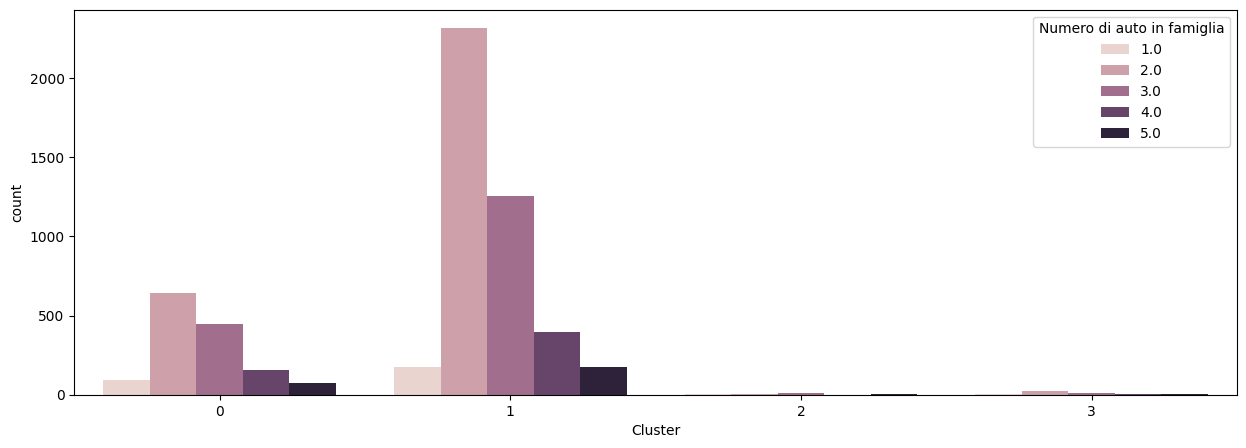

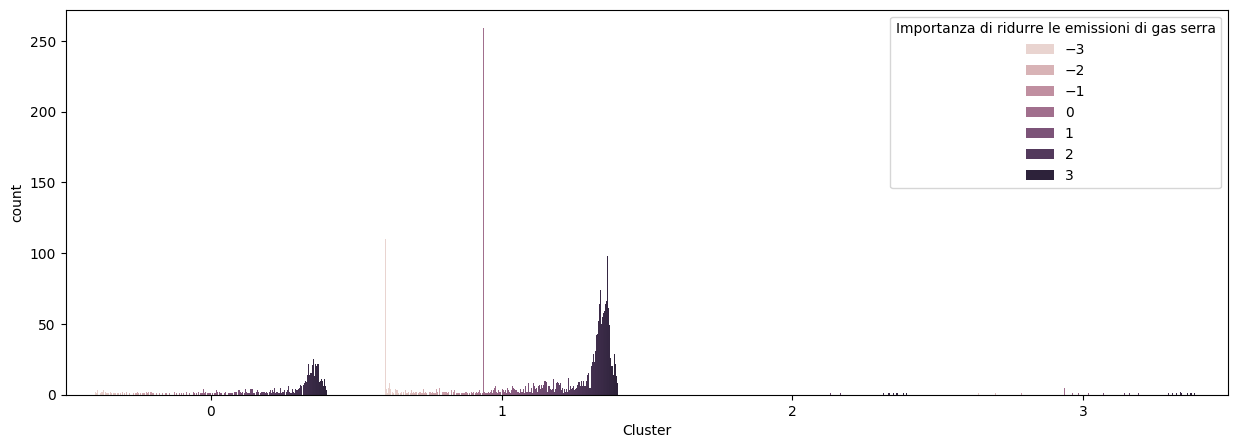

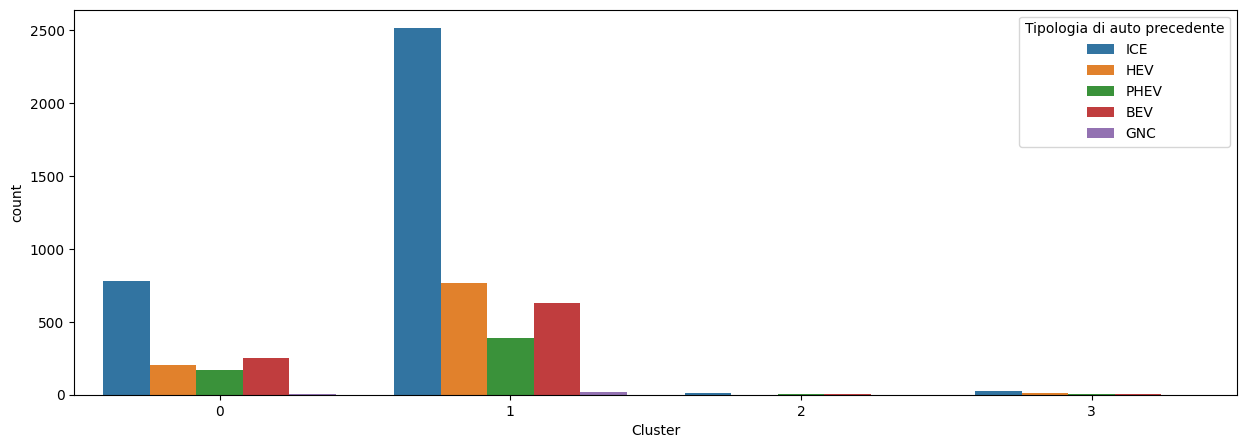

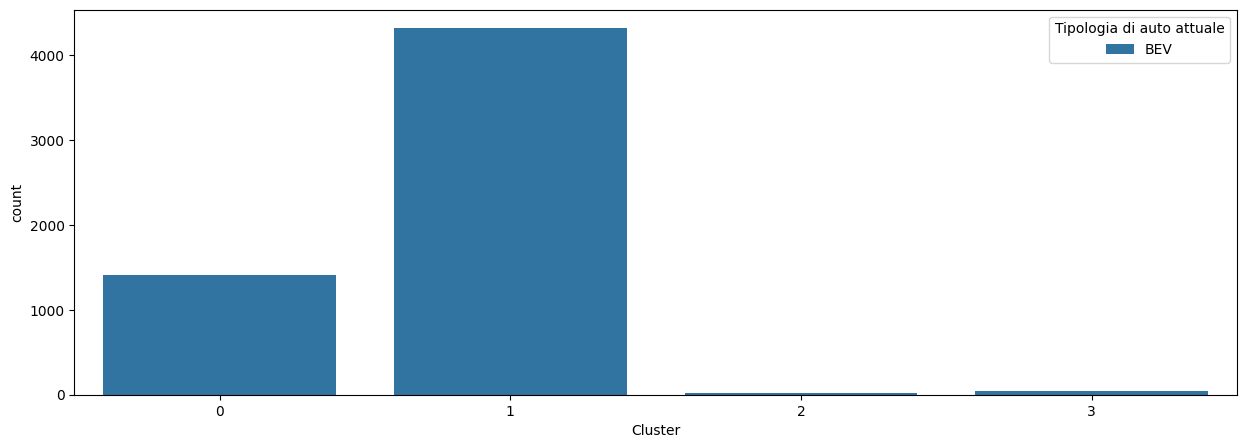

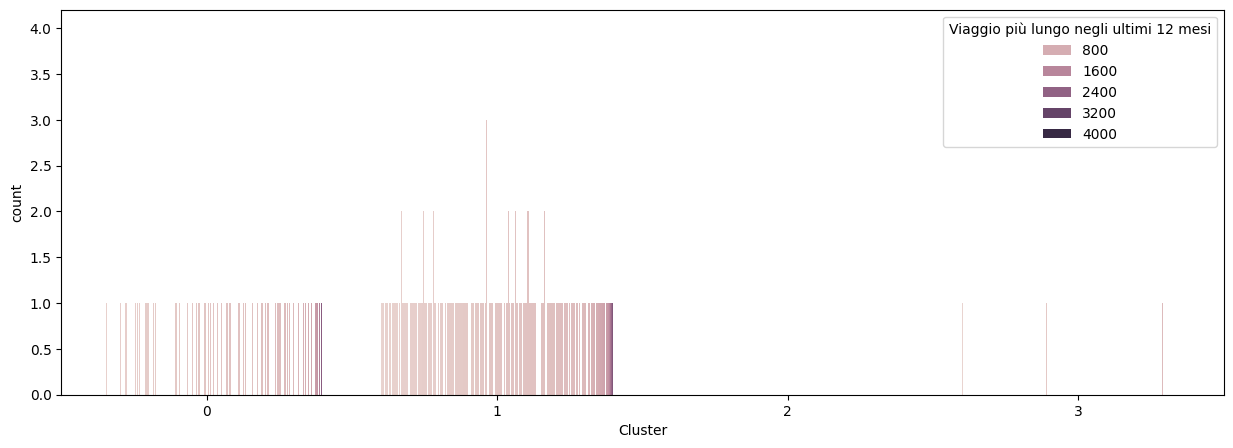

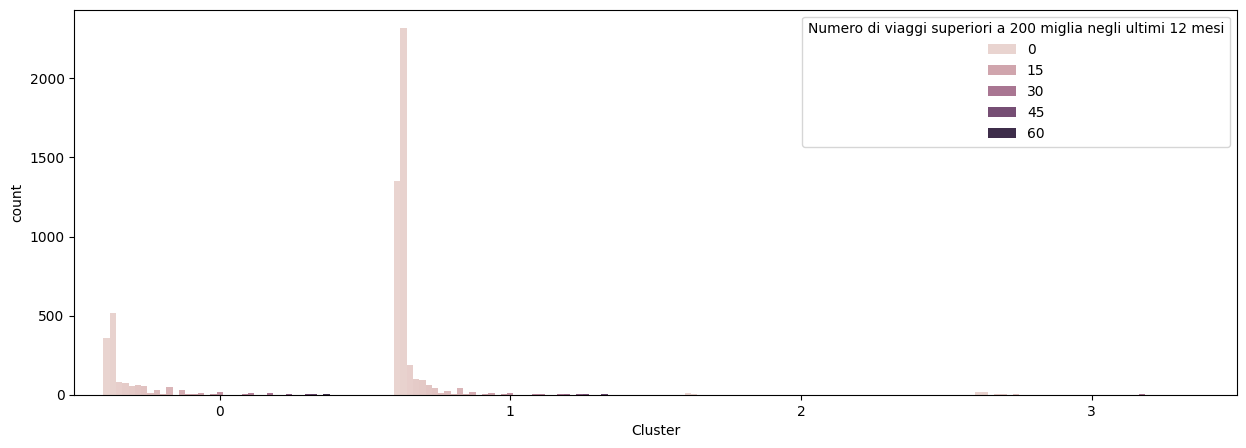

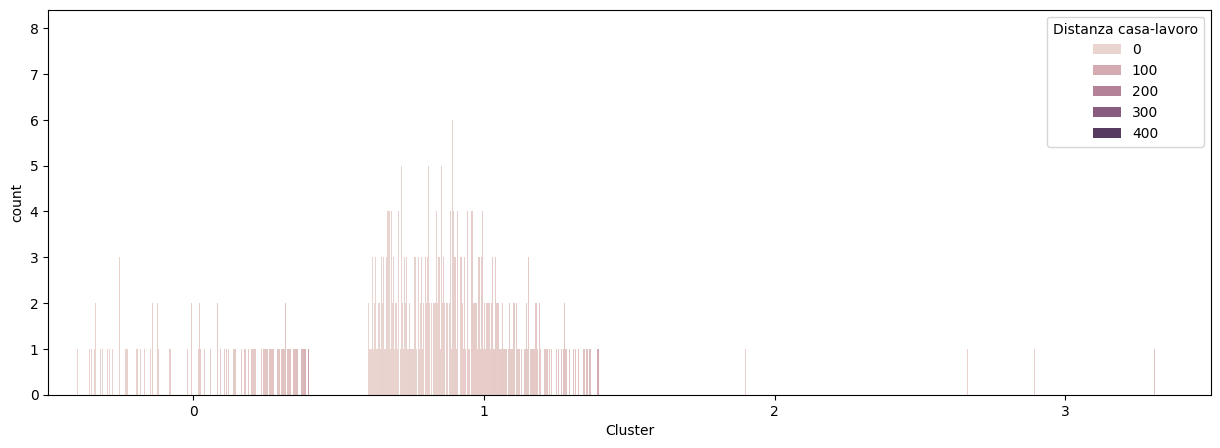

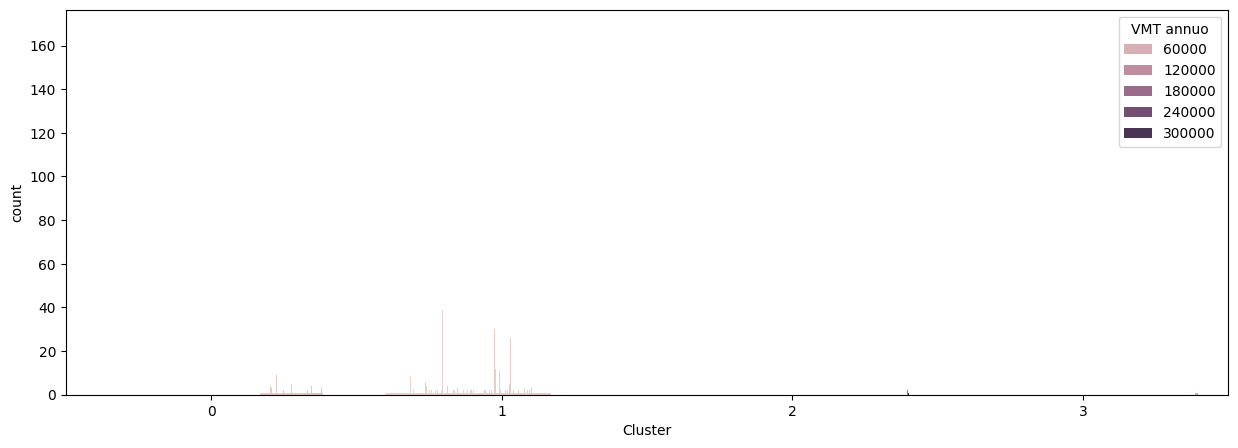

In [ ]:
all_features = dataKP.columns.tolist()
#cluster_0_data = data_BEV[data_BEV['Cluster'] == 2]
for col in all_features:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='Cluster',hue=col, data = dataKP)
    plt.show()

## Gerarchico

In [ ]:
data_ricercatore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 36 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Genere_                                                       10695 non-null  object 
 1   Genere                                                        10695 non-null  int64  
 2   Età                                                           10695 non-null  int64  
 3   Classe d'età                                                  10695 non-null  object 
 4   Classe d'età: <25 vs 45-54                                    10695 non-null  int64  
 5   Classe d'età: 25-34 vs 45-54                                  10695 non-null  int64  
 6   Classe d'età: 35-44 vs 45-54                                  10695 non-null  int64  
 7   Classe d'età: 55-64 vs 45-54                                  10695

In [ ]:
data_ger = data_ricercatore.drop(columns=['Genere_', 'Età', "Classe d'età", 'Reddito familiare', "Classe Reddito Familiare", "Livello di istruzione", "Auto", "Tipologia"])

In [ ]:
data_ger.head()

Genere  Classe d'età: <25 vs 45-54  Classe d'età: 25-34 vs 45-54  \
0       0                           0                             0   
1       0                           0                             0   
2       0                           0                             0   
3       0                           0                             0   
4       0                           0                             0   

   Classe d'età: 35-44 vs 45-54  Classe d'età: 55-64 vs 45-54  \
0                             0                             0   
1                             0                             0   
2                             0                             1   
3                             0                             0   
4                             0                             0   

   Classe d'età: 65-74 vs 45-54  Classe d'età: 75-79 vs 45-54  \
0                             1                             0   
1                             1                             0   
2                             0                             0   
3                             0                             1   
4                             0                             0   

   Classe d'età: >80 vs 45-54  Classe Reddito Familiare: Medio-Bassa vs Media  \
0                           0                                               0   
1                           0                                               0   
2                           0                                               0   
3                           0                                               0   
4                           0                                               0   

   Classe Reddito Familiare: Medio-Alta vs Media  ...  Auto precedente: PHEV  \
0                                              1  ...                      1   
1                                              1  ...                      0   
2                                              0  ...                      1   
3                                              0  ...                      0   
4                                              1  ...                      0   

   Auto precedente: BEV  Auto precedente: HEV  Auto precedente: GNC  \
0                     0                     0                     0   
1                     0                     1                     0   
2                     0                     0                     0   
3                     0                     1                     0   
4                     0                     1                     0   

   Auto precedente: ICE  Importanza di ridurre le emissioni di gas serra  \
0                     0                                             2,52   
1                     0                                             2,76   
2                     0                                              2,6   
3                     0                                             1,23   
4                     0                                             1,08   

   Viaggio più lungo negli ultimi 12 mesi  \
0                                  483.14   
1                                  568.09   
2                                  255.16   
3                                  312.78   
4                                  125.79   

   Numero di viaggi superiori a 200 miglia negli ultimi 12 mesi  \
0                                                0.0              
1                                                1.0              
2                                                0.0              
3                                                1.0              
4                                                1.0              

   Distanza casa-lavoro    VMT annuo  
0                  0.01        14622  
1                 10.69  9197,142857  
2                 17.63  5082,352941  
3                  3.53  13025,45455  
4                 28.05        18000  

[5 rows x 28 columns]

In [ ]:
data_BEV_ger = data_ger[data_ger['BEV dummy'] == 1]

In [ ]:
data_BEV_ger.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5802 entries, 284 to 10694
Data columns (total 28 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Genere                                                        5802 non-null   int64  
 1   Classe d'età: <25 vs 45-54                                    5802 non-null   int64  
 2   Classe d'età: 25-34 vs 45-54                                  5802 non-null   int64  
 3   Classe d'età: 35-44 vs 45-54                                  5802 non-null   int64  
 4   Classe d'età: 55-64 vs 45-54                                  5802 non-null   int64  
 5   Classe d'età: 65-74 vs 45-54                                  5802 non-null   int64  
 6   Classe d'età: 75-79 vs 45-54                                  5802 non-null   int64  
 7   Classe d'età: >80 vs 45-54                                    5802 non-

In [ ]:
for column in data_BEV_ger.columns:
    # Check if the column is of object type (likely string)
    if data_BEV_ger[column].dtype == 'object':
        # Attempt to convert the column to numeric, replacing commas with periods
        try:
            data_BEV_ger[column] = pd.to_numeric(data_BEV_ger[column].str.replace(',', '.'))
        except ValueError:
            # If conversion fails for any reason, print a warning and skip the column
            print(f"Warning: Could not convert column '{column}' to numeric. Skipping.")

<ipython-input-35-c55c511c37e3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_BEV_ger[column] = pd.to_numeric(data_BEV_ger[column].str.replace(',', '.'))


In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data_BEV_ger)

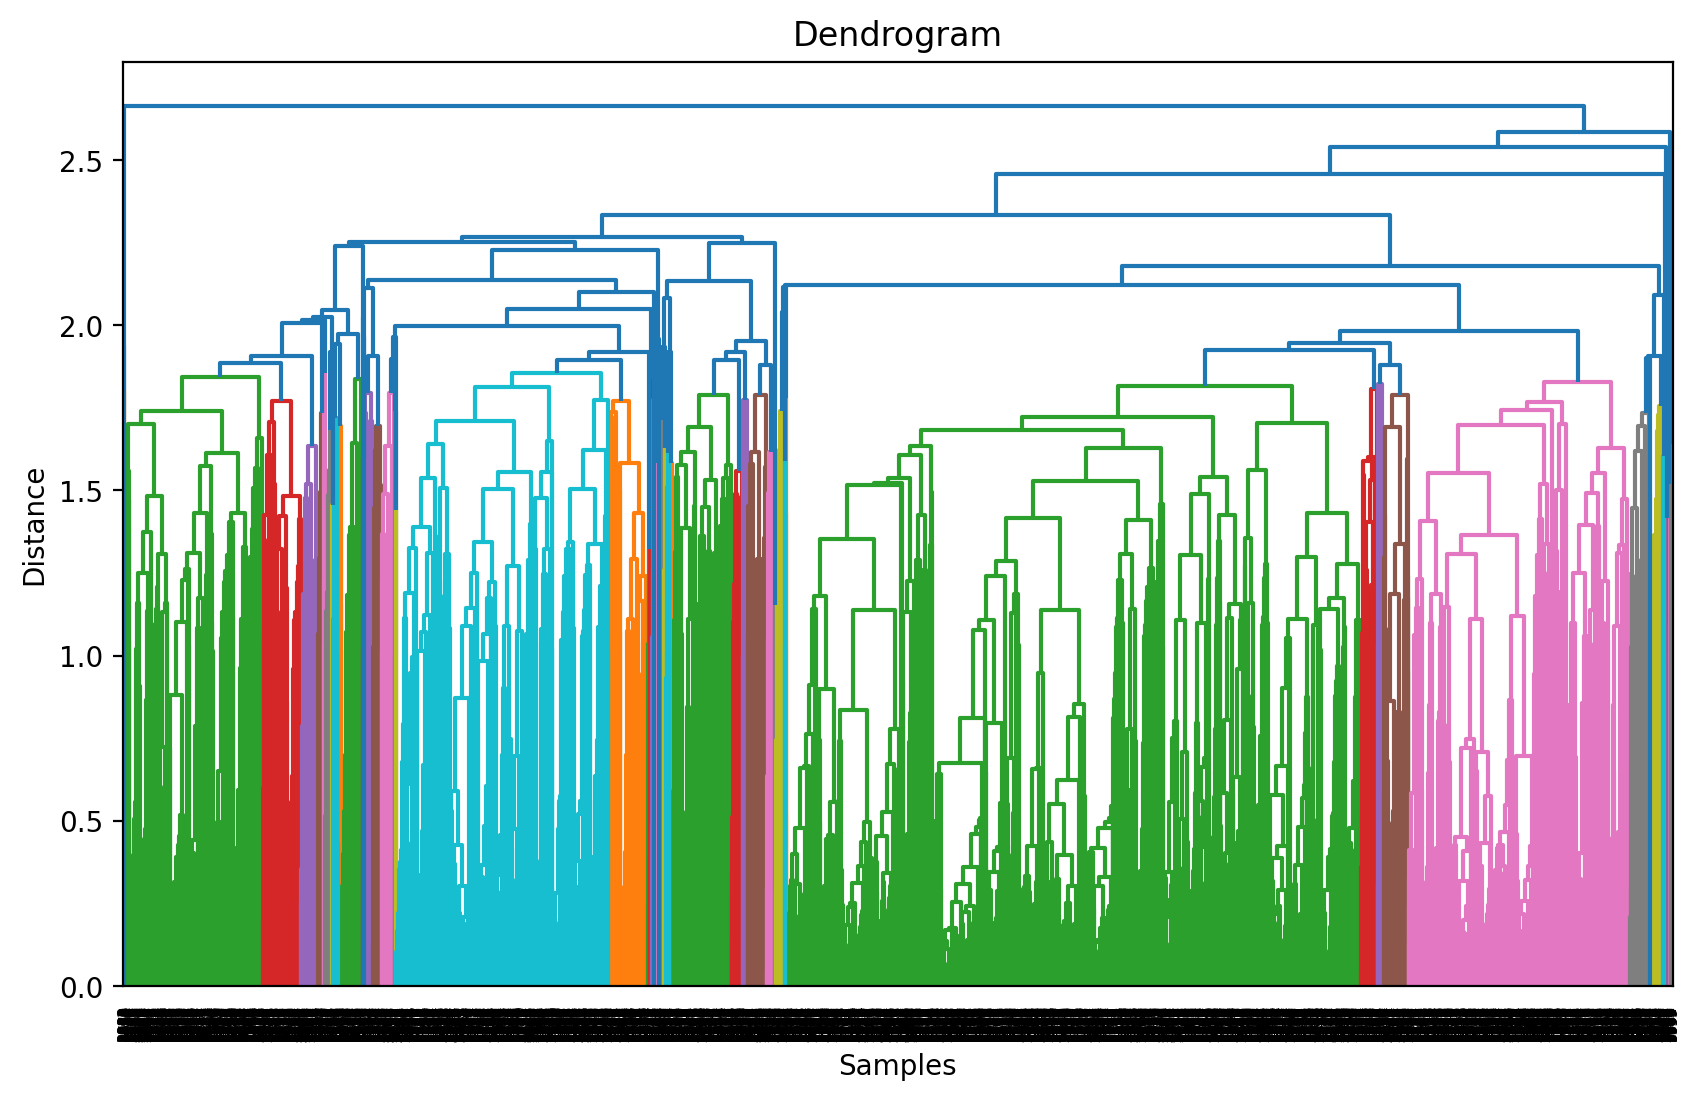

In [ ]:
linked = linkage(X_scaled, method='average')


plt.figure(figsize=(10, 6),dpi=200)
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

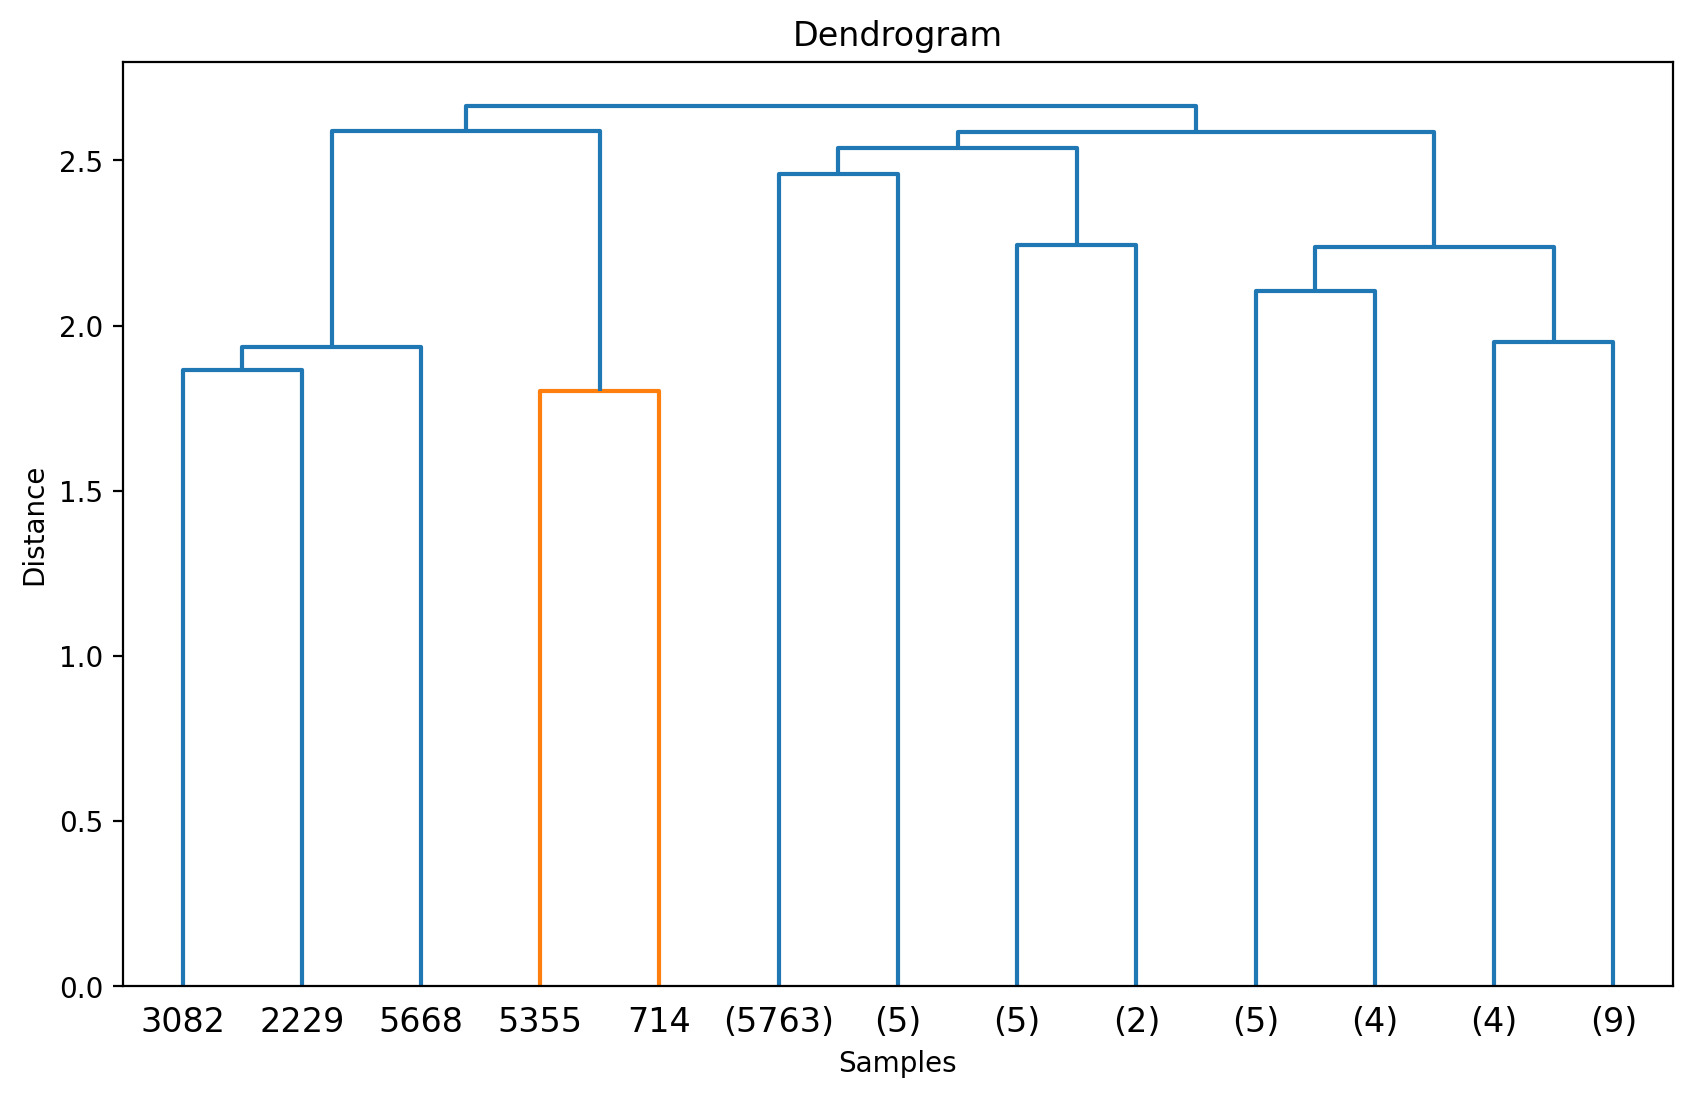

In [ ]:
##Troppo grande! Tronchiamo il dendrogramma
plt.figure(figsize=(10, 6),dpi=200)
dendrogram(linked, orientation='top', distance_sort='descending', truncate_mode='level', p=3, show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
##Quale potrebbe essere un buon numero di cluster? Diciamo che 4 potrebbe andare bene, quindi tagliamo alla distance = 1.1
from scipy.cluster.hierarchy import fcluster
threshold_distance = 2.5

cluster_labels = fcluster(linked, threshold_distance, criterion='distance')

# Assegnamo i cluster labels al DataFrame: di fatto, stiamo aggiungendo una colonna al DataFrame
data_BEV_ger['cluster'] = cluster_labels

<ipython-input-43-0e0c98ddd0c0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_BEV_ger['cluster'] = cluster_labels


In [ ]:
##Vediamo a quali cluster sono associate le singole osservazioni
print(data_BEV_ger['cluster'])

284      3
286      3
287      3
289      3
290      3
        ..
10686    3
10687    3
10689    1
10693    3
10694    3
Name: cluster, Length: 5802, dtype: int32


In [ ]:
##Visualizziamo i cluster (e le relative osservazioni) in uno scatterplot
plt.figure(figsize=(8, 6))

scatter = plt.scatter(wine_df['alcohol'], wine_df['flavanoids'], c=wine_df['cluster'], cmap='rainbow')
plt.xlabel('Alcohol')
plt.ylabel('Flavonoids')
plt.title('Visualizing the clusters')


plt.show()